In [1]:
# links
# https://arxiv.org/pdf/1704.03477.pdf
# https://arxiv.org/pdf/1904.02632.pdf

In [2]:
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
# to reload .py files
%load_ext autoreload
%autoreload 2

In [3]:
# https://stackoverflow.com/questions/16249736/how-to-import-data-from-mongodb-to-pandas
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient

from IPython.display import Image

# !pip install drawsvg
# Works on linux only!
# sudo apt-get install libcairo2
import drawSvg as draw

In [4]:
#test drawSvg
# https://pypi.org/project/drawSvg/

def plotLine(StartPoint, EndPoint):
    d = draw.Drawing(200,100,origin = 'center', displayInline = False)
    d.append(draw.Lines(StartPoint.X, StartPoint.Y, EndPoint.X, EndPoint.Y, close = False, fill='#eeee00', stroke = 'black'))
    d.setPixelScale(2)
    d.rasterize()
    return(d)

class pnt2:
    def __init__(self, x,y):
        self.X = x
        self.Y = y
start = pnt2(100,200)
end = pnt2(0,0)
plotLine(start,end)

In [5]:
client = MongoClient('mongodb://192.168.0.104:27017/')
#client = MongoClient('mongodb://localhost:27017')
client

MongoClient(host=['192.168.0.104:27017'], document_class=dict, tz_aware=False, connect=True)

In [6]:
db = client.geometry2
db

Database(MongoClient(host=['192.168.0.104:27017'], document_class=dict, tz_aware=False, connect=True), 'geometry2')

In [7]:
objects = db.objects
objects.count()

/home/mk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


86347

In [8]:
fileidsWithDims = objects.find({'ClassName':'AlignedDimension'}).distinct('GroupId')
len(fileidsWithDims)

457

In [13]:
from processing import query_collection_to_dataframe, normalize, expand_columns
# f_id = fileidsWithDims[1]
f_id = '1317d221-8d9e-4e2e-b290-3be2a0aa67fb'
debug_data = query_collection_to_dataframe(objects, f_id)    
cols_to_expand = ['XLine1Point', 'XLine2Point', 'StartPoint', 'EndPoint', 'Position']
debug_data = expand_columns(debug_data, cols_to_expand)
normalize(debug_data).describe()

,Handle,XLine1Point.X,XLine1Point.Y,XLine1Point.Z,XLine2Point.X,XLine2Point.Y,XLine2Point.Z,StartPoint.X,StartPoint.Y,StartPoint.Z,EndPoint.X,EndPoint.Y,EndPoint.Z,Position.X,Position.Y,Position.Z
count,4.280000e+02,4.000000,4.000000,4.0,4.000000,4.000000,4.0,420.000000,420.000000,420.0,420.000000,420.000000,420.0,4.000000,4.000000,4.0
mean,5.658911e+05,99.787766,0.081423,0.0,99.796287,0.119022,0.0,98.399143,1.330654,0.0,98.394796,1.332093,0.0,99.824529,0.236548,0.0
std,1.123106e+06,0.065218,0.091846,0.0,0.084266,0.083271,0.0,11.859239,9.954934,0.0,11.858793,9.954845,0.0,0.072203,0.088682,0.0
min,0.000000e+00,99.707627,0.000000,0.0,99.707627,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,99.744280,0.137396,0.0
25%,0.000000e+00,99.755405,0.020875,0.0,99.734765,0.096981,0.0,99.780179,0.089808,0.0,99.775153,0.090261,0.0,99.798814,0.174271,0.0
50%,0.000000e+00,99.790441,0.059460,0.0,99.795792,0.142558,0.0,99.826924,0.131856,0.0,99.819280,0.135678,0.0,99.816993,0.244620,0.0
75%,0.000000e+00,99.822802,0.120007,0.0,99.857314,0.164599,0.0,99.850832,0.191789,0.0,99.850845,0.196403,0.0,99.842707,0.306897,0.0
max,3.595768e+06,99.862553,0.206771,0.0,99.885936,0.190972,0.0,100.000000,83.940951,0.0,100.000000,83.940951,0.0,99.919850,0.319558,0.0


id: 00a8a649-9fd0-4295-be49-d9ddbe26cdc6 entities: 310


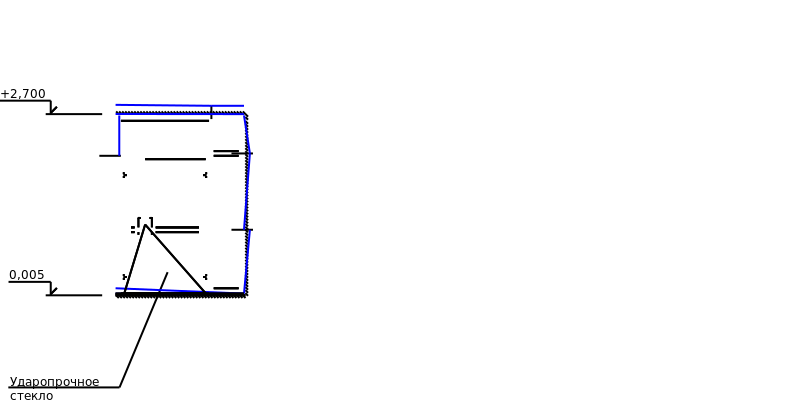

id: 01e96147-b009-4f74-b579-2f0a468ff182 entities: 739


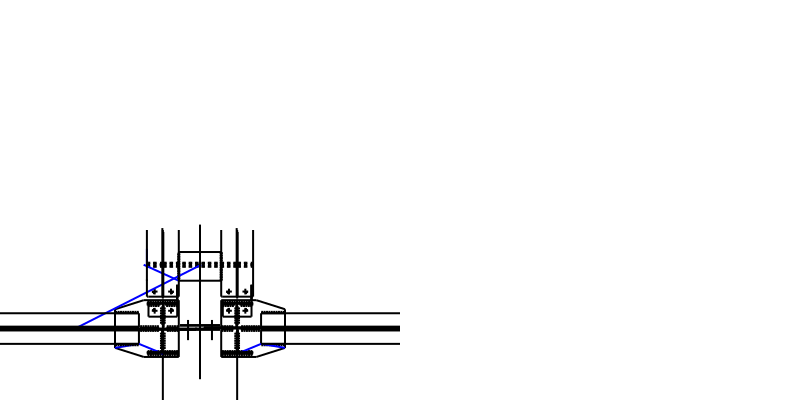

id: 02d25763-84e3-48dc-9c2f-25af7eddf197 entities: 95


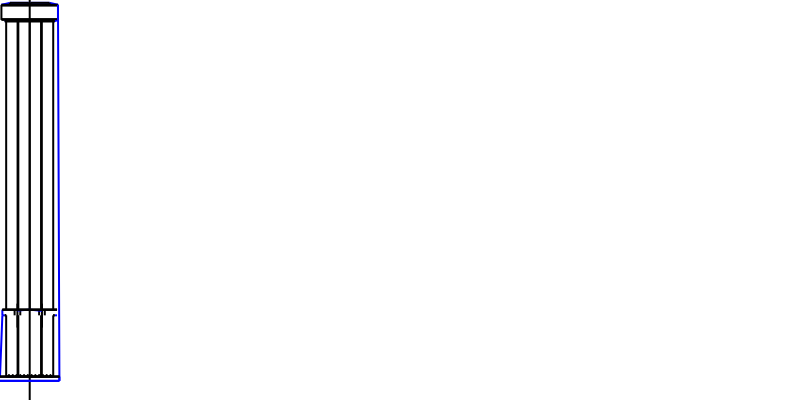

id: 0335ebcf-8848-4c70-8a97-04195d5816b9 entities: 20


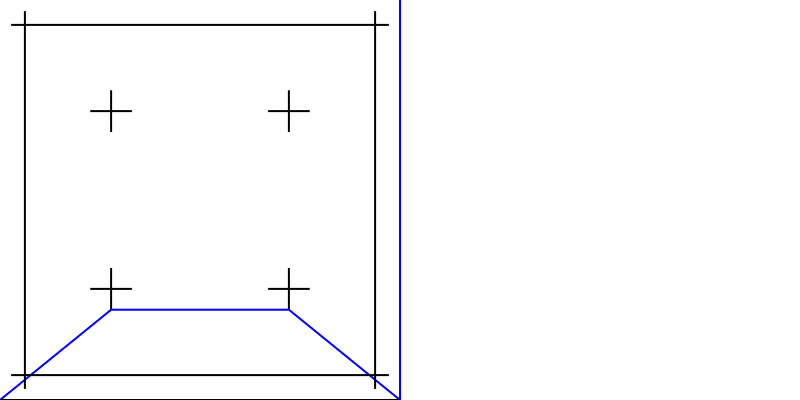

id: 04103d5d-5310-4b89-8177-1aa841eaf4da entities: 197


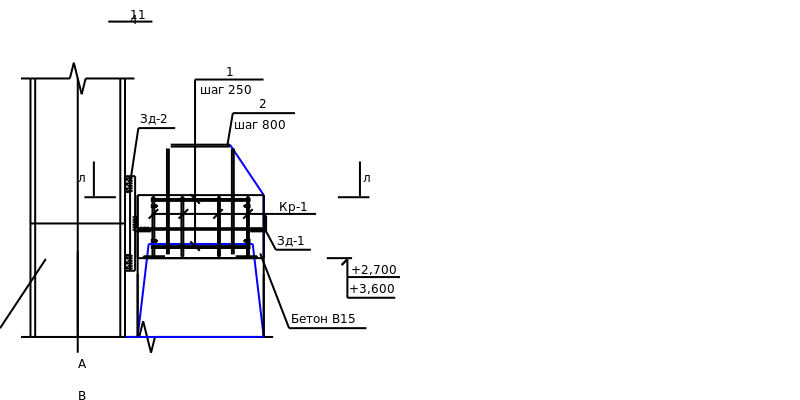

id: 04ab72da-b399-448c-9702-b0e7f71f9e13 entities: 17


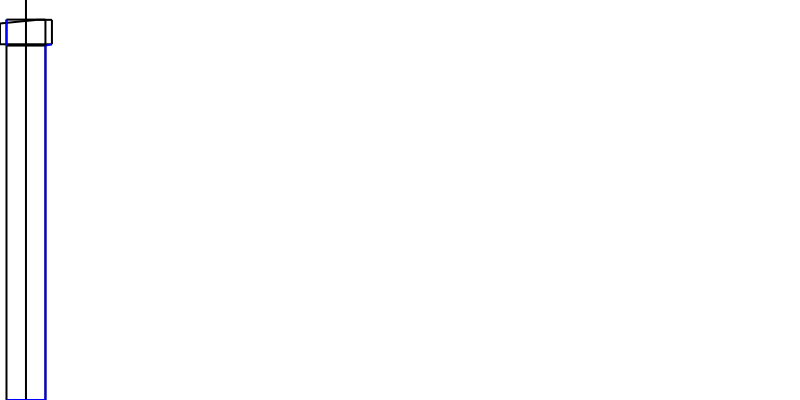

id: 04e9e432-7edc-4d37-8573-27719930cd2e entities: 332


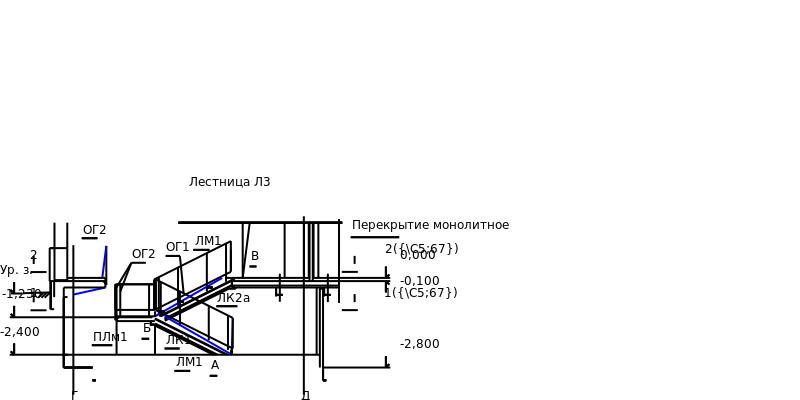

None

id: 070e482a-ab8c-44da-aa0b-d9d16fb1c53c entities: 22


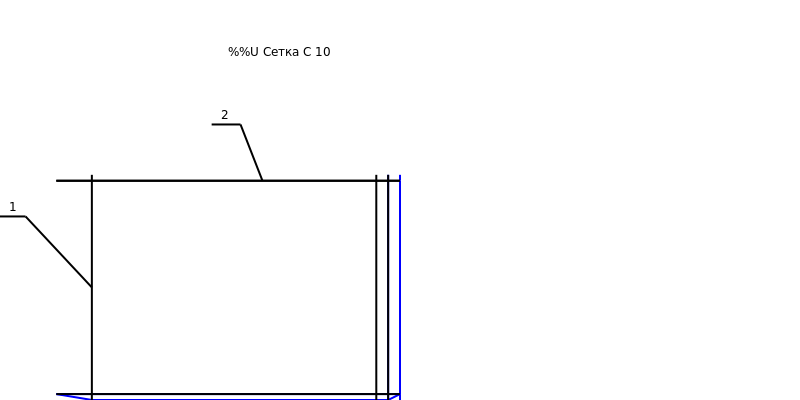

id: 07c29cd5-49cc-42b0-8a04-9e9c02a323c8 entities: 32


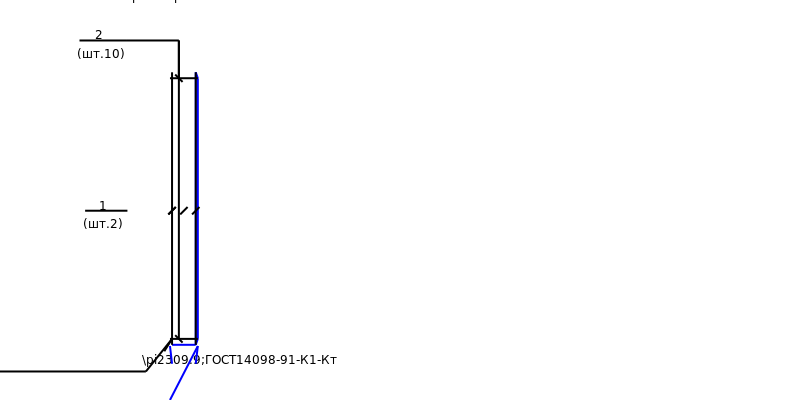

id: 07c71cf6-4416-4ed5-8052-ca7bd16eb253 entities: 57


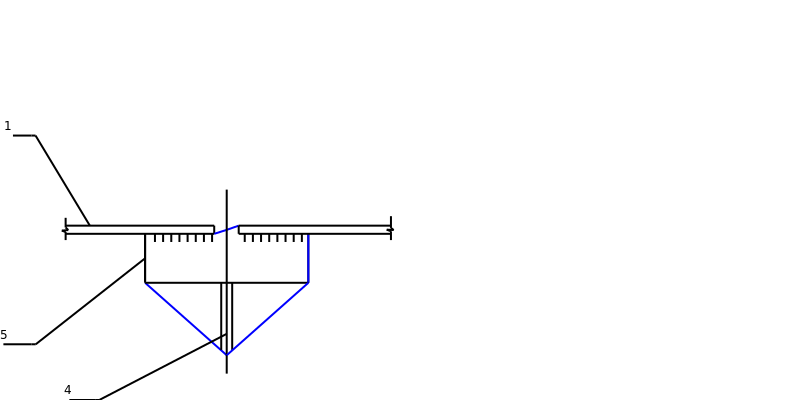

id: 07f60636-e89a-4e98-b72e-43b9550a4cb3 entities: 112


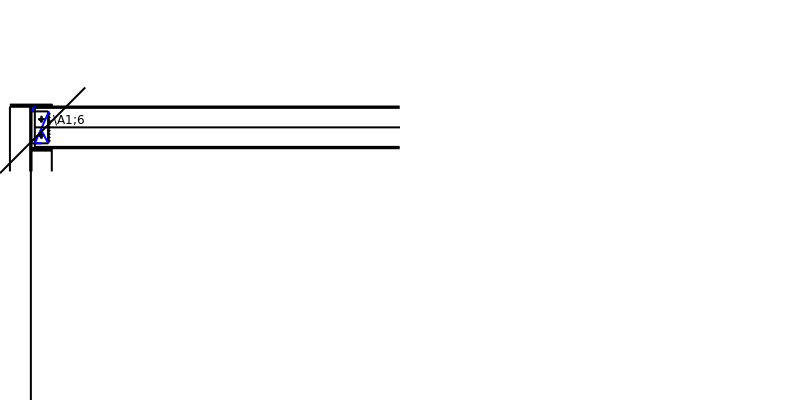

id: 08039eec-f9be-4242-9647-0834d6f10dde entities: 449


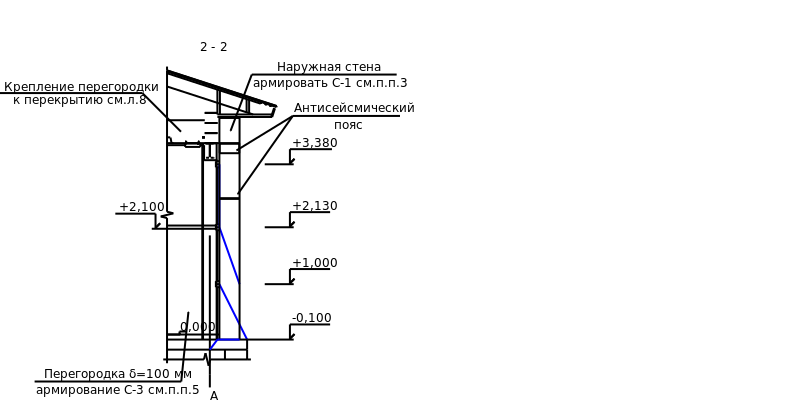

id: 08b0a164-82c6-418b-852d-a127bc07a2c5 entities: 81


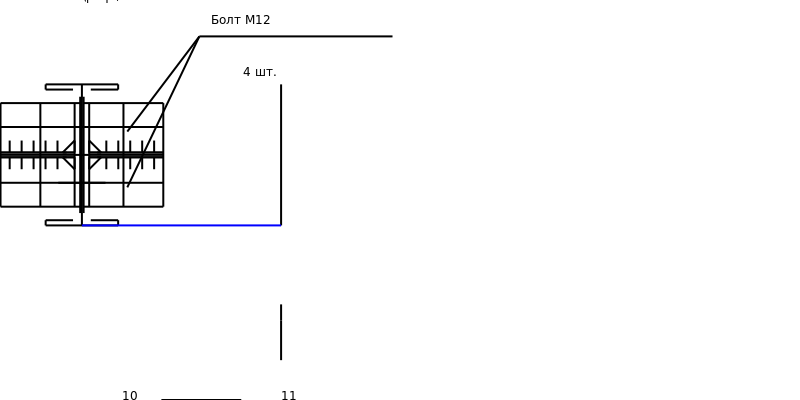

id: 097eb0a0-4296-4596-a20e-89bdc07a1c91 entities: 148


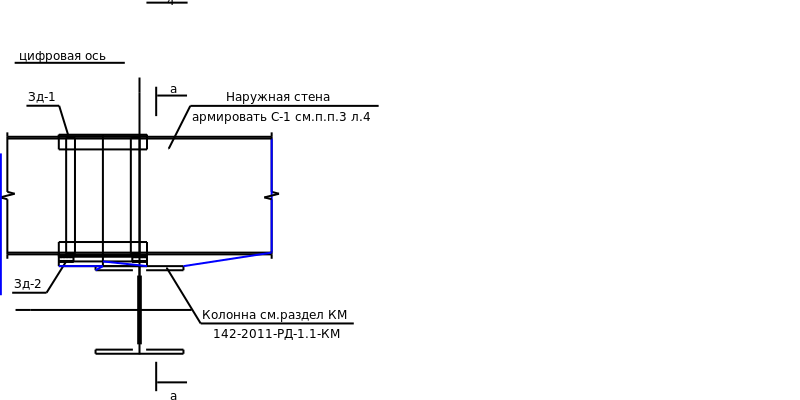

id: 09f98abf-524a-468e-8e78-dfd1ffd561b3 entities: 15


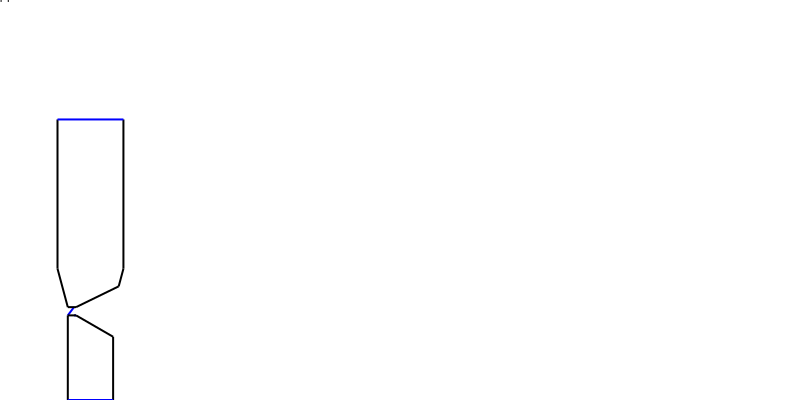

id: 0b8c9c96-5361-47ca-8a60-db6ecbb2170c entities: 175


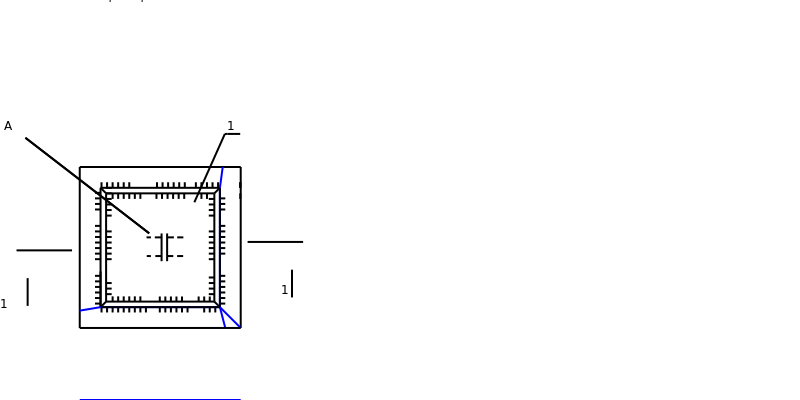

id: 0cc779f8-d43d-4344-a7f5-c93c8cec1080 entities: 73


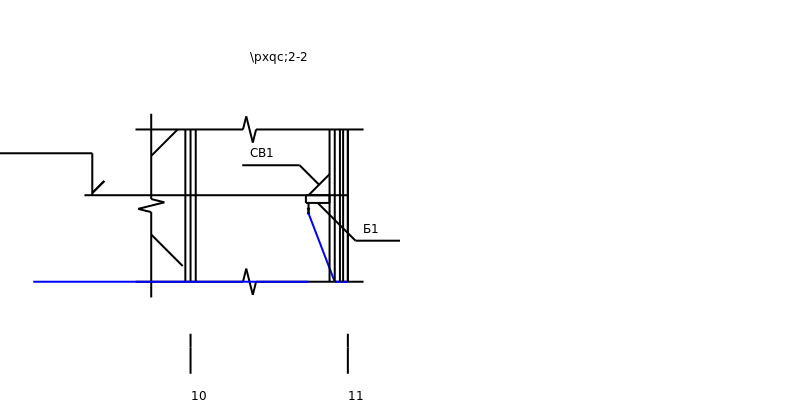

id: 0cf85901-901b-441e-8b45-347736205c86 entities: 22


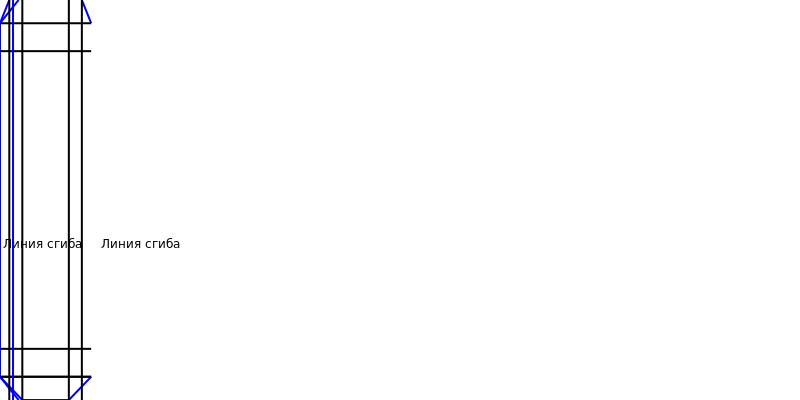

id: 0d00a448-0cb8-4774-a3ca-d0bc4a6e9aaa entities: 299


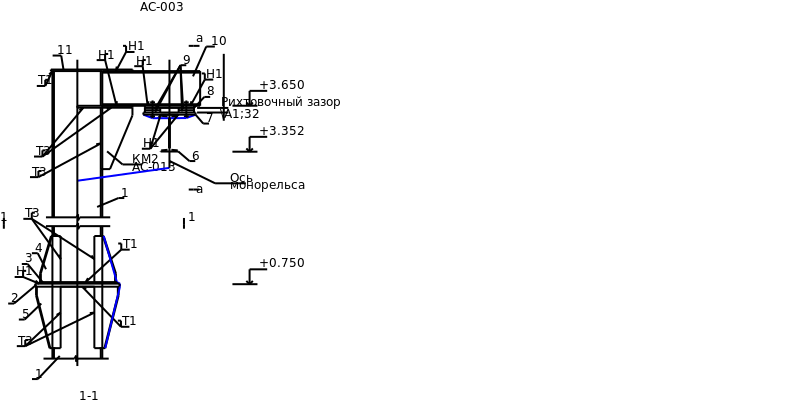

id: 0d59b03c-0d8e-448c-9d0b-790ab908d4d7 entities: 80


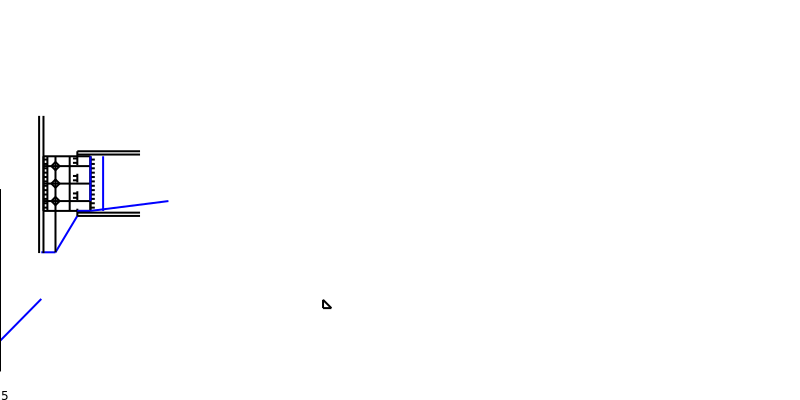

id: 0dcc4d05-8cf4-4010-875b-81e3148fdef7 entities: 125


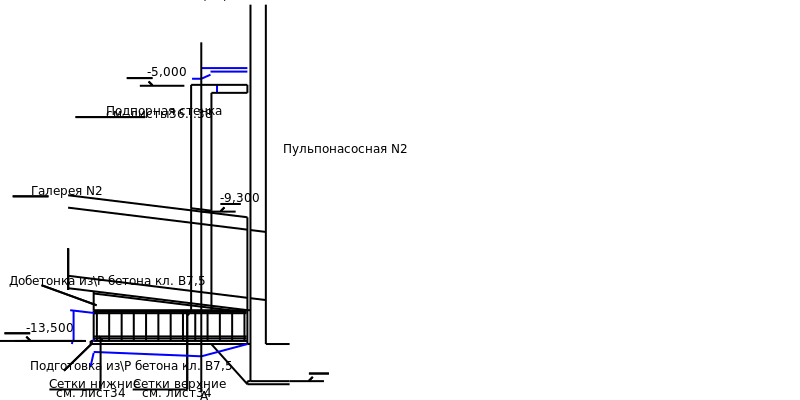

id: 0e2079c7-60b9-498f-8ecc-845abc12d92f entities: 83


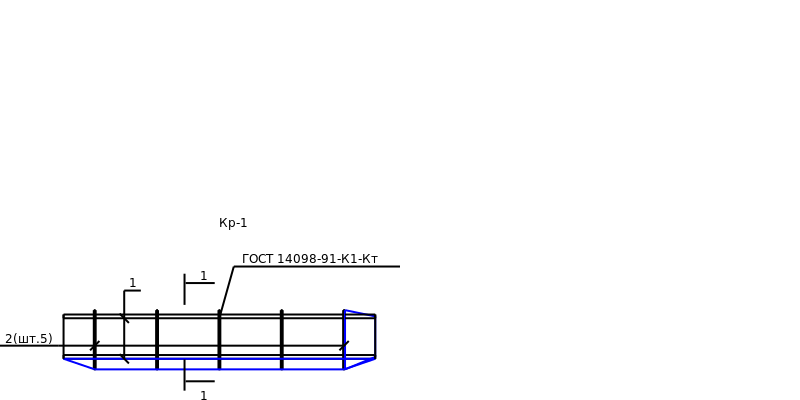

id: 0e3a4030-2c27-482f-8b33-0155f0e9a1ad entities: 14


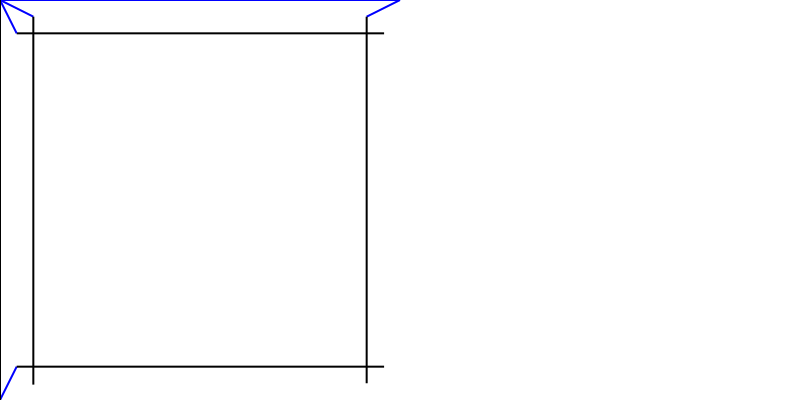

id: 0e4f5727-d626-49da-98ea-ed24cb62e967 entities: 22


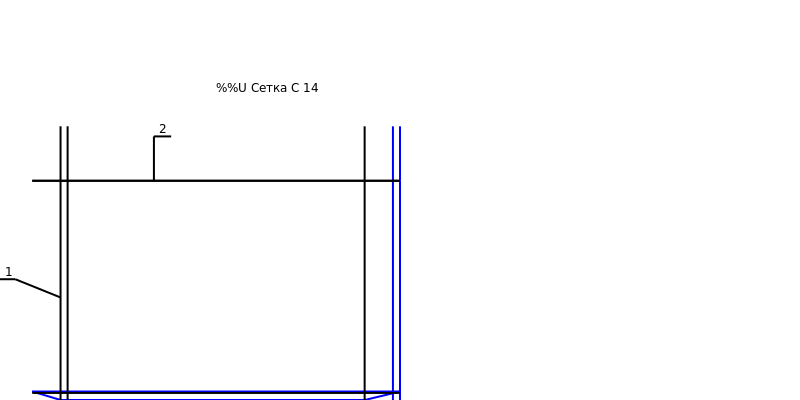

id: 0e905687-38a4-4aaa-9832-b5b76d6fed0e entities: 79


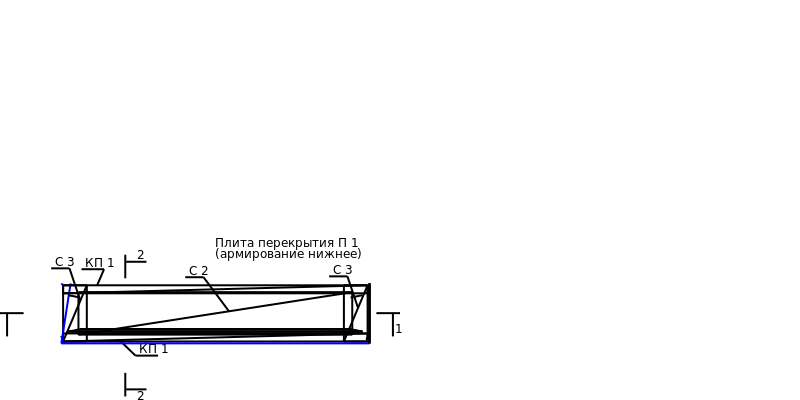

id: 0f088d51-3fae-4113-8916-42dfddb9b115 entities: 71


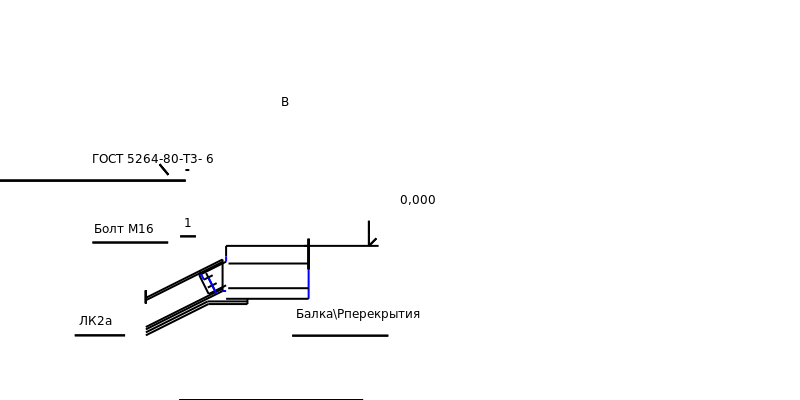

id: 1009fd32-46d6-4301-9a3e-bfd2b5a416a5 entities: 195


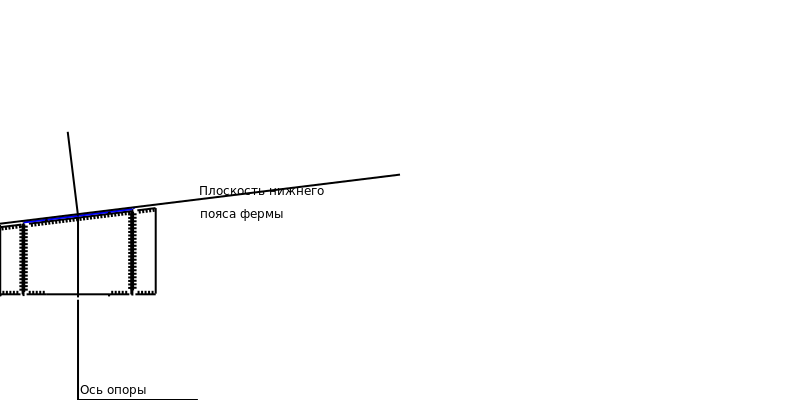

id: 117588ed-1ac9-49d2-90d4-421c0137d2c1 entities: 119


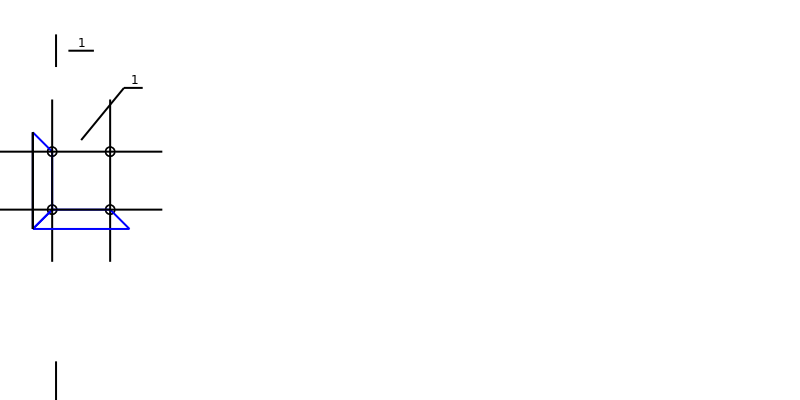

id: 11c4395a-51a1-4c1b-8be7-dd61d30a5681 entities: 51


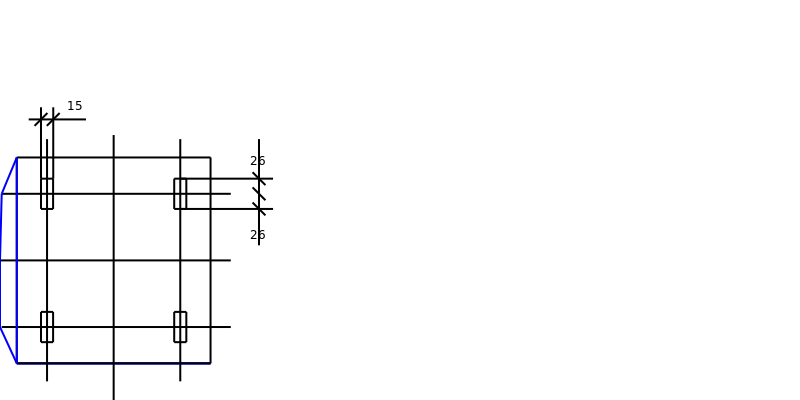

id: 11f9414c-e973-42d5-a756-44e81d221d82 entities: 66


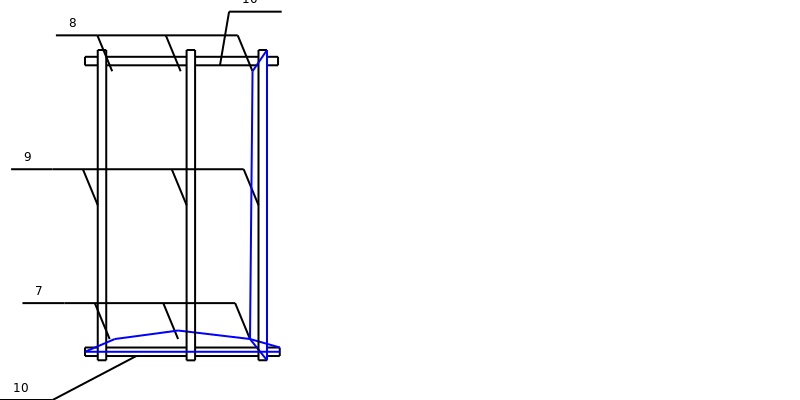

id: 1317d221-8d9e-4e2e-b290-3be2a0aa67fb entities: 428


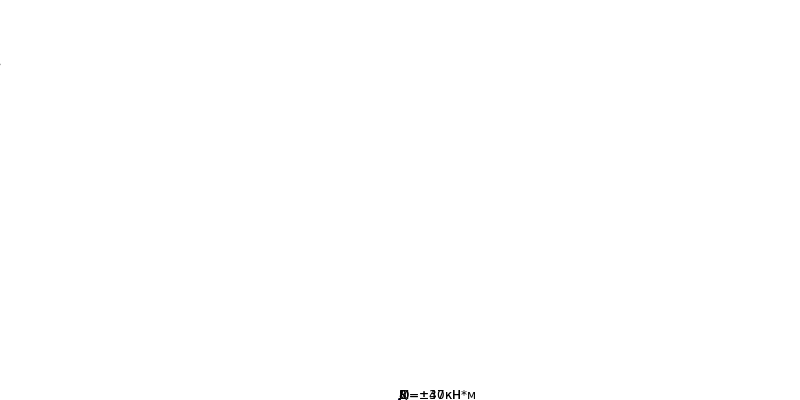

id: 1323d760-2c57-496e-9a57-f9f078140239 entities: 375


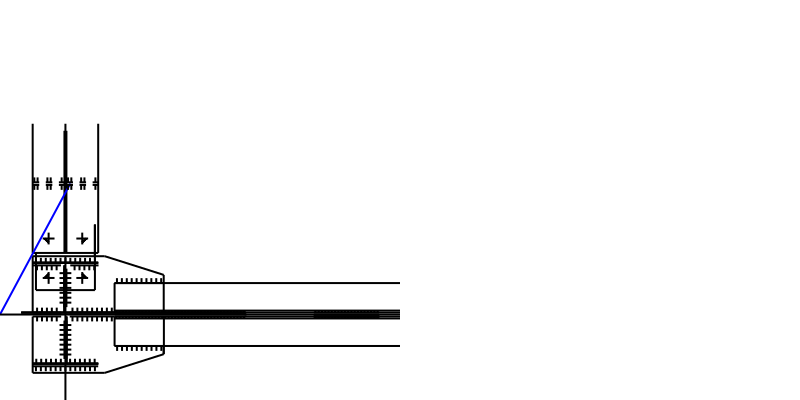

id: 133c79c4-d807-4944-9777-046cc5a378c1 entities: 118


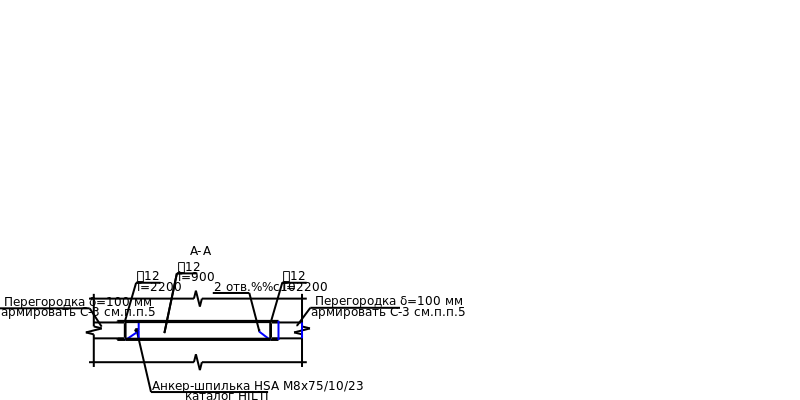

id: 13b883f4-08a7-4431-9d96-95d54f2f6d33 entities: 56


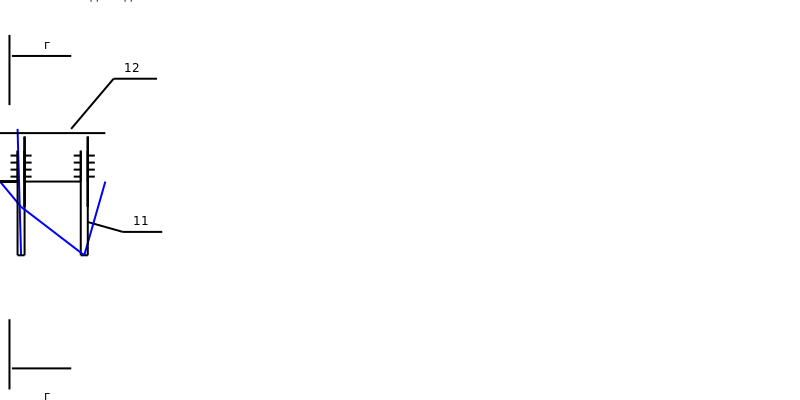

id: 14c82fff-fab2-4be6-b514-ec430c065bb7 entities: 748


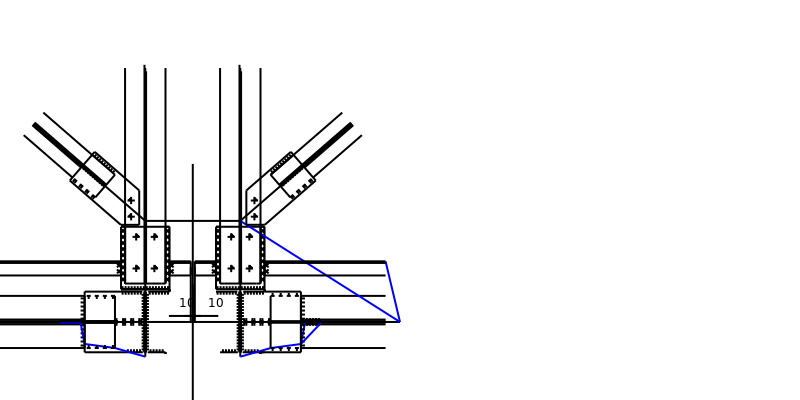

id: 14df1b83-cebd-41e9-9b21-a55ceae25029 entities: 109


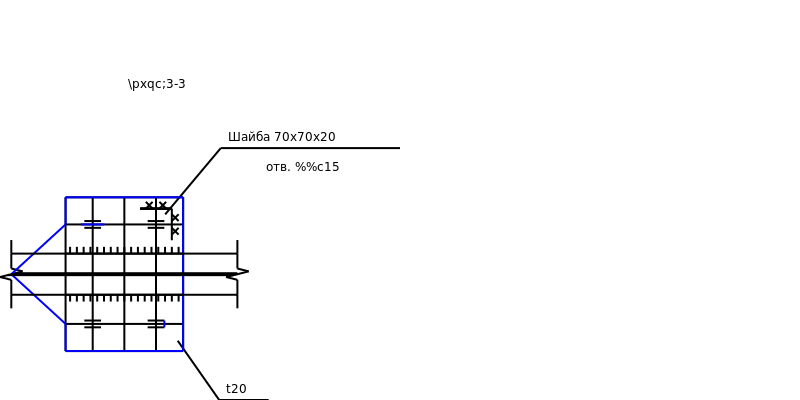

id: 152b0274-1013-4e5e-9d27-811a3d813dcc entities: 29


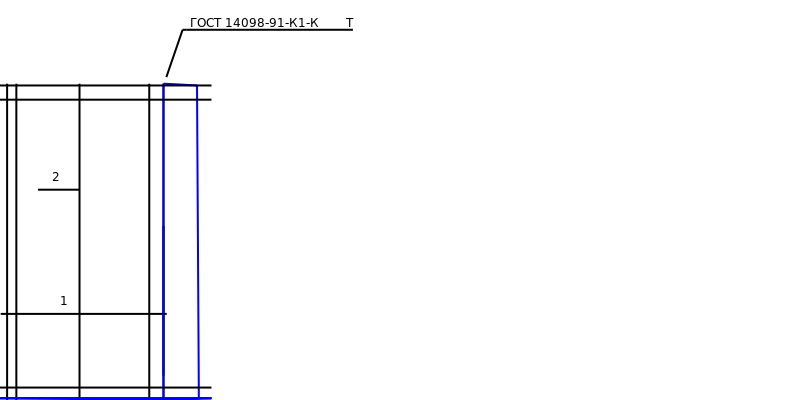

id: 15bf5a7a-bbc0-45b4-a3b1-5a730ea96571 entities: 21


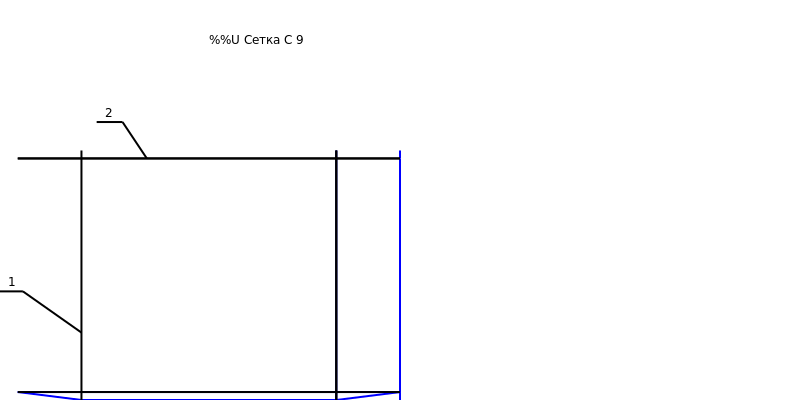

id: 15c8cf84-34e6-4949-8d43-24684260d56c entities: 32


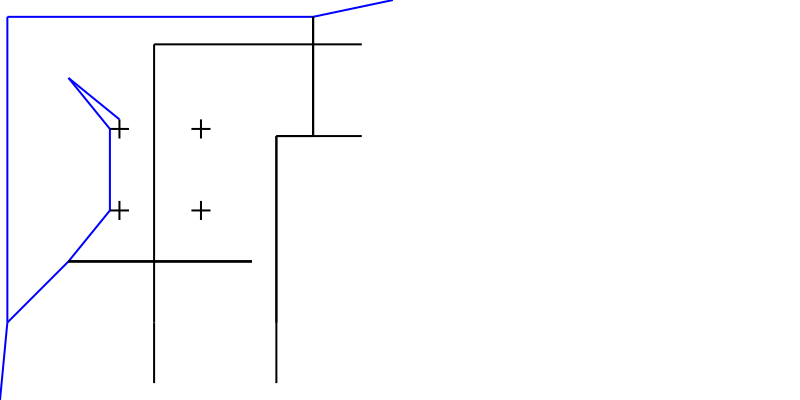

id: 161e081d-aae6-4361-af0a-2c2f298364d8 entities: 119


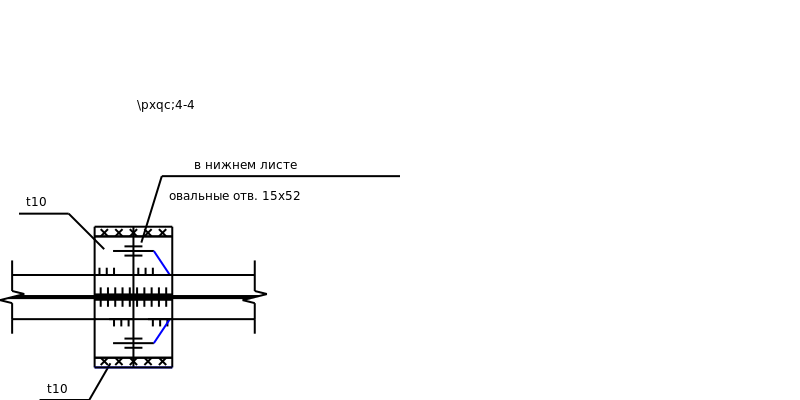

id: 164eb145-3fd1-427b-8b05-83ff5f9cbdcf entities: 12


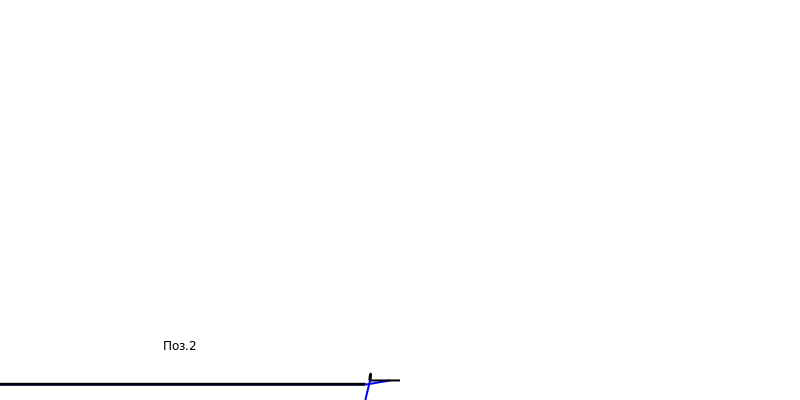

id: 16c91098-b11d-4835-b84f-a5bde99bd428 entities: 14


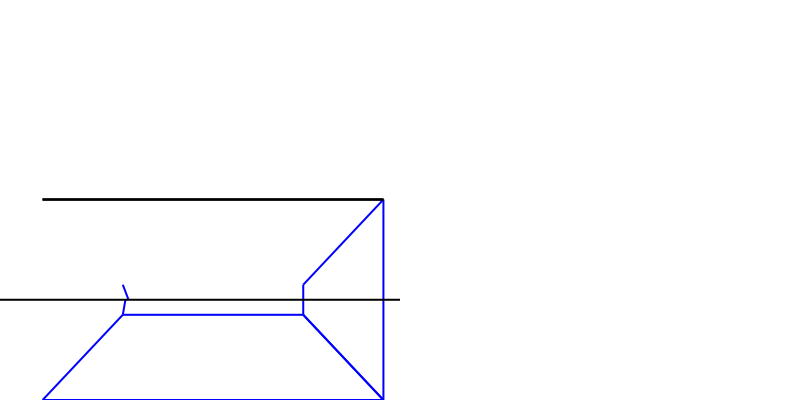

id: 17172784-ee0e-44b6-a831-0bf9a2cf667c entities: 237


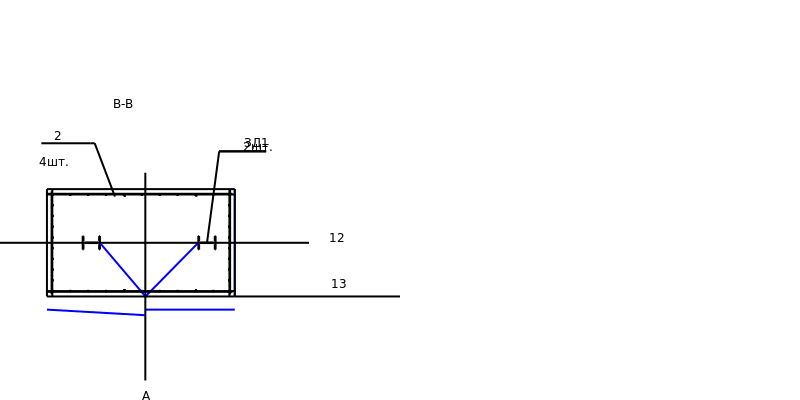

id: 179ecf2a-ca38-4cc0-a8b6-94048fecf551 entities: 36


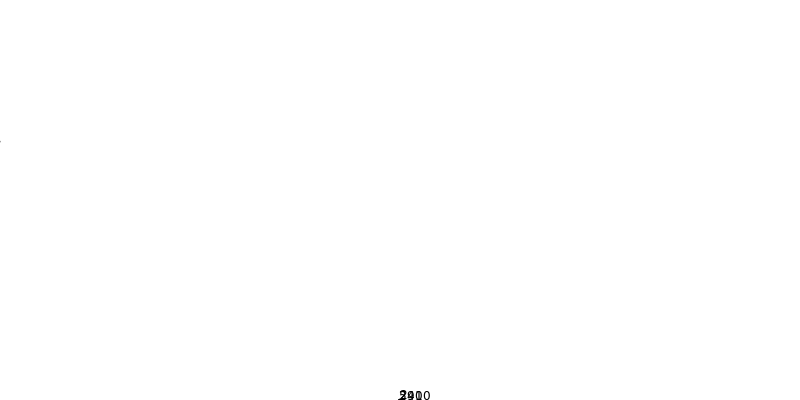

id: 17fc1b7a-d120-4ea9-a6e5-42cdb9a6c345 entities: 86


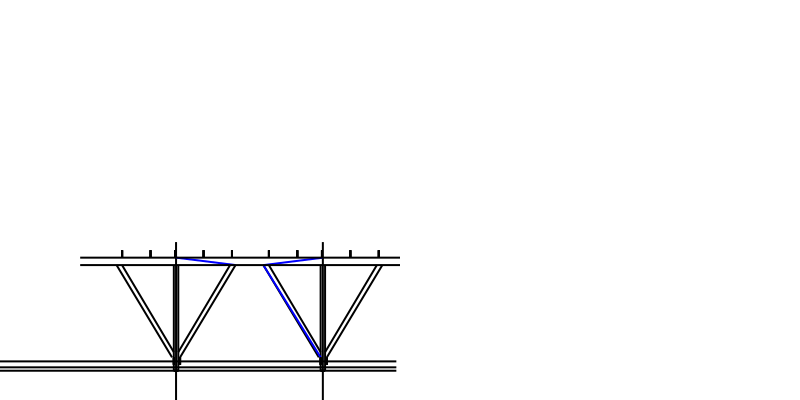

id: 1850e56a-5117-4628-9d8d-3fa7f9875294 entities: 10


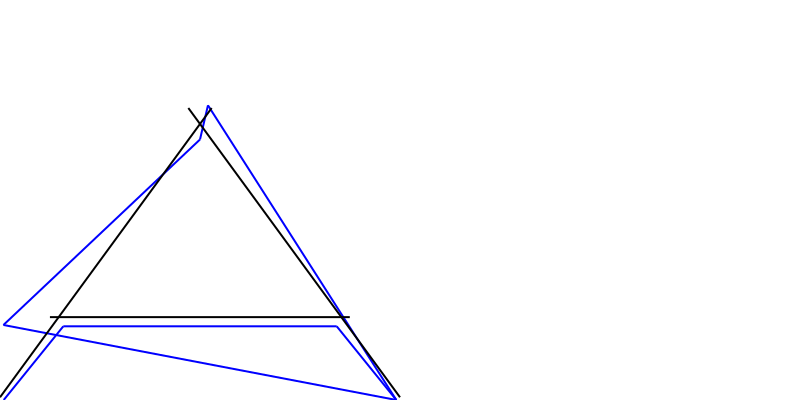

id: 18e8e198-ed9c-4dd6-b479-45fd1a3448ee entities: 20


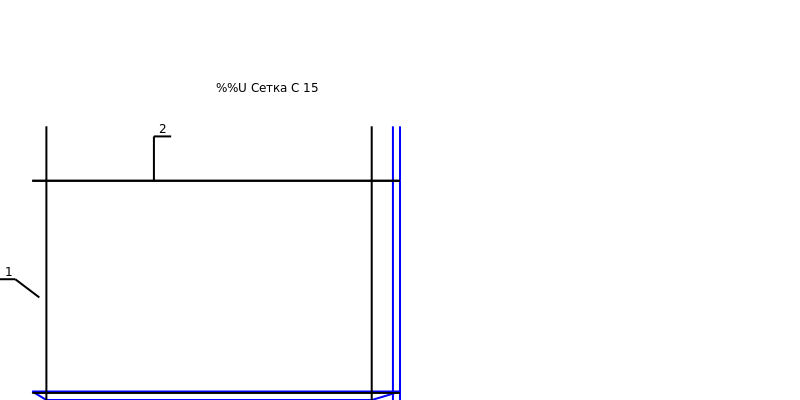

id: 18eaec66-988b-484d-9aab-a6226044ba8e entities: 117


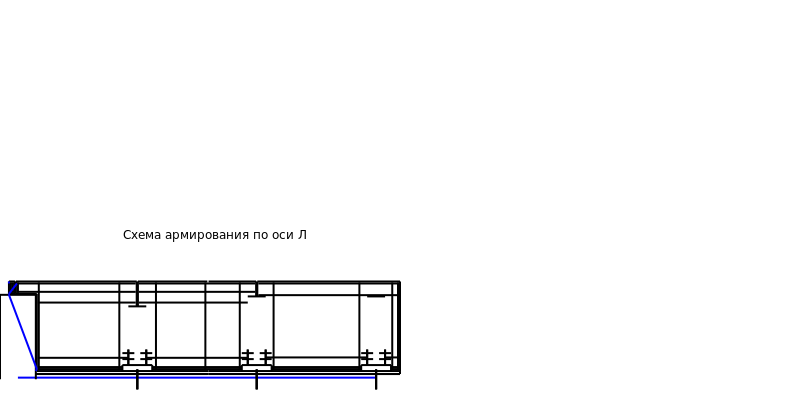

id: 1925aac1-b7a7-4195-a7ee-79c8395f3812 entities: 132


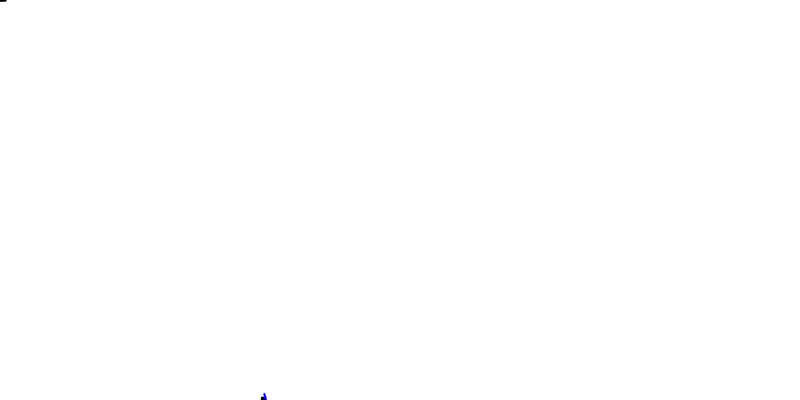

id: 192a77c3-0f2b-4b60-b791-5f0dd66efddd entities: 233


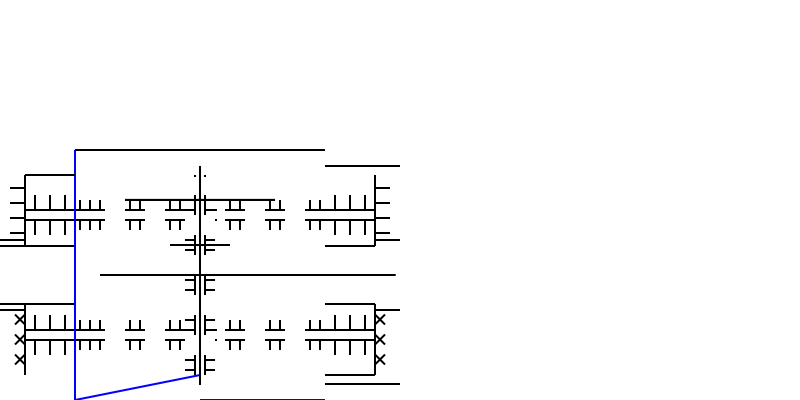

id: 1be4b0e5-5889-4a44-bc20-775956afc6c9 entities: 426


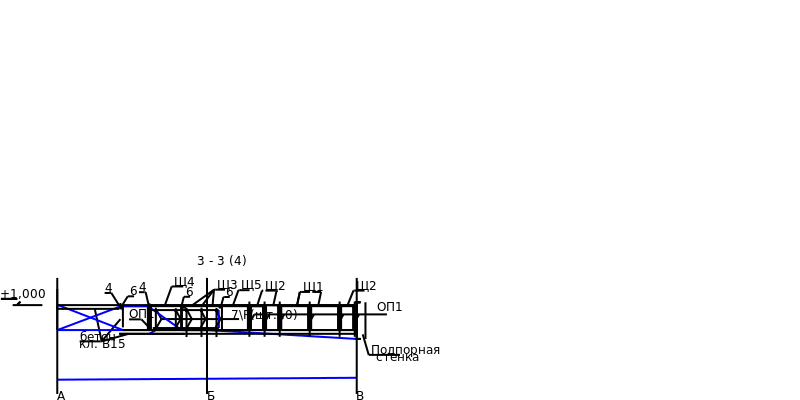

id: 1c13f6ff-506f-4e9e-8900-07098808ac33 entities: 26


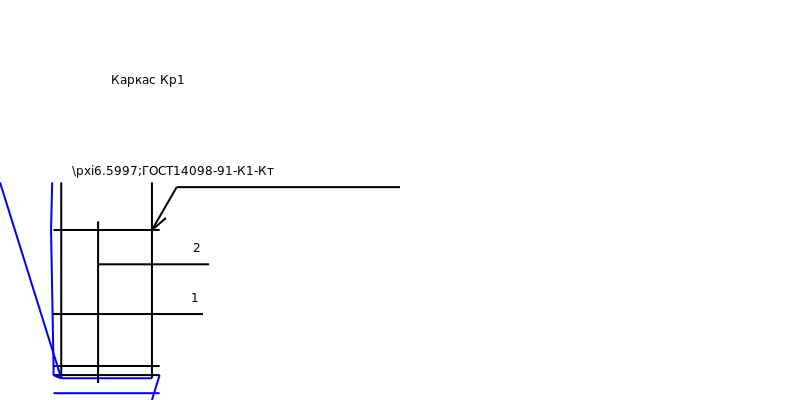

id: 1ca998e9-e7e1-47b0-90fb-262c6ee77fee entities: 142


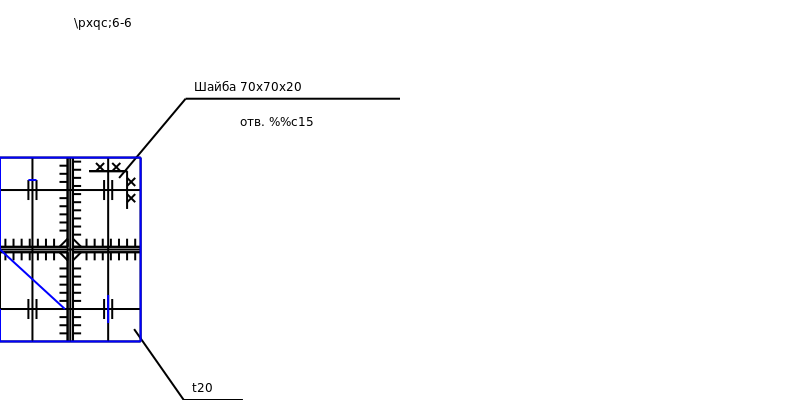

id: 1cf8a828-416c-4da9-ae46-d5289578b509 entities: 506


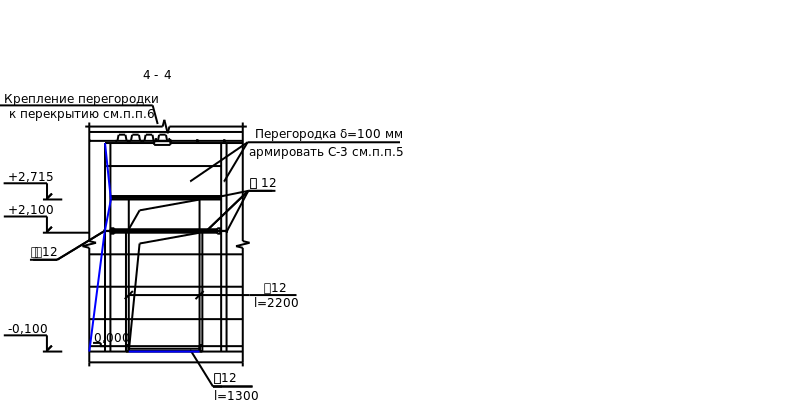

id: 1e309c88-6600-44ca-92c5-01c7383f716e entities: 15


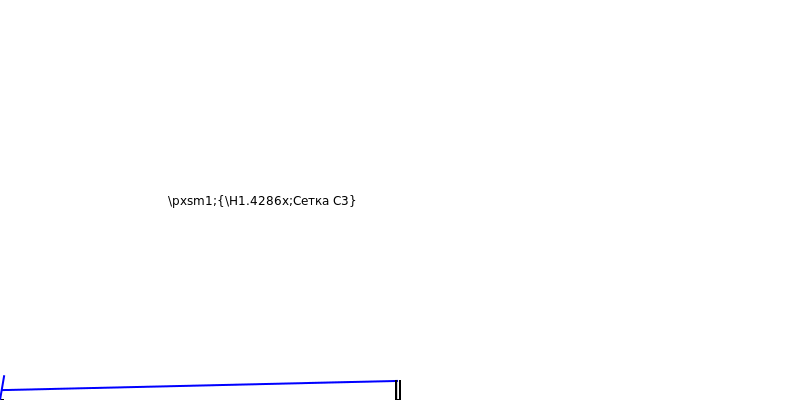

id: 1e30d4fe-5d86-4946-be2d-0448d2900beb entities: 476


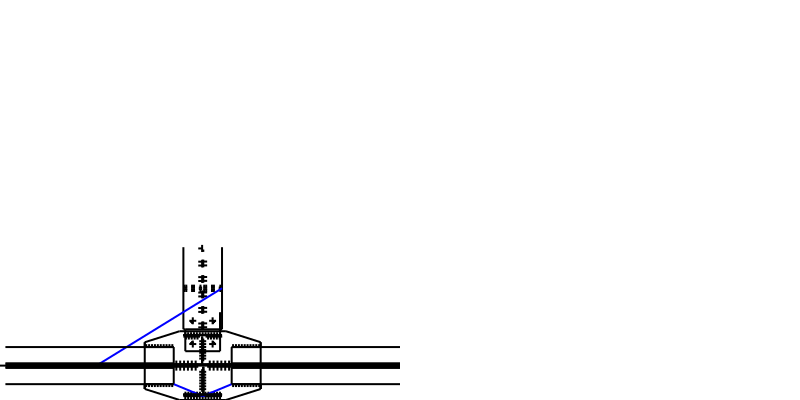

id: 1f282cef-0de0-4144-8f63-8881a2534db8 entities: 375


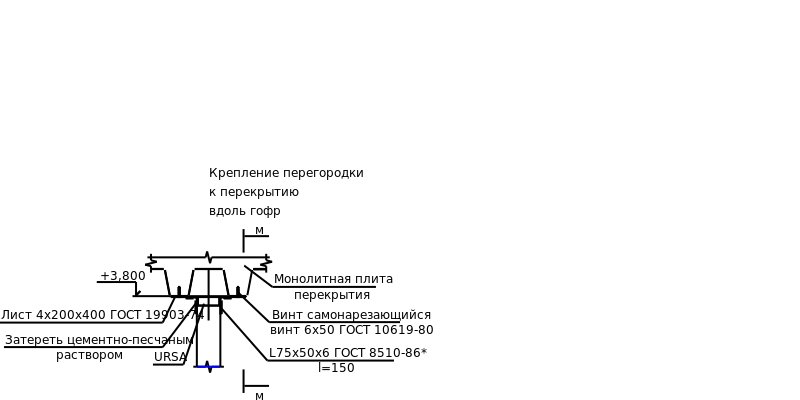

id: 1f2b8b51-07f1-44c9-a485-96ae428f7797 entities: 22


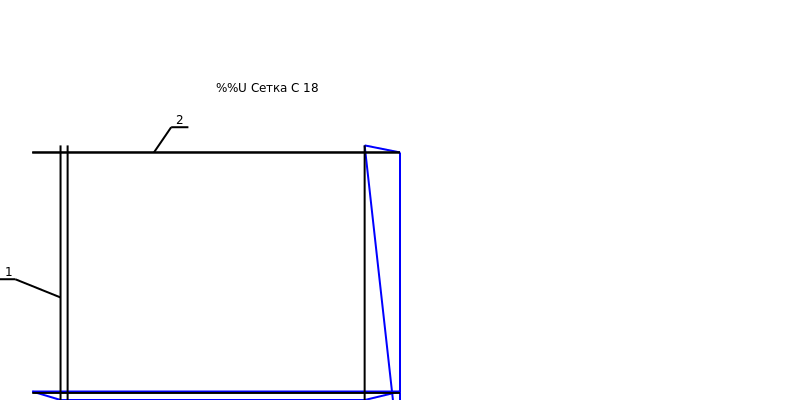

id: 1f5261f7-20b6-4e93-8bb5-4a5c0cf2270f entities: 41


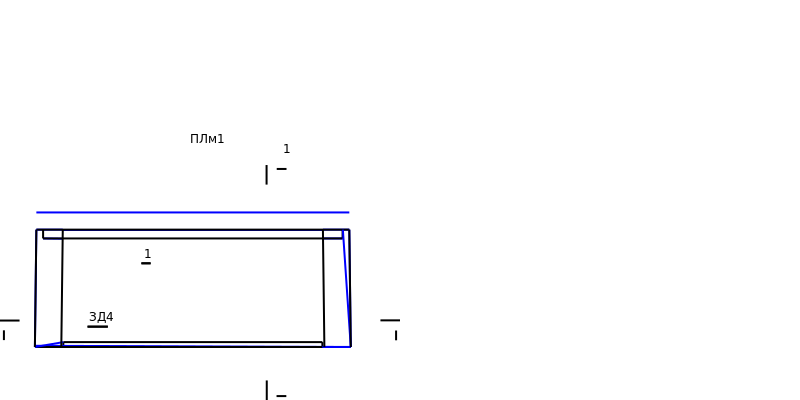

id: 20f2457d-39c3-4e5e-8aa4-e3a3178f2461 entities: 49


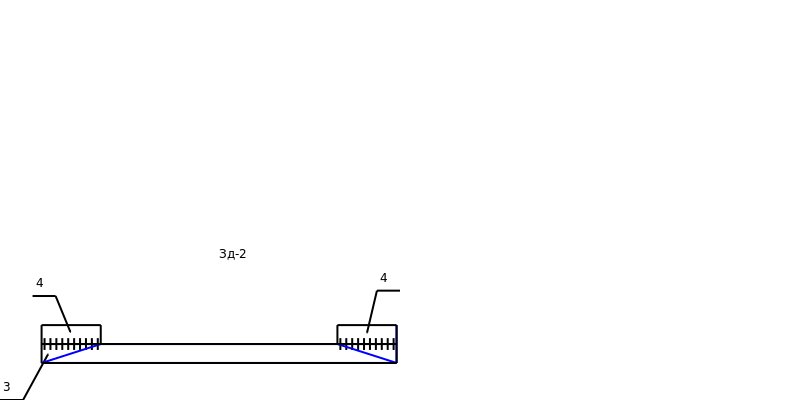

id: 211e4358-a3db-4fc1-9dc2-d302d23d16e6 entities: 81


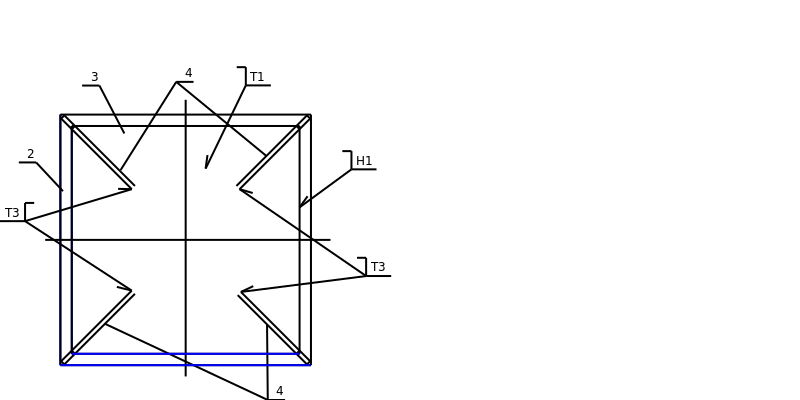

id: 2153fc83-8ae4-44f4-9f30-7f70979de72b entities: 29


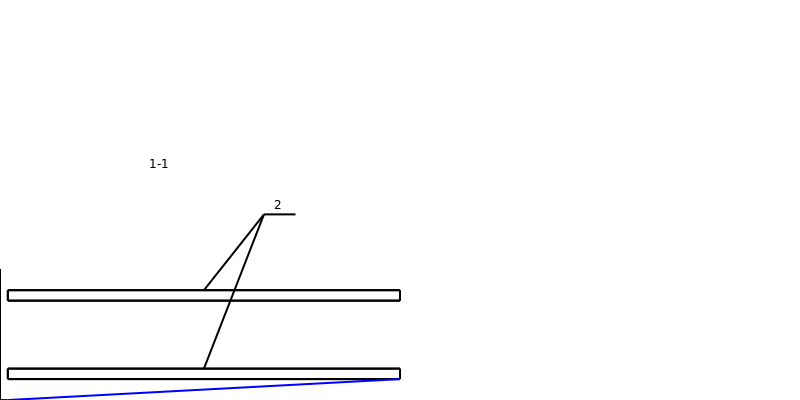

id: 22185902-07f8-4829-985a-88e2eb4ffef5 entities: 112


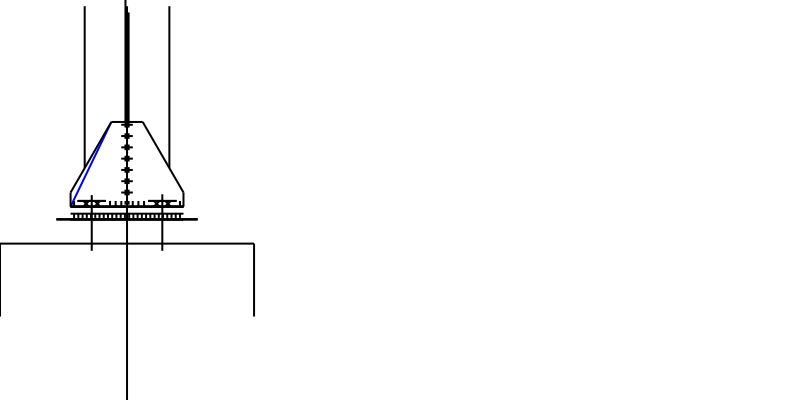

id: 22232c20-bd79-41d2-9df9-6141ce9c630b entities: 35


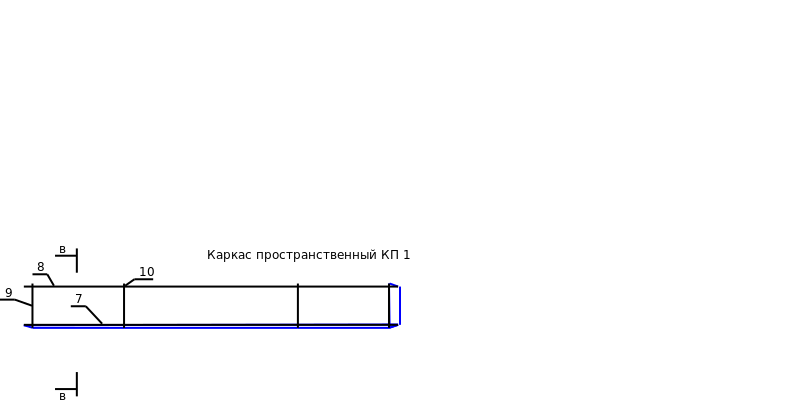

id: 222dadb5-6045-4f30-bd40-acf12ea106e5 entities: 153


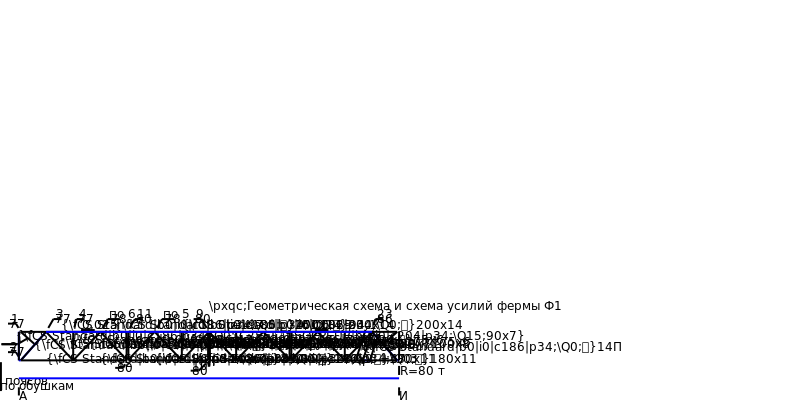

id: 2252c728-855a-4697-9d40-0680e44ecf1d entities: 20


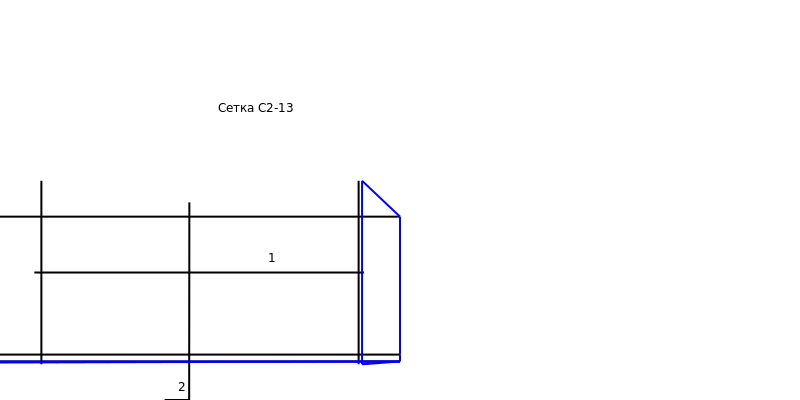

id: 227959da-4ef3-4a4f-b3b5-8ea3a8fd9866 entities: 221


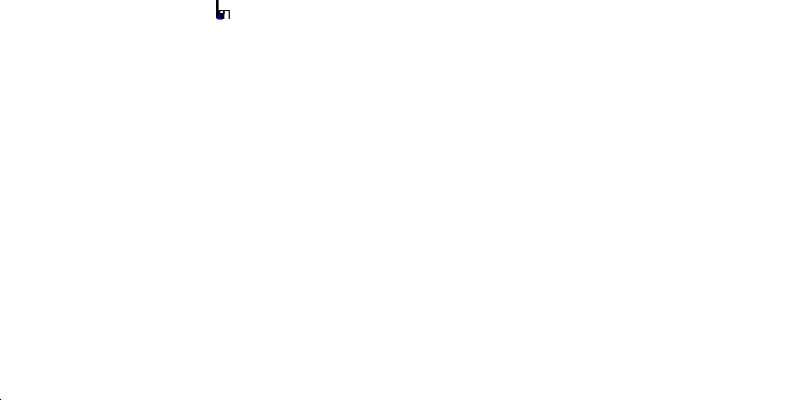

id: 22840533-9537-4397-8010-0716eb858212 entities: 54


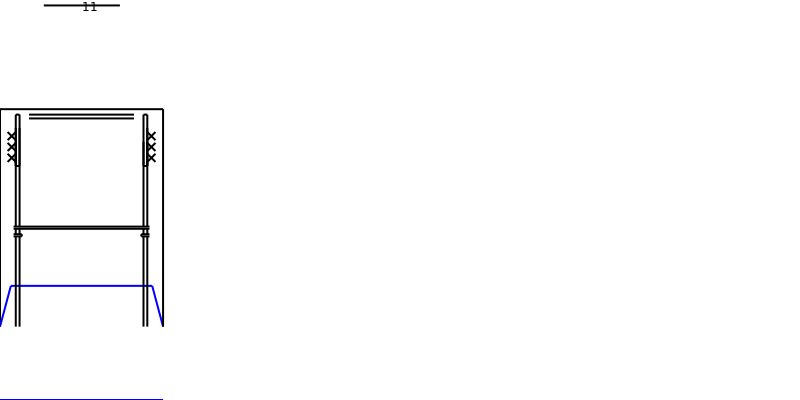

id: 232d9bfe-cd4d-489e-bbaf-a0e743ebe635 entities: 1372


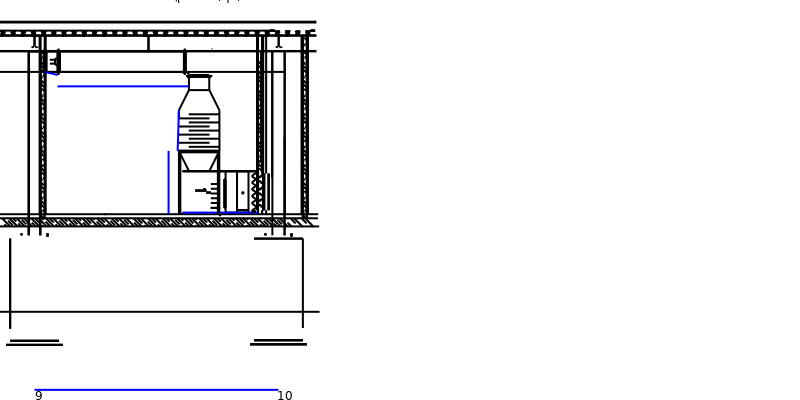

id: 23bcd475-aa06-4ff6-9dd4-8132ddbd8cb0 entities: 190


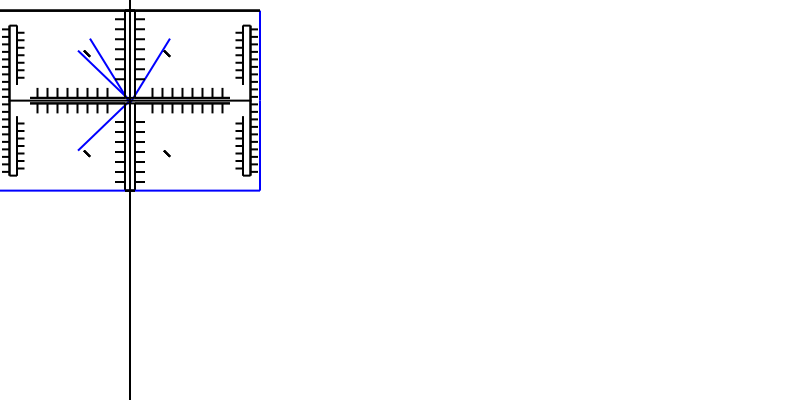

id: 23e95d00-40e6-4530-8d7f-bc21b35499e0 entities: 253


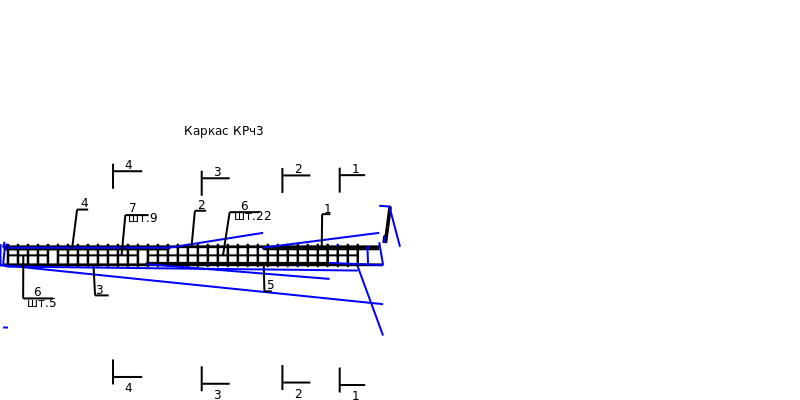

id: 2409b743-aa2f-4d75-b7c6-ca55da8e591e entities: 162


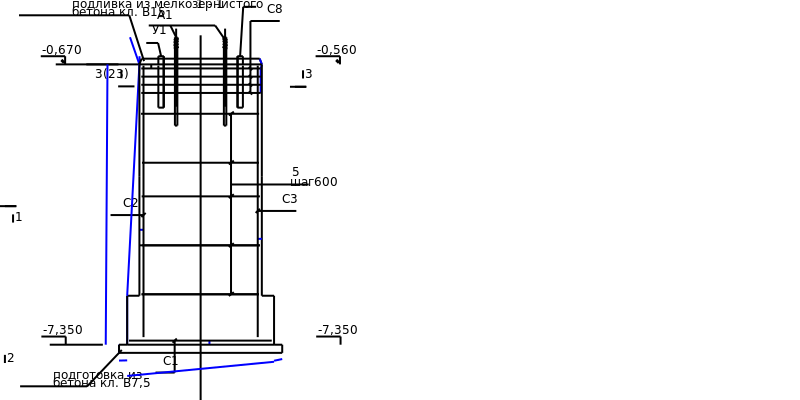

id: 25028581-e48c-47f1-b662-01acd0cff618 entities: 180


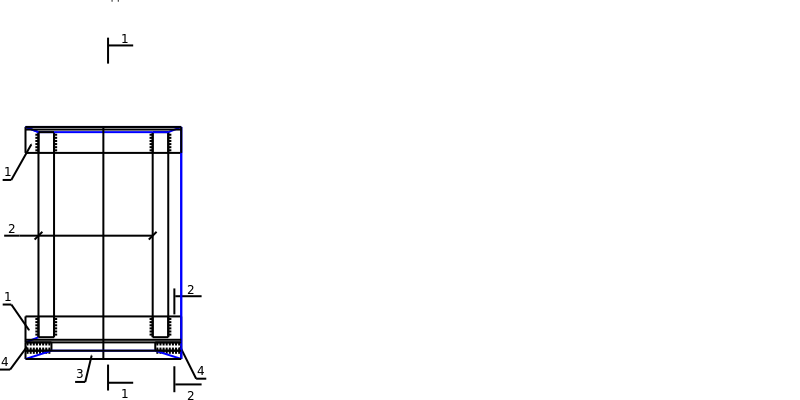

id: 255bcd71-32ca-4f4c-8e91-ef08ea5f718e entities: 1957


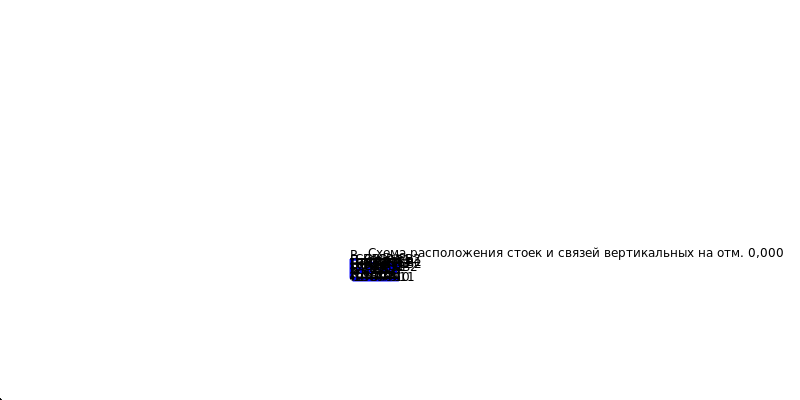

id: 25a45f48-7193-4076-9da5-e5dbaace5be9 entities: 324


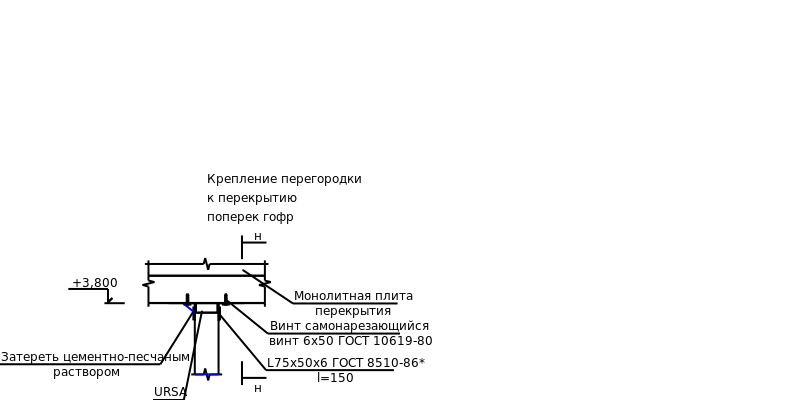

id: 25cf8734-b540-4ac5-a72b-17607efdf41c entities: 79


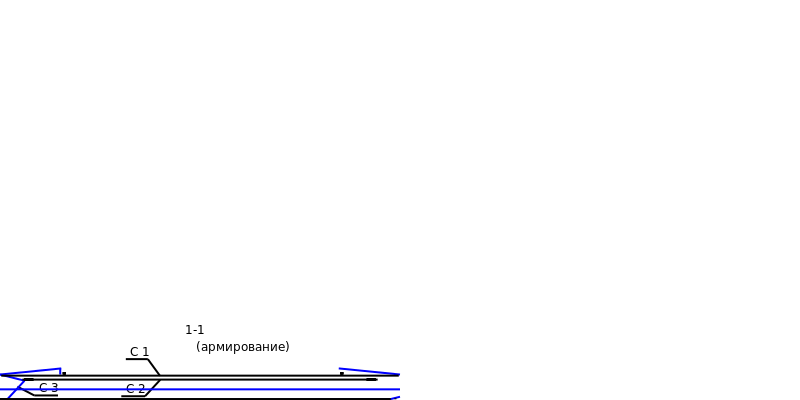

id: 25ead220-ccca-499f-92f6-7059777749d7 entities: 135


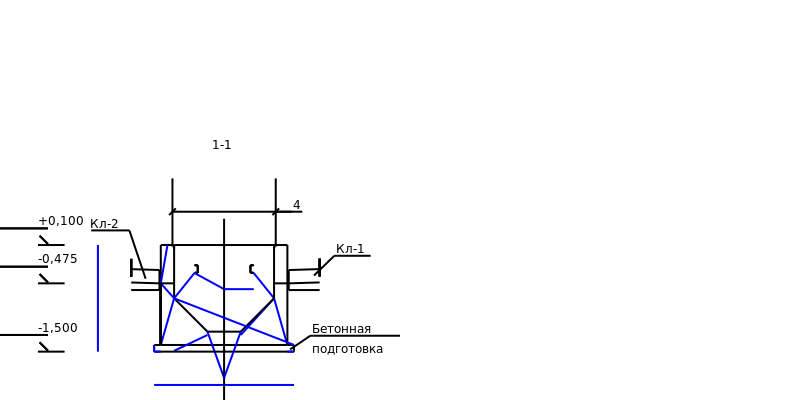

id: 26270263-edd8-4389-88e4-ff5c51885a9c entities: 22


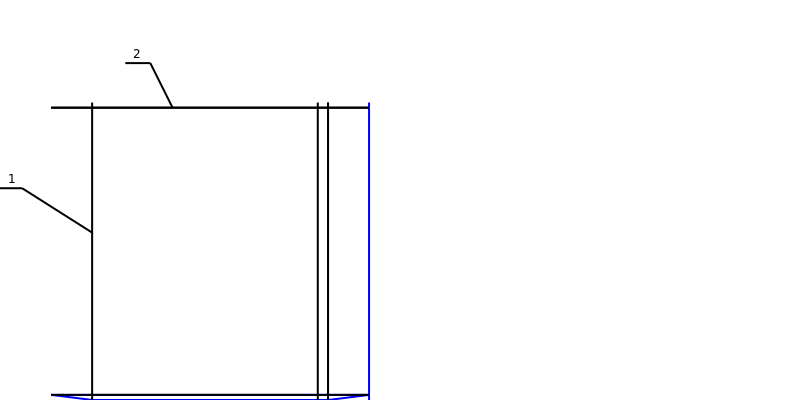

id: 2948838f-9bea-4cba-bcdd-6393297a5f63 entities: 109


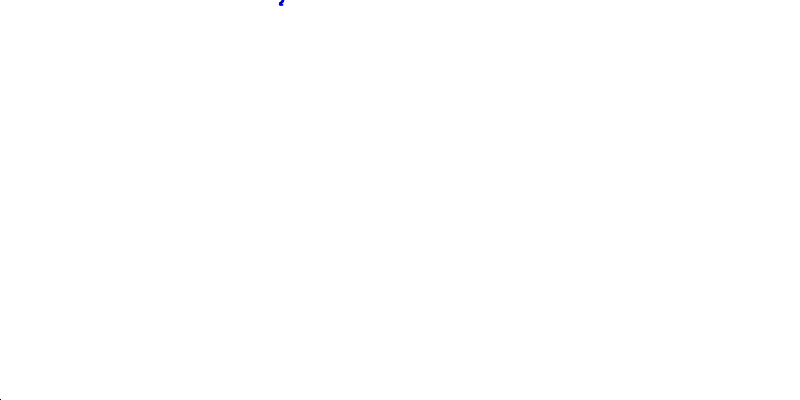

id: 2971fd50-1931-4d09-8275-fa2c2b2f3cbf entities: 17


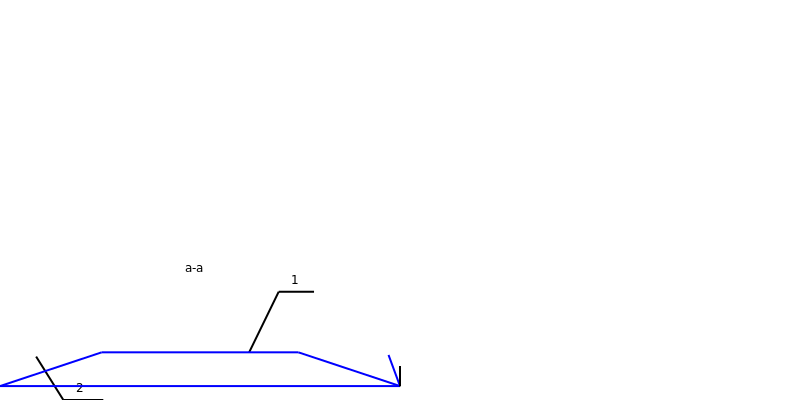

id: 298fae66-7801-45ff-b797-d8113b87a374 entities: 51


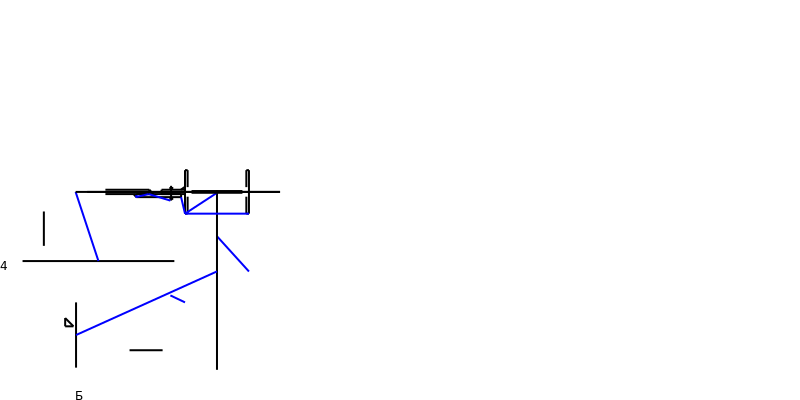

id: 2a741c9a-dac9-4cad-a2c2-29abe200cf17 entities: 281


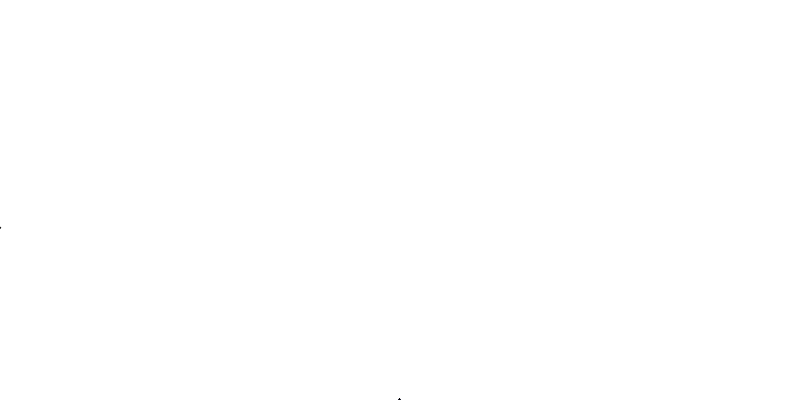

id: 2ab04597-3711-4ca8-a6c7-5821e9c21875 entities: 472


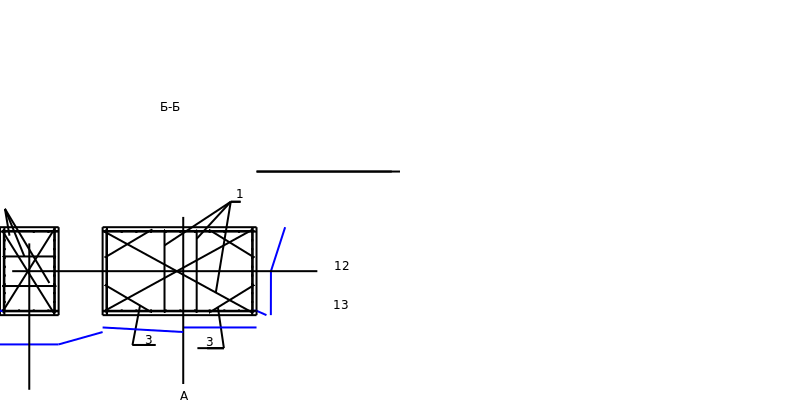

id: 2baede55-dc1c-4e61-8f19-cd23138758f7 entities: 320


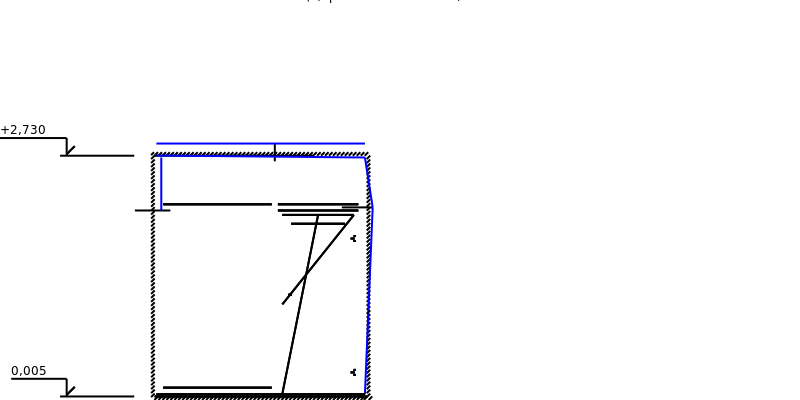

id: 2c32ff4b-ae58-47e9-8d4f-314a4aebc7fd entities: 110


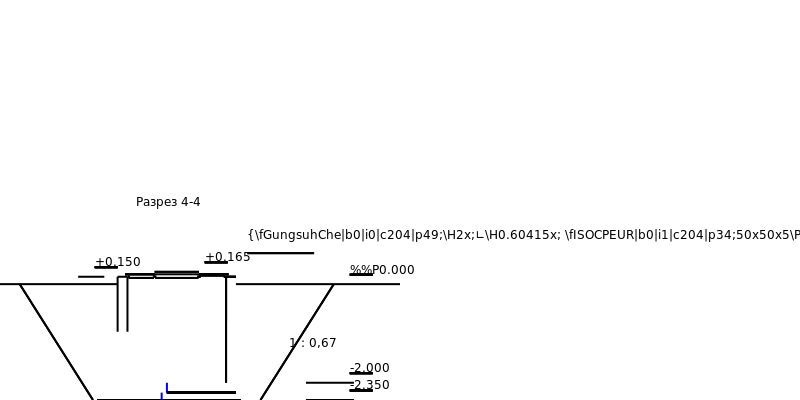

id: 2d26841c-5e38-4282-9c4d-d3ba20d9abb7 entities: 15


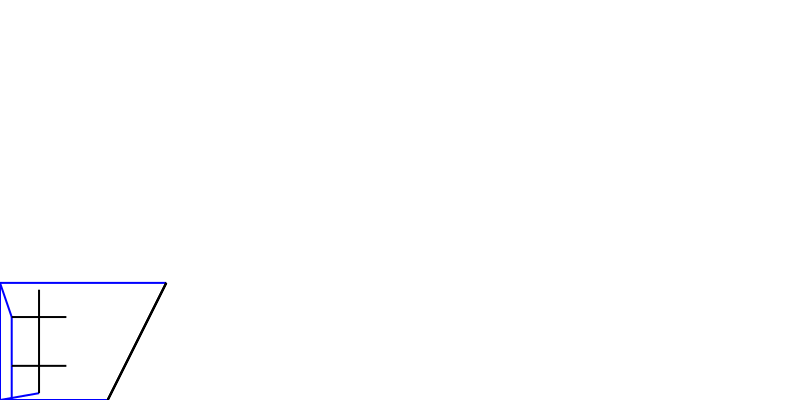

id: 2f5086dc-a71e-4c69-ab58-95112d04b314 entities: 184


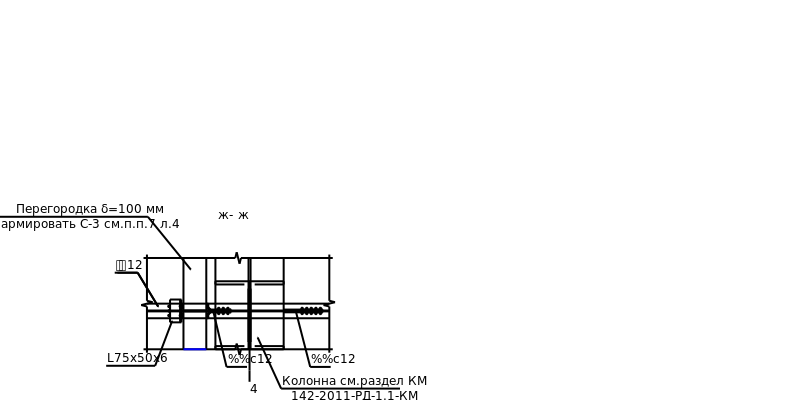

id: 2f67dc29-dd77-4527-9c79-de338881350d entities: 15


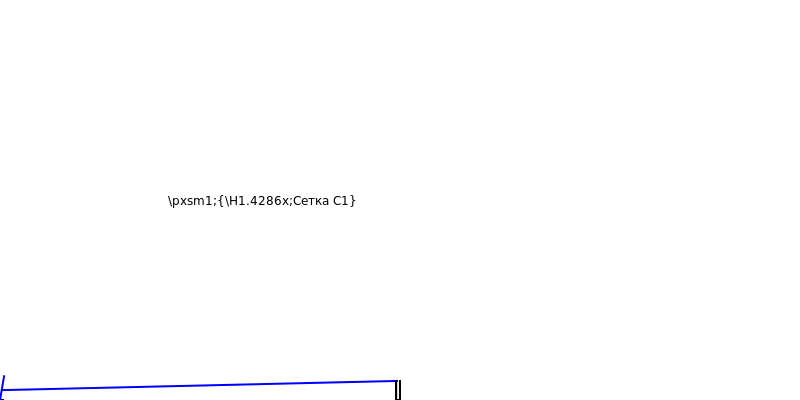

id: 302f2eea-5194-4e30-b3af-d34569e32c52 entities: 169


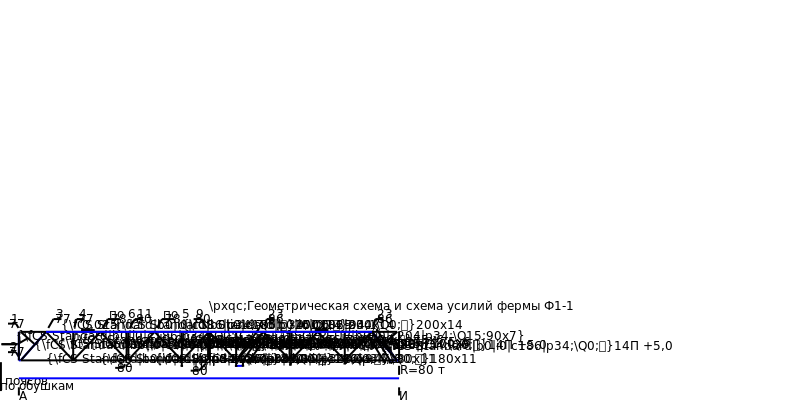

id: 30454311-a270-49cc-8a01-9a938bbf570a entities: 86


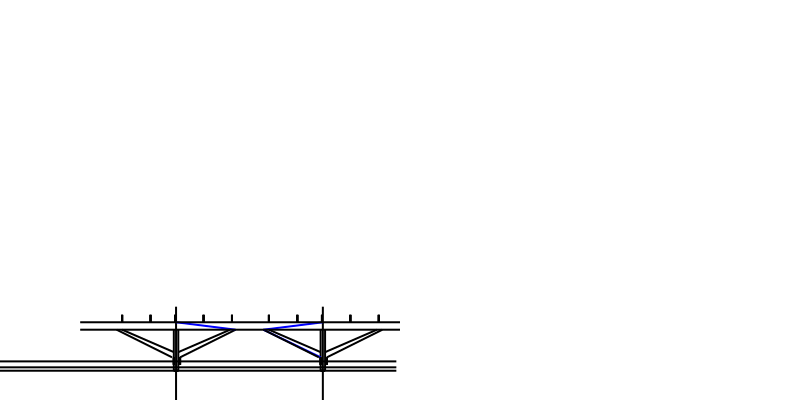

id: 309717c9-4301-4b29-b246-84e5b6113a7a entities: 22


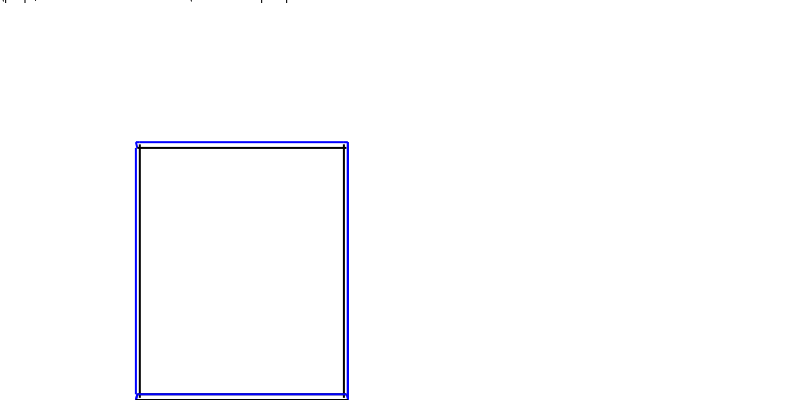

id: 30c88f91-d673-4f6c-ac7d-65212a4d5bc3 entities: 22


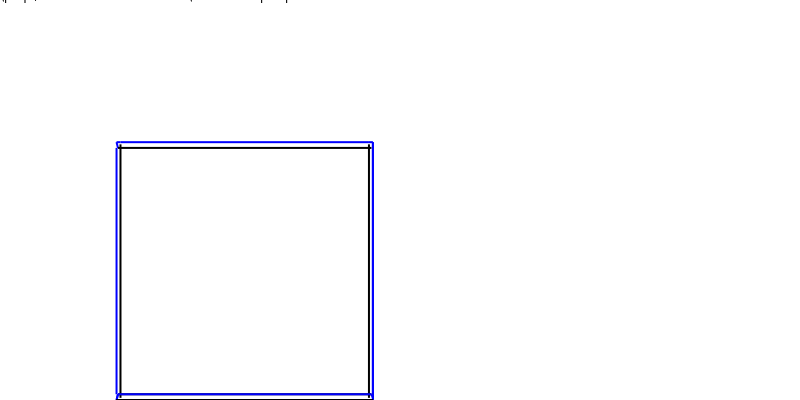

id: 30ebb6bf-9103-4e9d-b5ce-2da098906f88 entities: 137


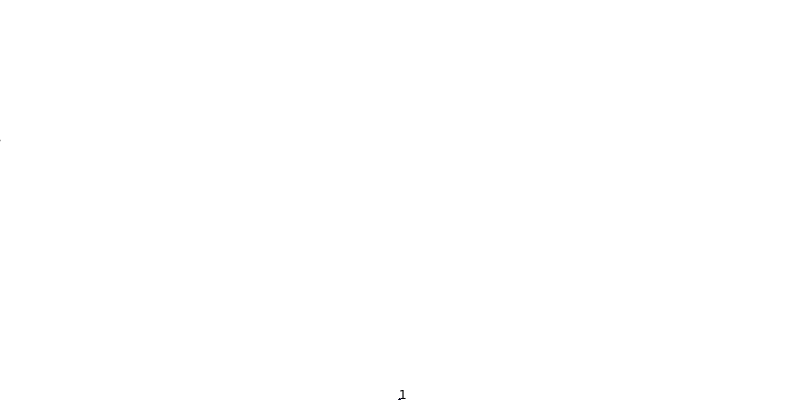

id: 3151f8a0-ab98-4e7c-b586-56385eee080f entities: 119


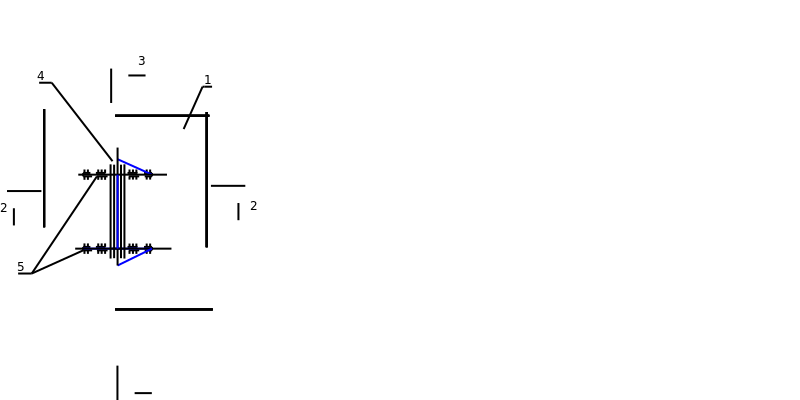

id: 3175f5d3-cc02-4e3e-910e-60093e020fd3 entities: 79


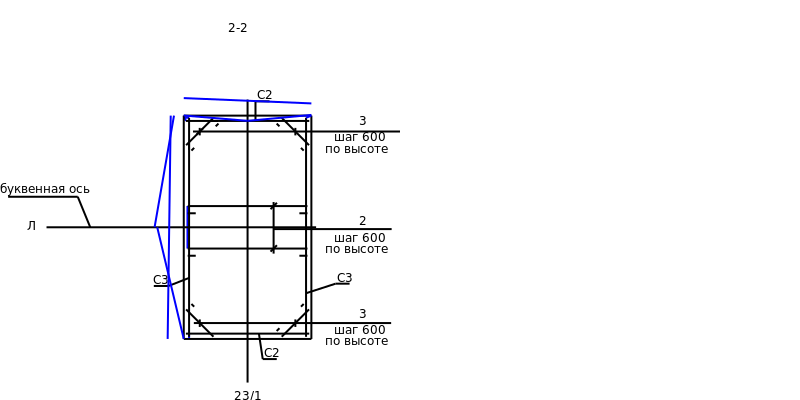

id: 31d9d7c3-b654-4221-b0b1-f80e325c4f3c entities: 760


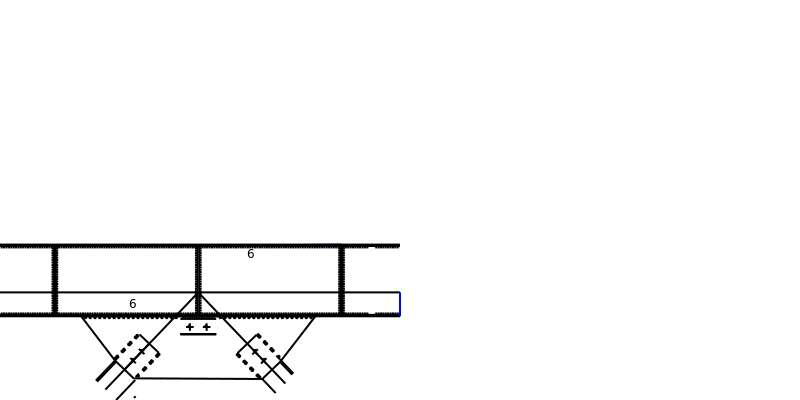

id: 322e5f5f-e078-405f-b48e-49cd5903e1bb entities: 234


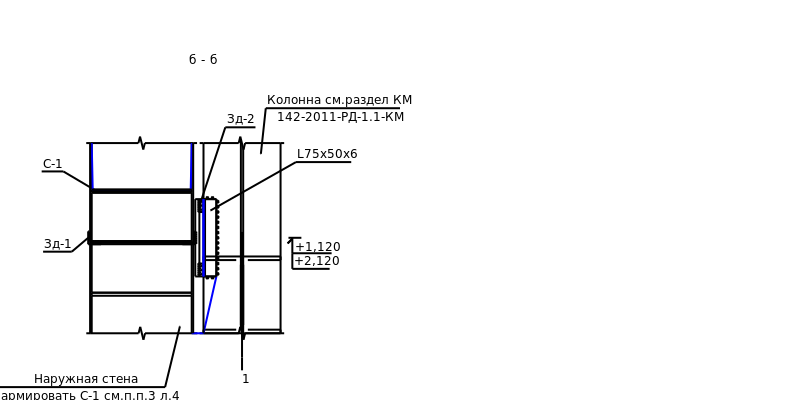

id: 328c99cc-8ddb-45e9-9925-97aebfc23db8 entities: 19


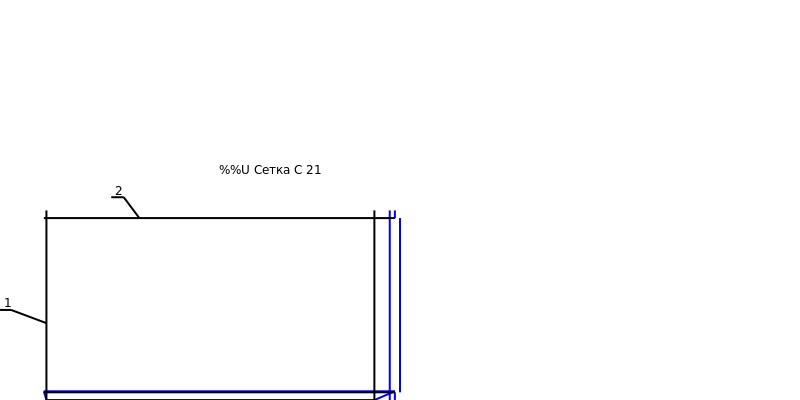

id: 32c46995-1533-4f88-a045-ea391027734d entities: 739


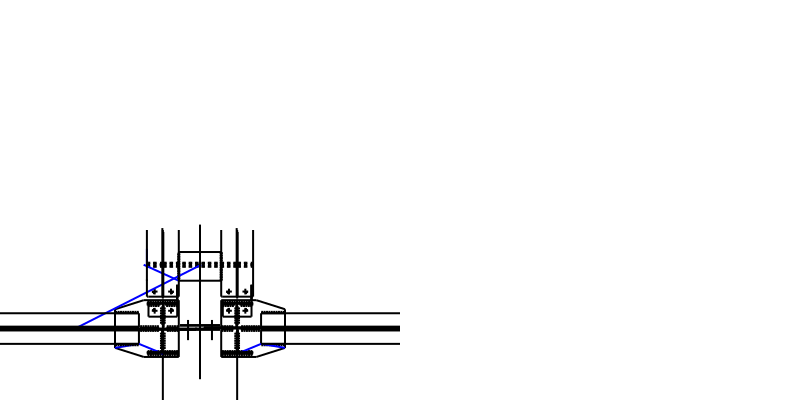

id: 33f9ae2c-aebe-42ab-8007-0a49f7849588 entities: 19


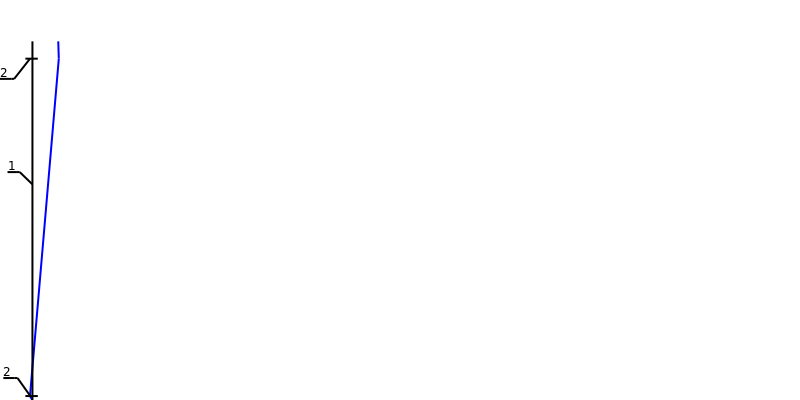

id: 35b60414-f79b-4bde-8f26-165fb47959d4 entities: 51


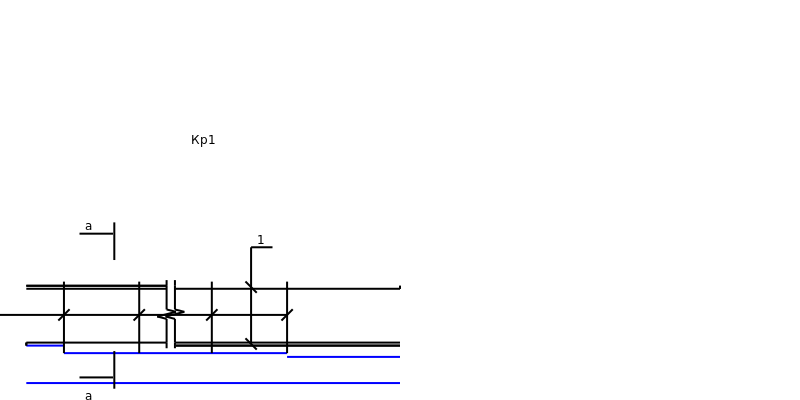

id: 35d81a27-4ab5-4f9f-9b7b-d0fa251657f4 entities: 21


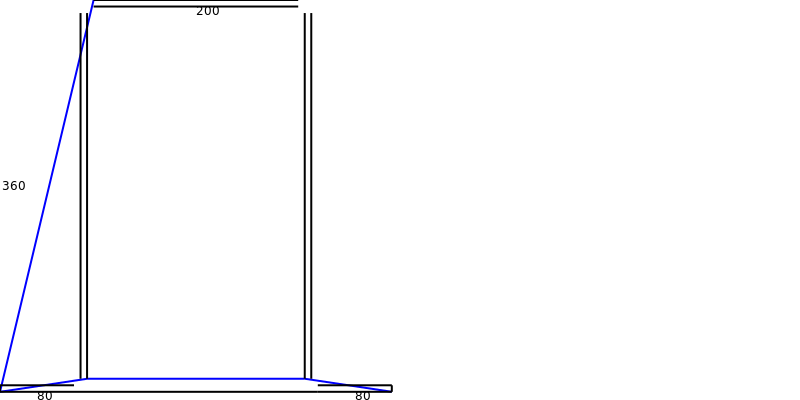

id: 35e49a57-f1c5-4edd-a8a6-450740ada5d1 entities: 318


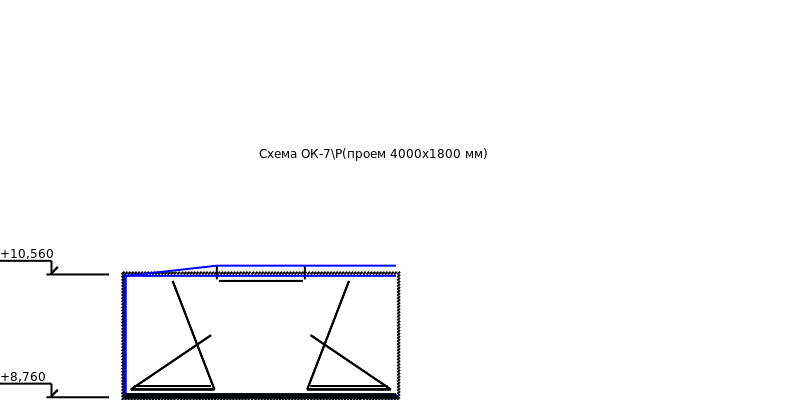

id: 361368fe-324a-4fae-be01-85c6cf22fdd3 entities: 79


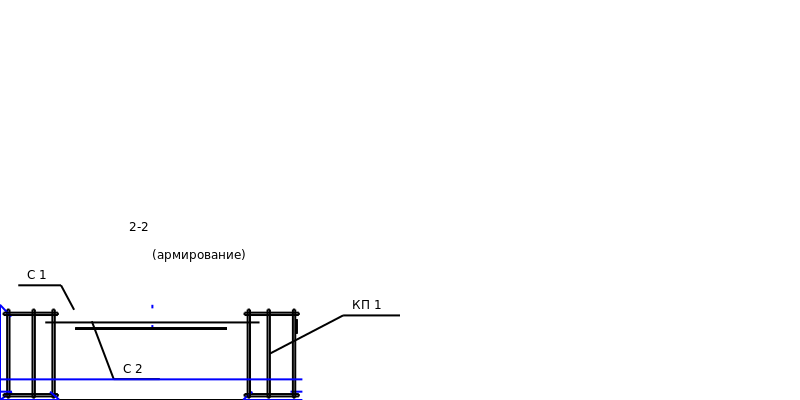

id: 3647b906-ef27-409a-9cf5-7be6da044e92 entities: 73


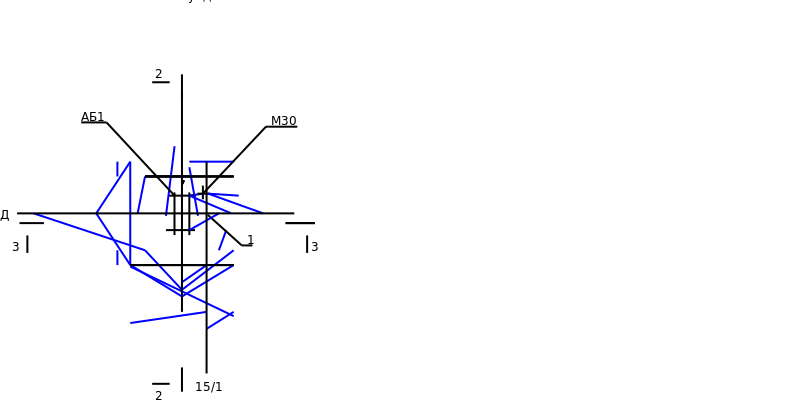

id: 367b7306-421a-4967-ad76-bfb43d8e4143 entities: 676


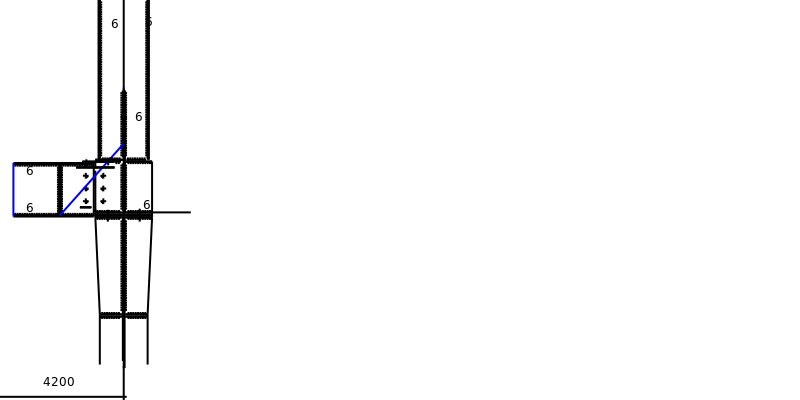

id: 37cc8f09-e42e-4f98-91ec-03822fa6541e entities: 237


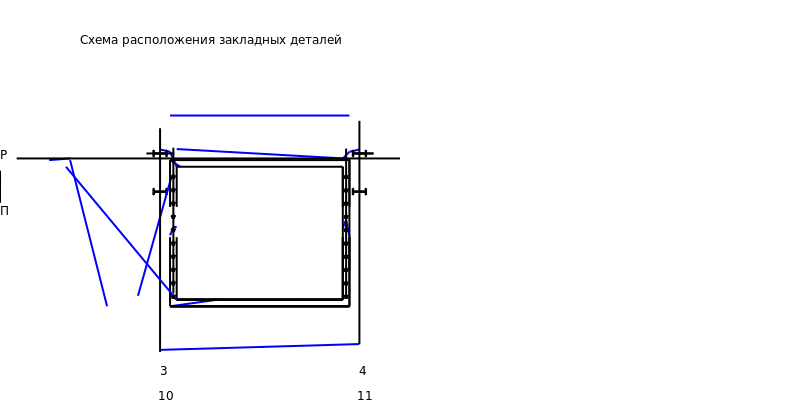

id: 37f5ab4e-357f-4a95-8bcc-2fe83c613f20 entities: 19


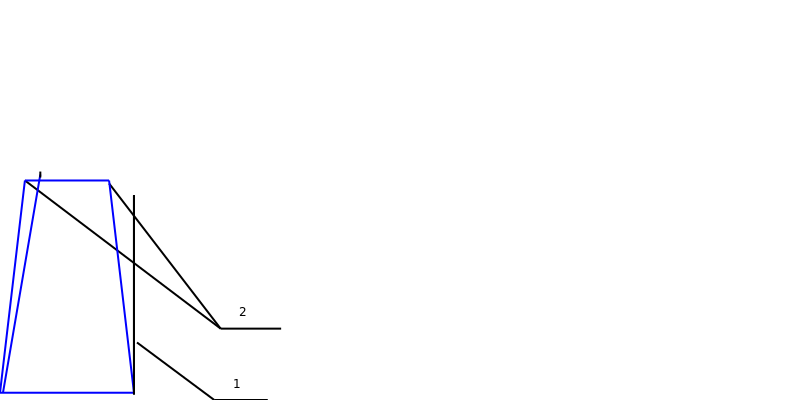

id: 386d8a3e-4d50-4e22-9e14-49018619939c entities: 22


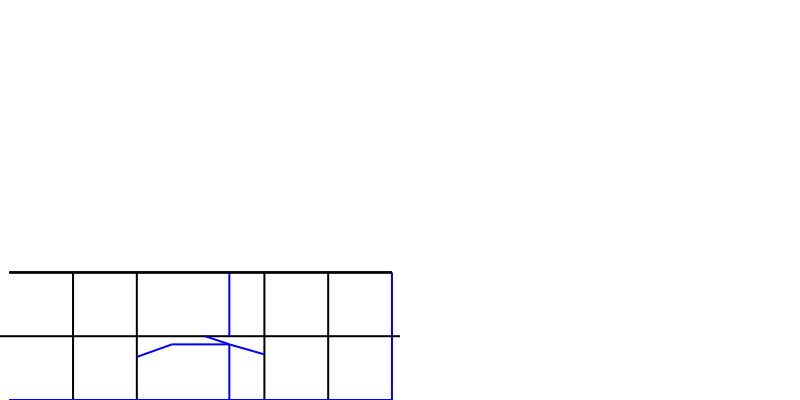

id: 3a310c78-3347-43e8-a92f-0b938dfbd7e3 entities: 19


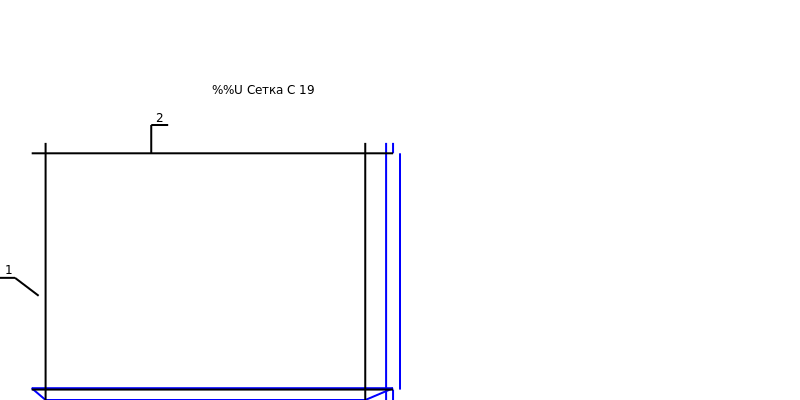

id: 3a893922-0ab3-486c-8a80-7a75209ec2ac entities: 115


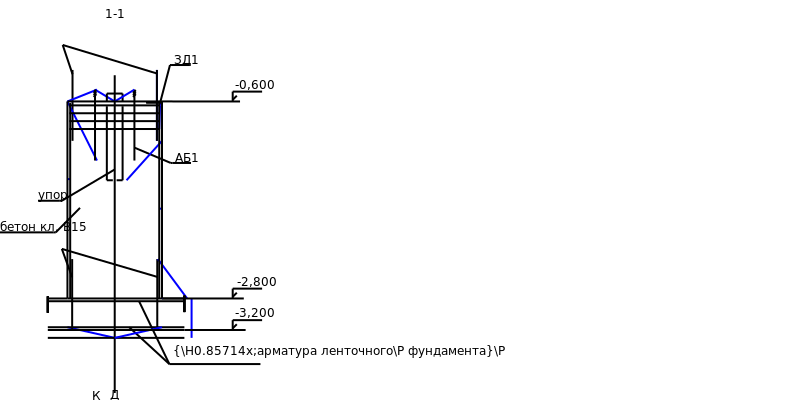

id: 3ab55a83-e79b-4a7f-b2f5-f09634707895 entities: 57


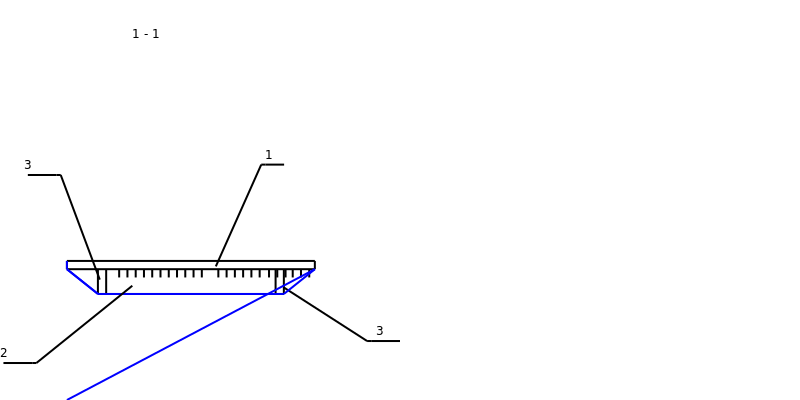

id: 3ac7dd98-39fd-41cd-9e56-18b48742b426 entities: 37


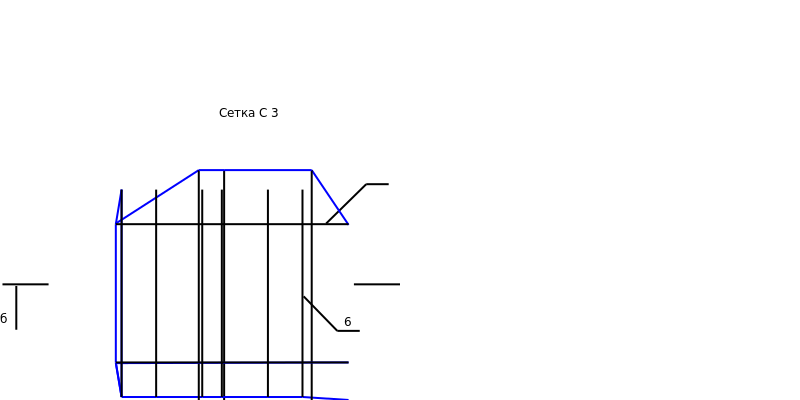

id: 3acc39e0-218b-4303-8e23-2490263a5e6c entities: 86


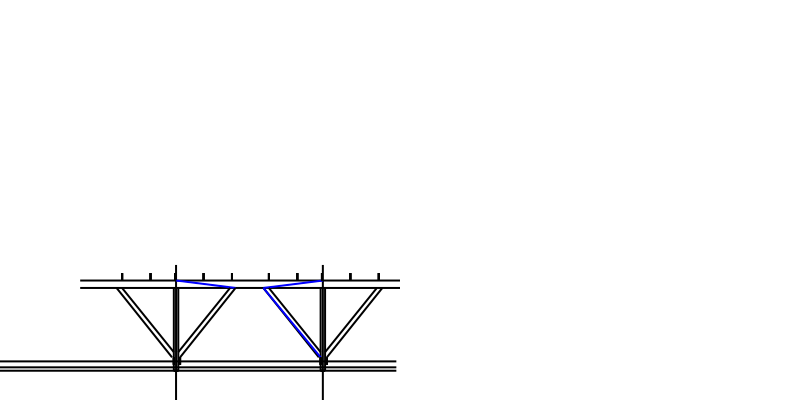

id: 3af772a8-be6a-409f-b228-470883b8c2ff entities: 15


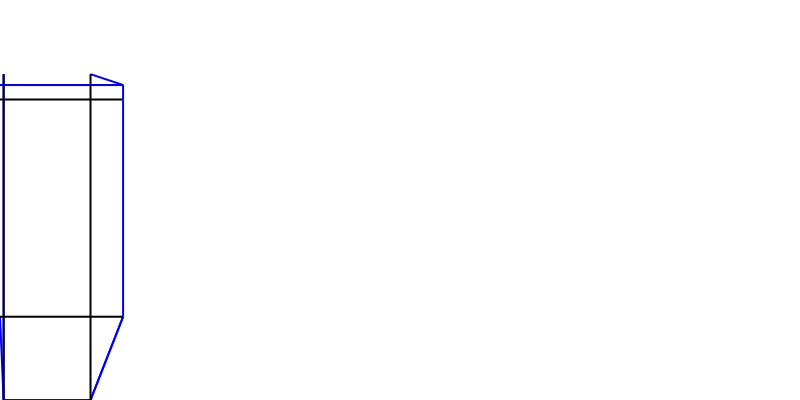

id: 3b2c628d-7ac6-4ac9-88f3-cf7b2ef75b1c entities: 171


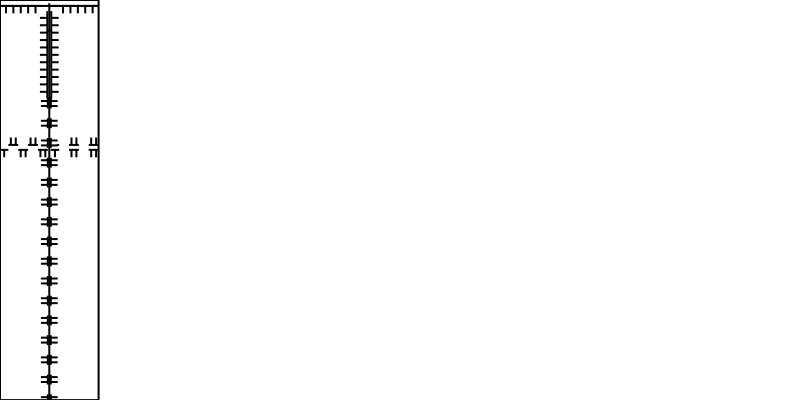

id: 3b890bcc-7127-4c4a-989a-e6ae1efdc9ef entities: 49


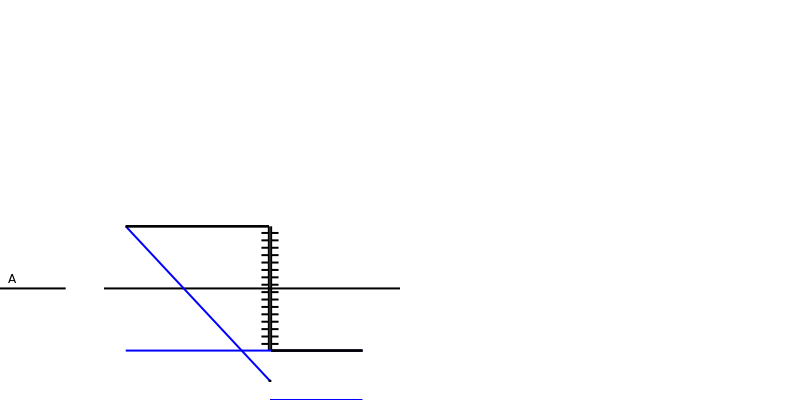

id: 3b93f218-cd96-41d0-8d8c-40154630ab9c entities: 37


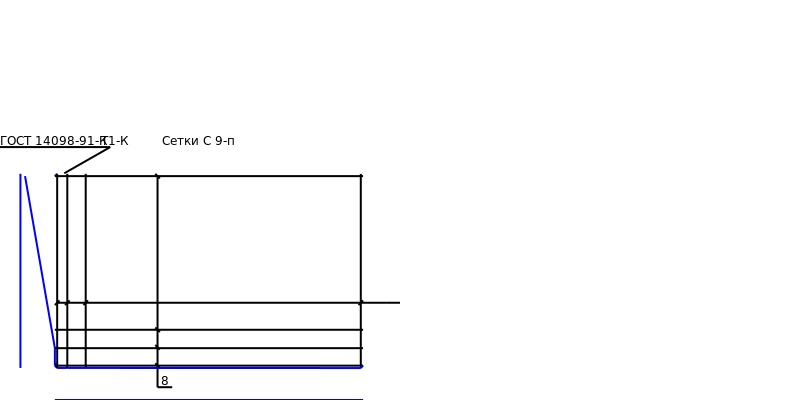

id: 3c0ae838-53fe-4be2-9cd6-dccdcbce3261 entities: 19


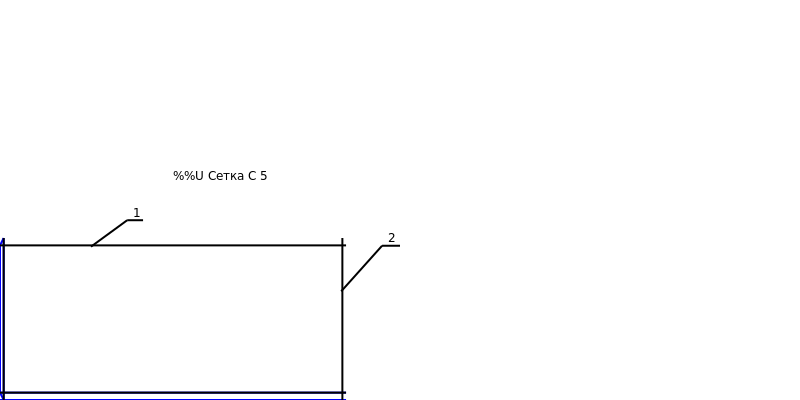

id: 3c3419af-b8fc-4510-b28d-3d47cde29247 entities: 89


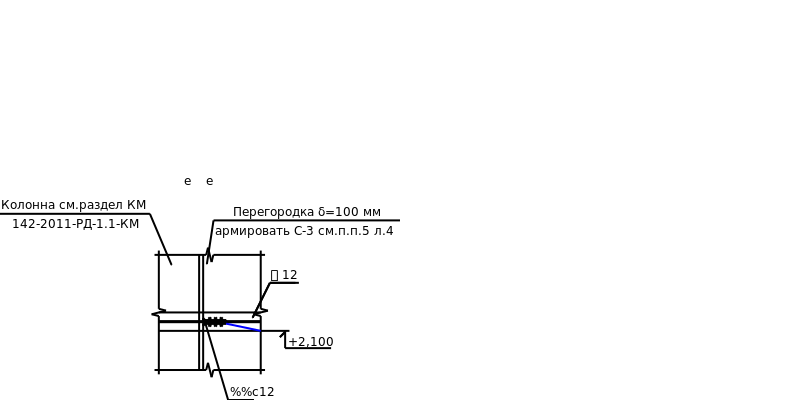

id: 3c76daf7-db14-4ea1-ab11-0b9a567d1ee3 entities: 39


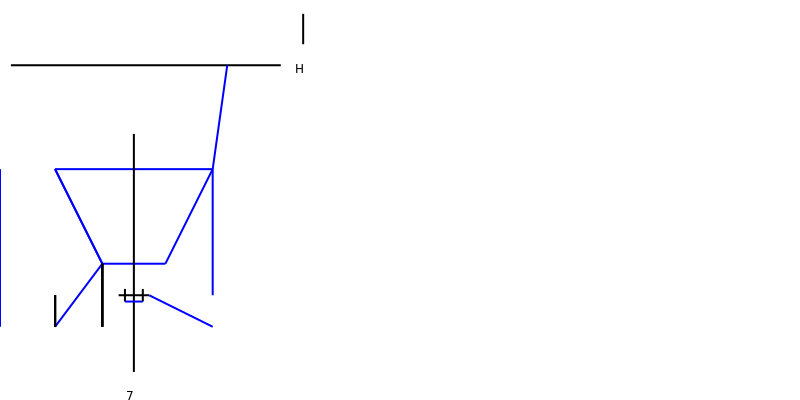

id: 3d19e89e-c50d-4c94-96ed-b9e4f7ea11db entities: 184


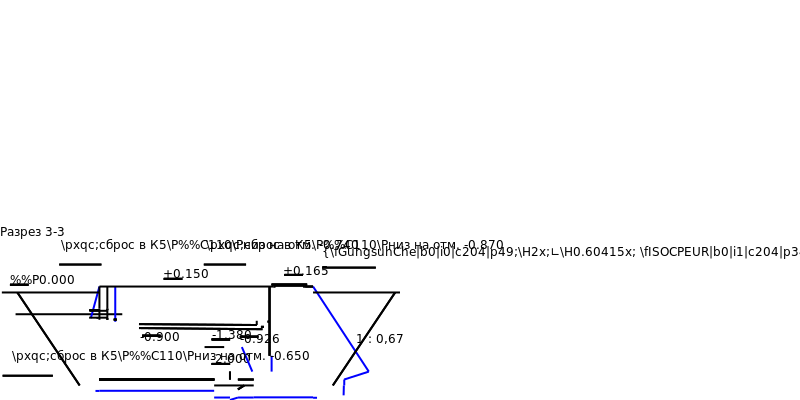

id: 3dafa11f-948c-43bb-9c63-5670d7d9c17e entities: 28


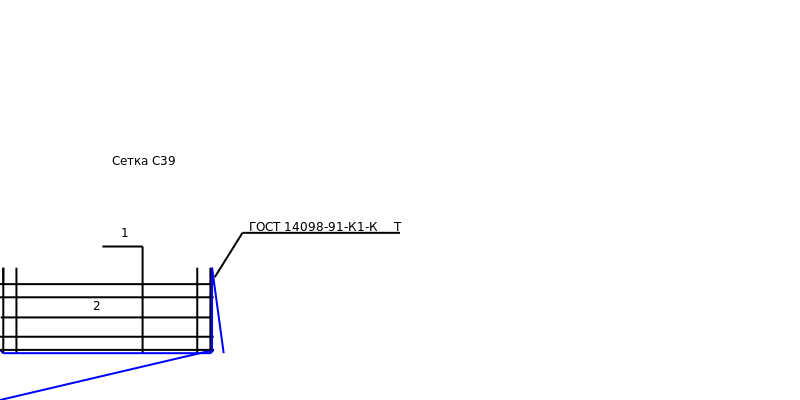

id: 3e220615-1153-46ab-b54b-20cb4dfb79d8 entities: 231


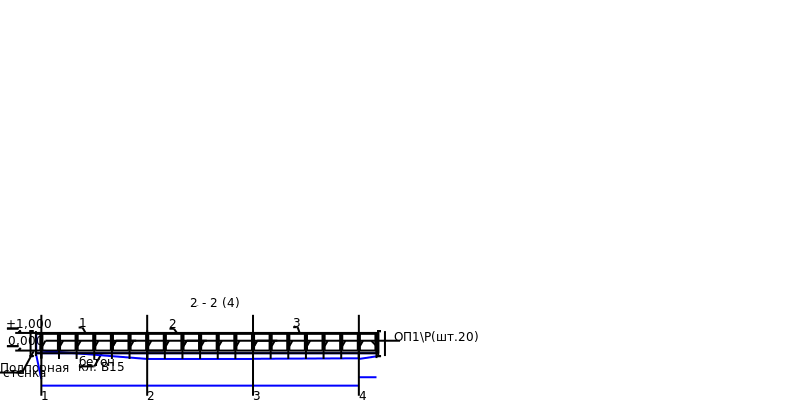

id: 3eb73dec-fedb-471b-a7a5-c6a19d8d7cd6 entities: 93


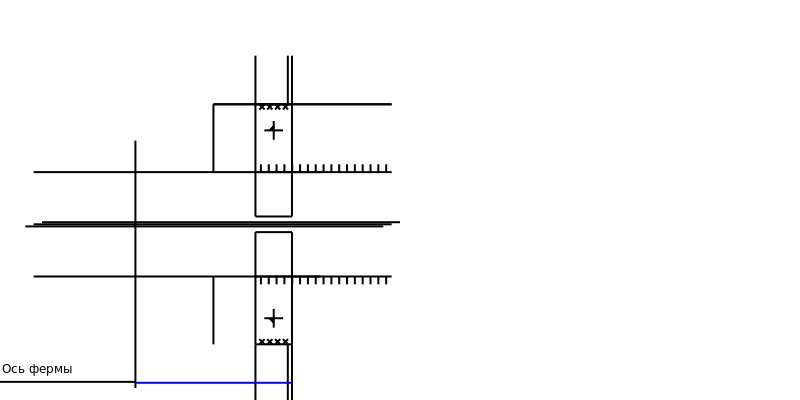

id: 3f1fd391-51f0-4241-af07-af1eff0336bb entities: 59


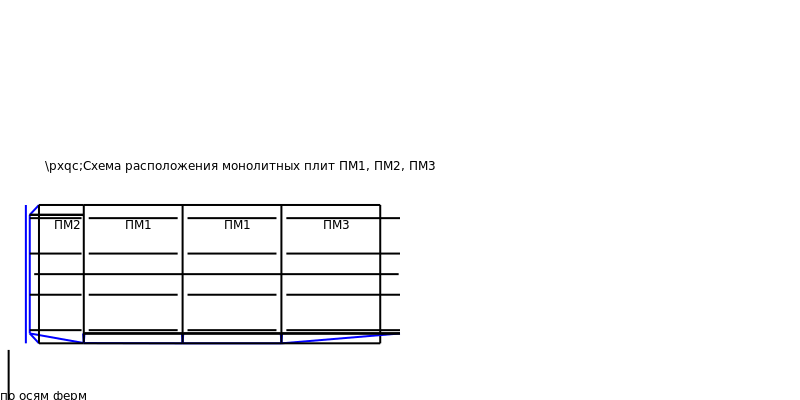

id: 3f5f70b4-a566-4956-a7dc-50f024493cc3 entities: 171


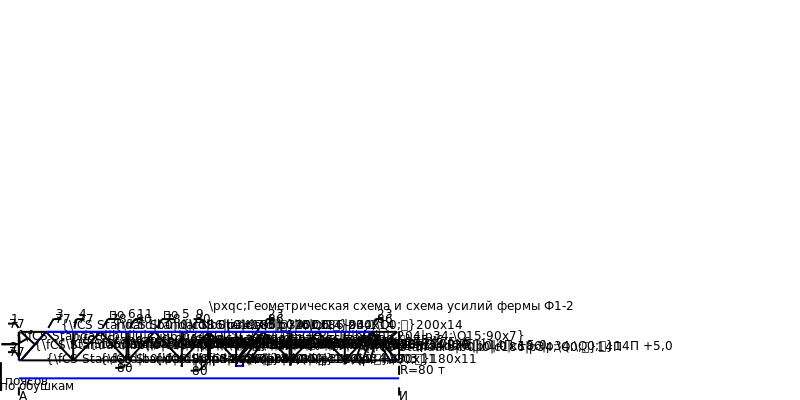

id: 3f841766-07cf-4352-8a25-b71a27a37742 entities: 230


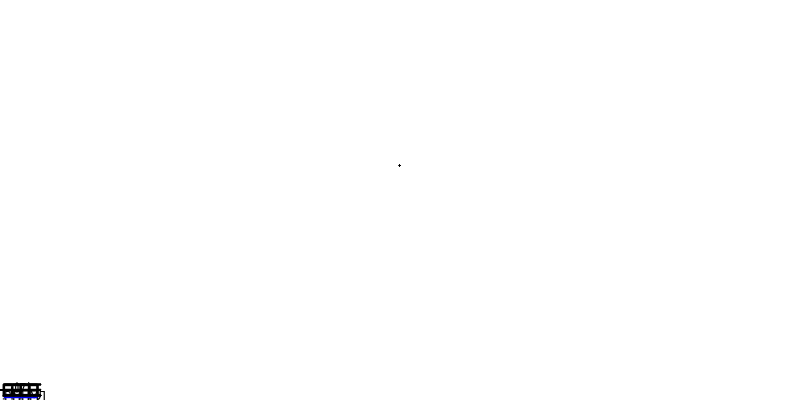

id: 3fea0d82-a26a-49c5-8ce8-cb5e444382e3 entities: 270


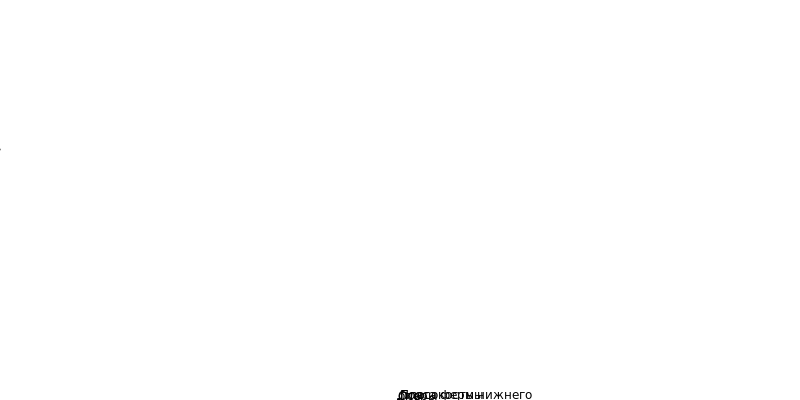

id: 40706f11-2b92-4482-b232-2aed94607eca entities: 185


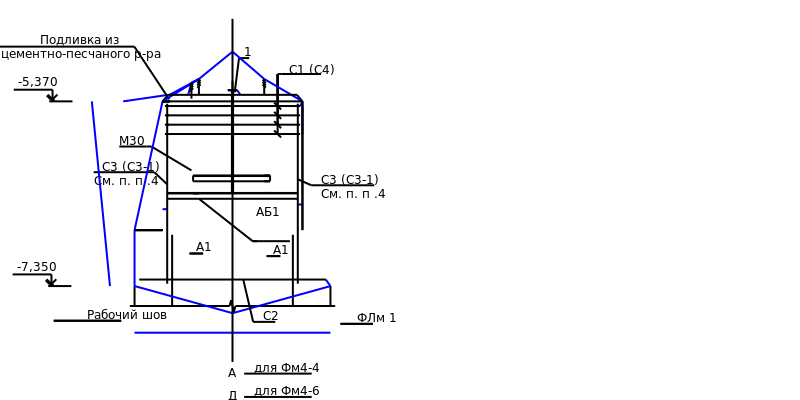

id: 407c9f6e-7579-4e78-b6c8-ce591041d6fe entities: 98


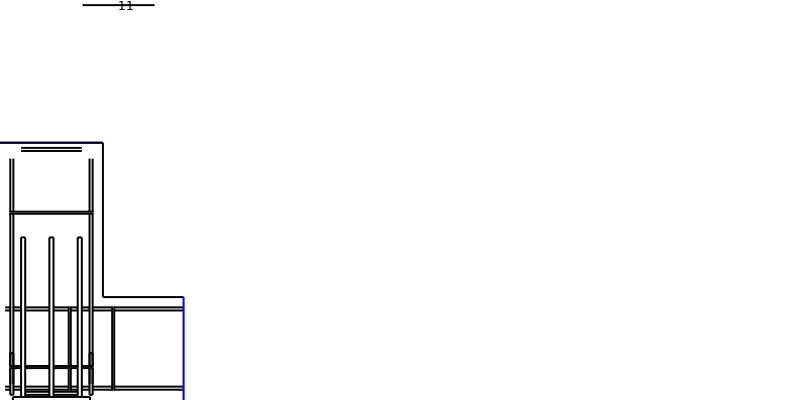

id: 40c16a76-d04b-44e9-aab4-c0b51a293c9f entities: 22


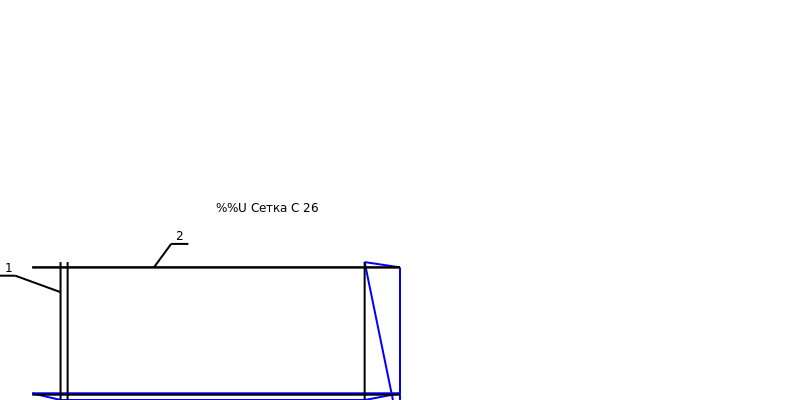

id: 411057a6-d0c9-4022-b30d-4ae5b1f0ad3d entities: 445


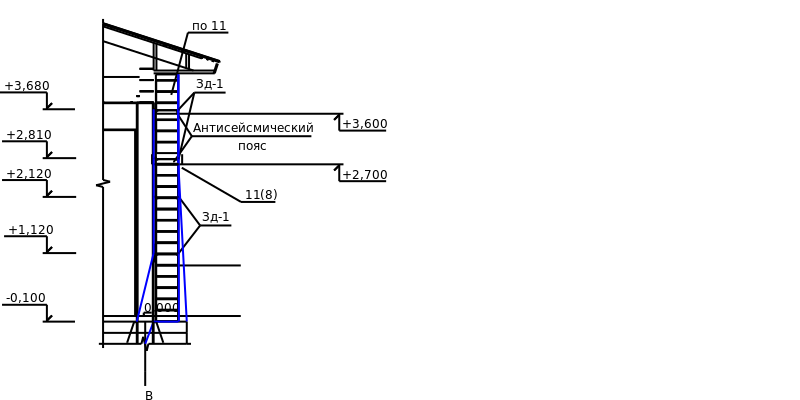

id: 416a4fb1-fcd7-422a-af39-ff55bba10c3b entities: 52


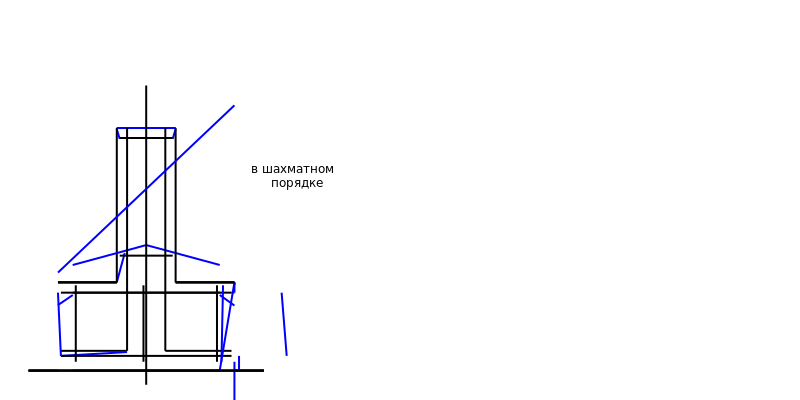

id: 41e8b25c-b463-4588-8560-c8573da57059 entities: 42


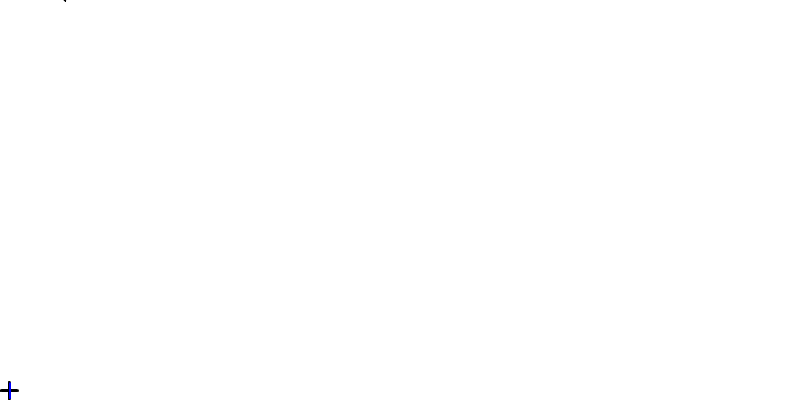

id: 427c10c9-706b-4ee3-986d-e341898f6895 entities: 19


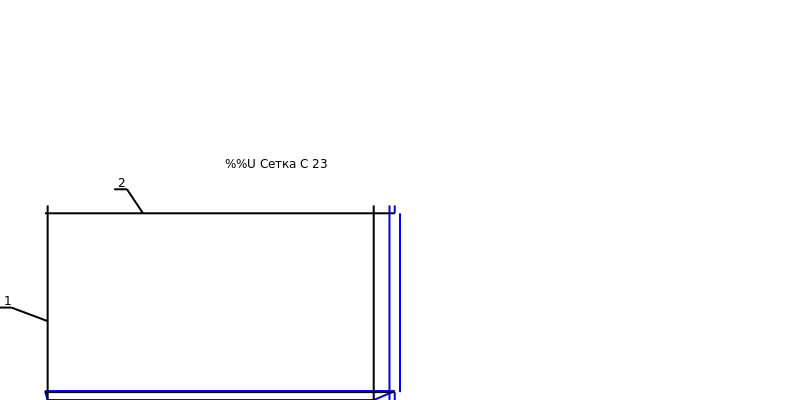

id: 42a8727c-0826-4fdf-8f42-2e0077271315 entities: 116


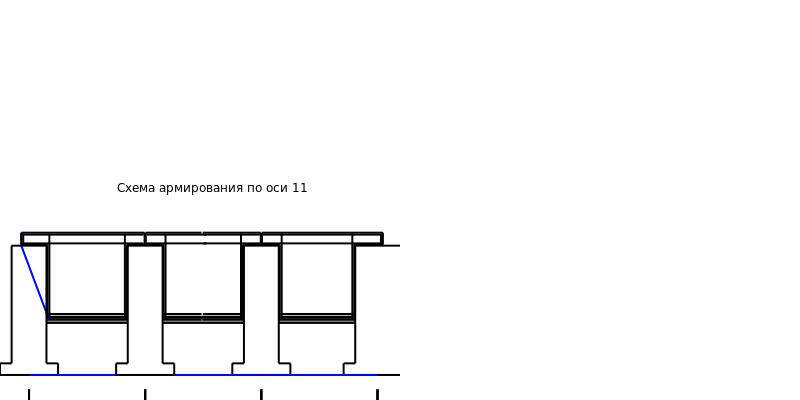

id: 43ee8544-a4d0-4292-8071-4a2eb32f05db entities: 430


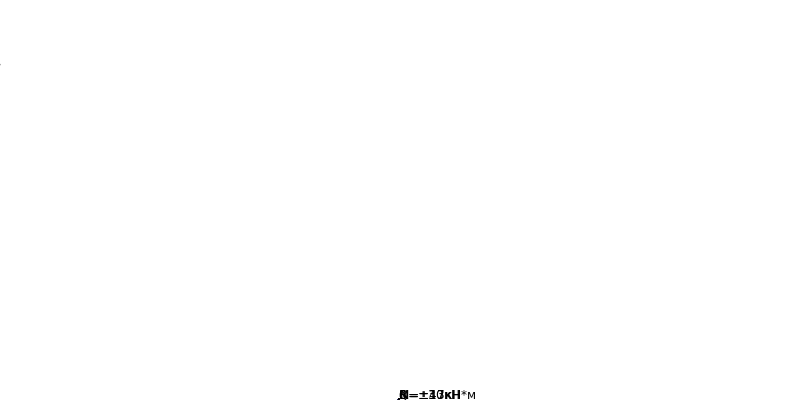

id: 446adc04-83fa-4604-8c81-c8c24f915143 entities: 94


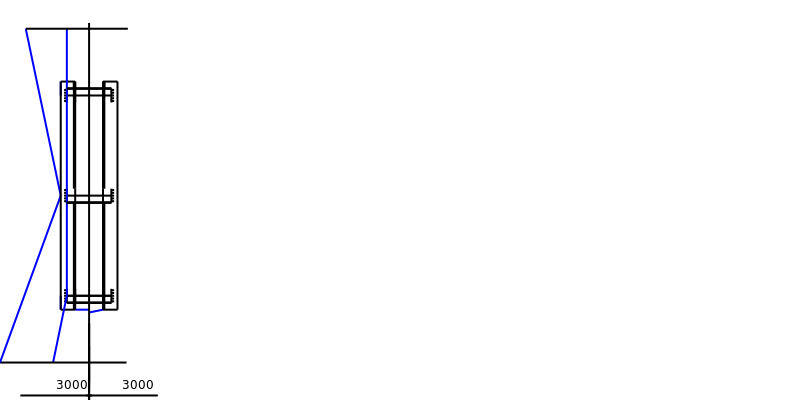

id: 45591d59-4d87-4dec-83c6-c9630bcac50e entities: 36


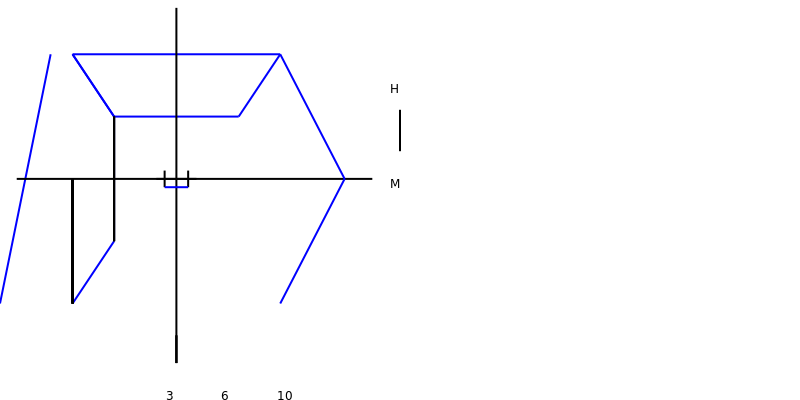

id: 455abe91-615a-4135-8a0f-4bf78e26da87 entities: 193


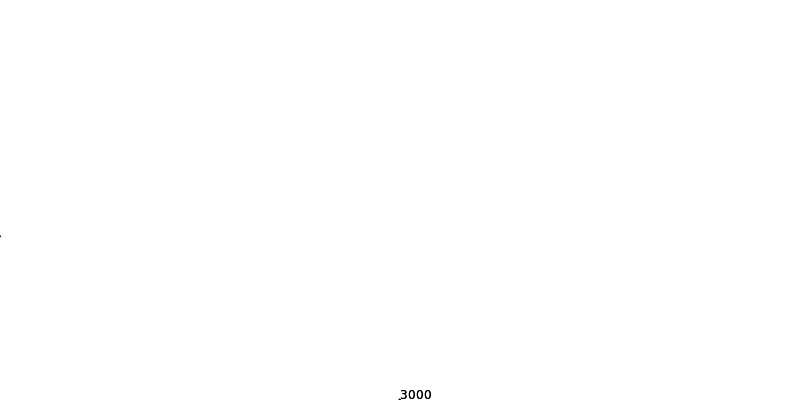

id: 45f73bc0-d91f-4d82-8066-317972240be4 entities: 91


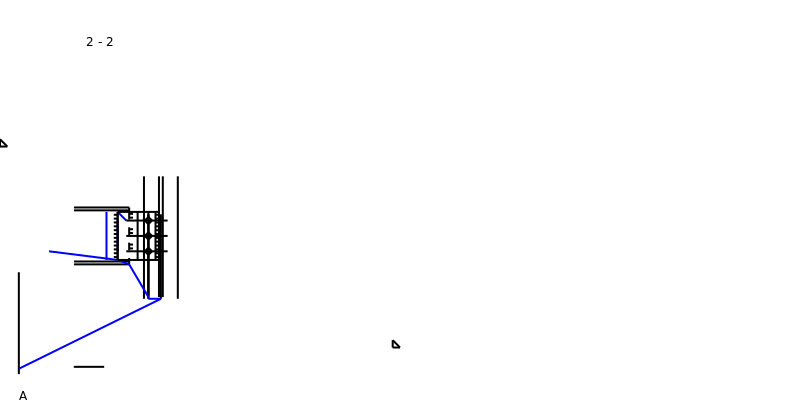

id: 465d16c1-6322-45a9-9f79-544b818ea00c entities: 139


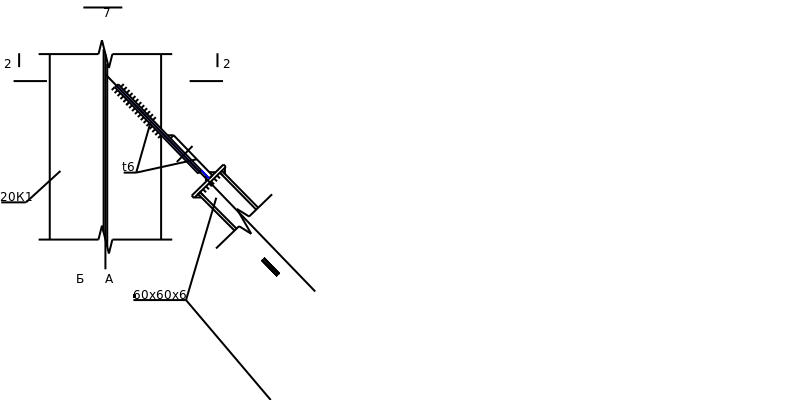

id: 4777a592-2eb9-47ac-9d81-0aadb0a8dac2 entities: 26


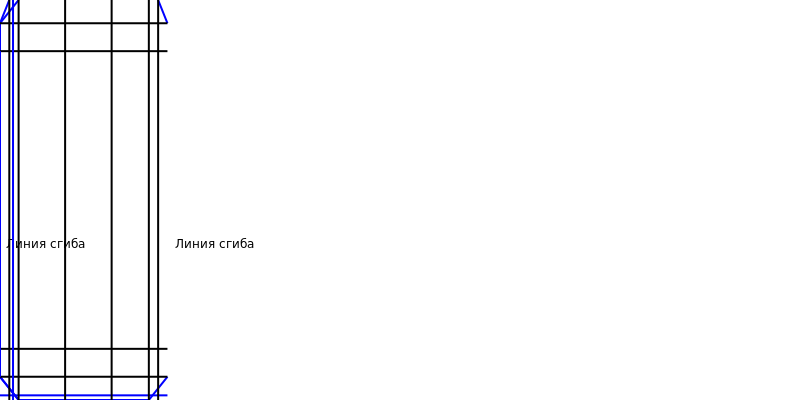

id: 47adfd42-a866-433b-9159-8eca373b2fb5 entities: 21


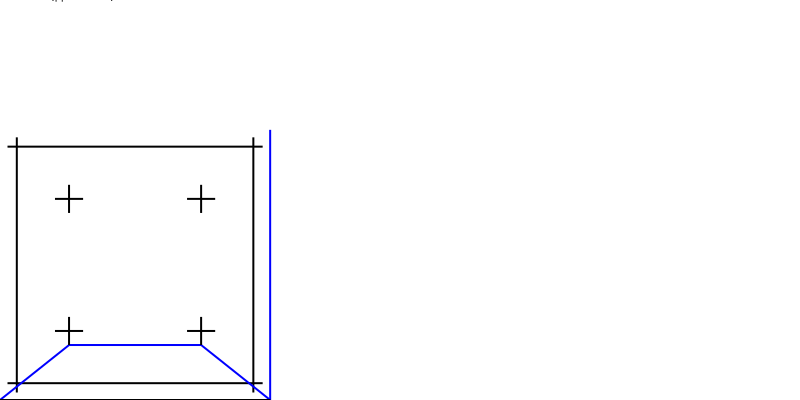

id: 47cb380f-1768-4841-a807-d244663fd730 entities: 123


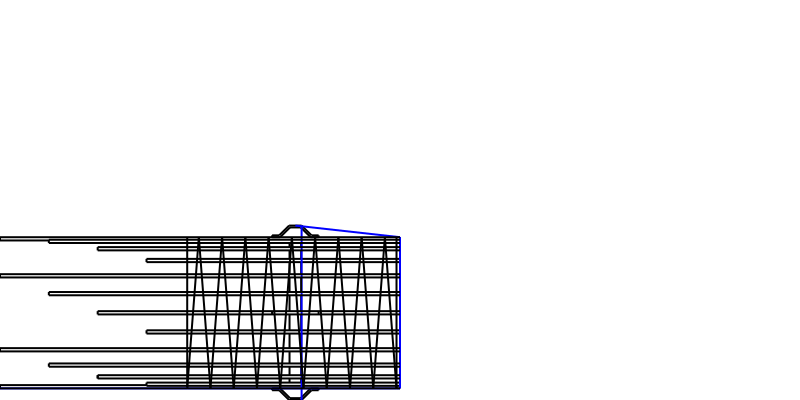

id: 4999074d-46ae-476f-a6f8-3d944a28d2c5 entities: 44


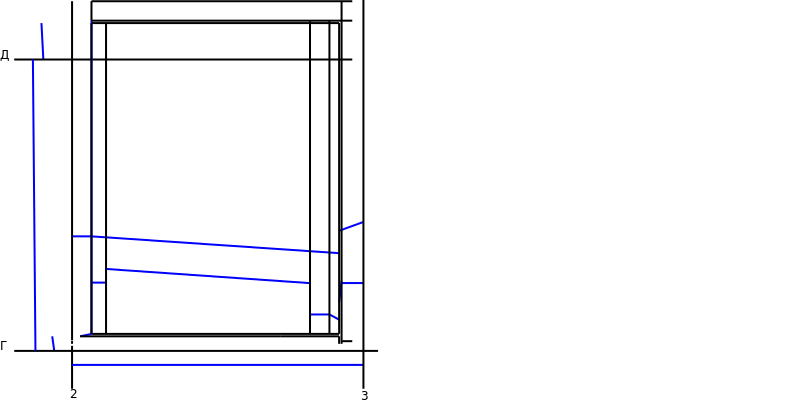

id: 49cb4648-79c1-4d13-a3d5-0a999c7ee244 entities: 228


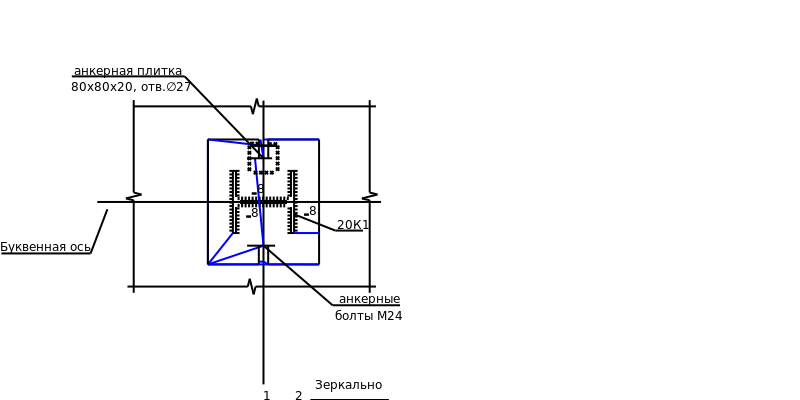

id: 49f1d941-4753-4ae1-afde-21329ff51805 entities: 373


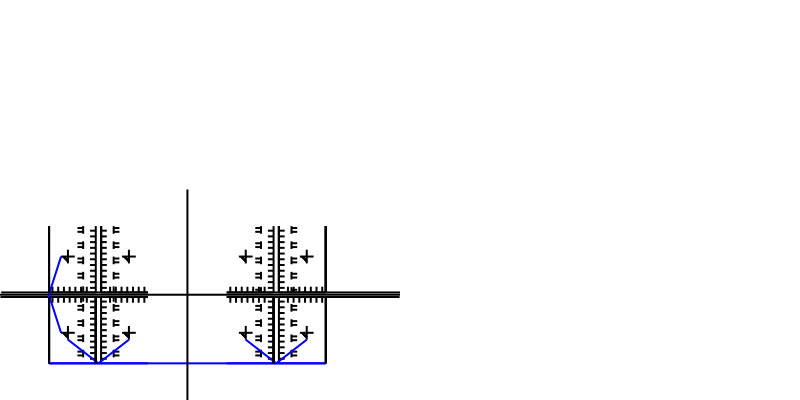

id: 4b7660a1-9bf1-4771-b8ed-b590b37e9342 entities: 274


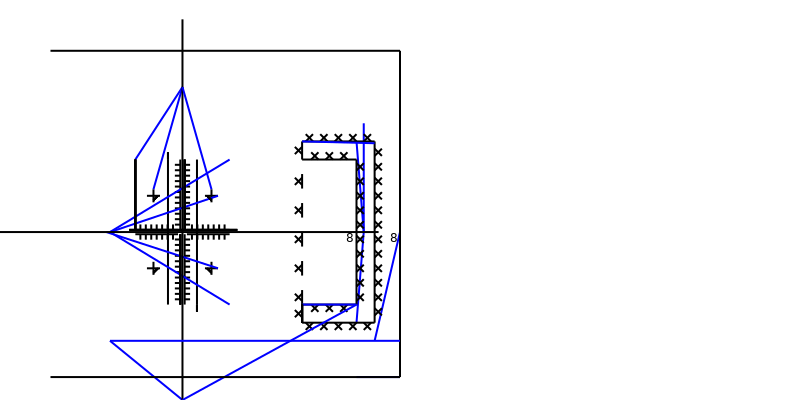

id: 4b7a59ba-deec-4268-a53b-1fe084938872 entities: 82


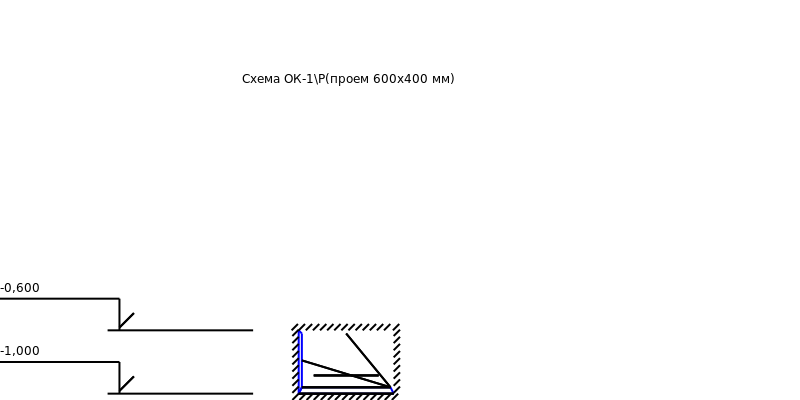

id: 4bdda589-ec10-4231-8b83-e680671e352c entities: 219


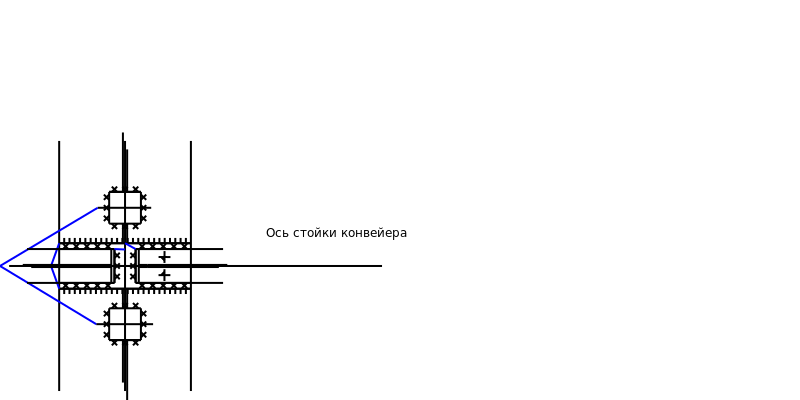

id: 4c96f384-6ac0-4fa5-a485-7e6ac33d7a8c entities: 96


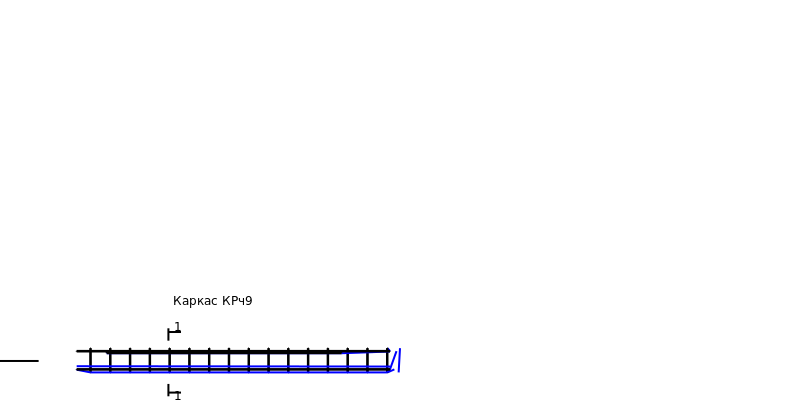

id: 4cf84d69-3fe9-4087-bdce-7aed8eb0db4b entities: 21


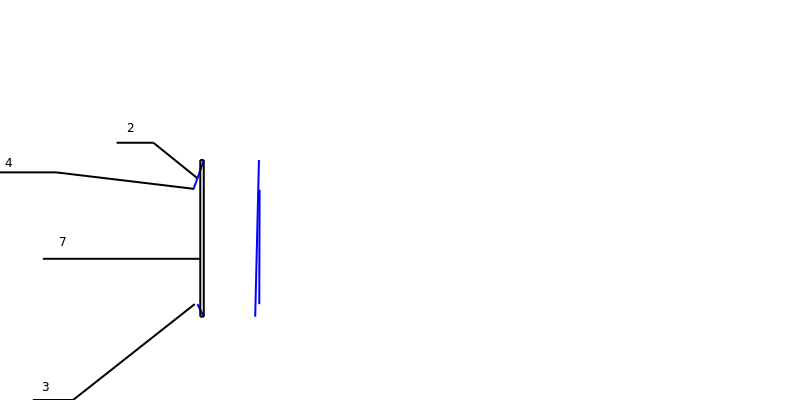

id: 4dd601d2-301f-41f1-a684-d3ed1de6c8c2 entities: 217


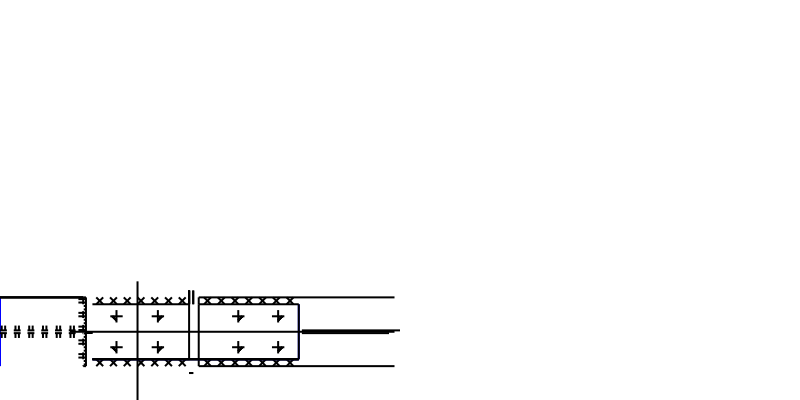

id: 4de8177c-8c69-4910-a484-899d424863dc entities: 19


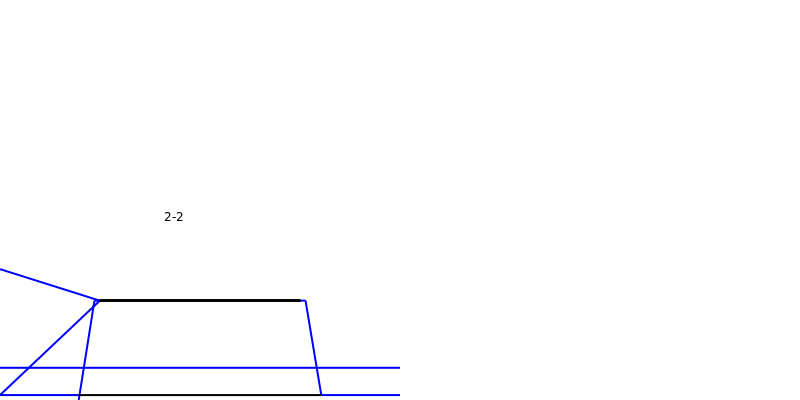

id: 4df08305-b39a-499c-ba5d-fd4ed430ae3e entities: 86


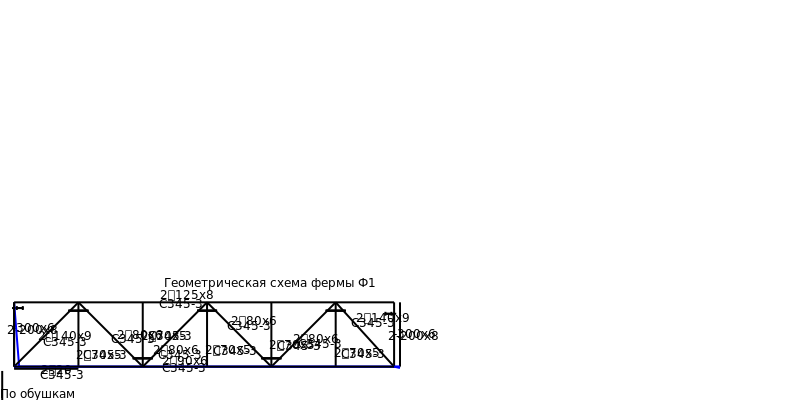

id: 4e430d30-d658-4199-867d-226c11e053f7 entities: 15


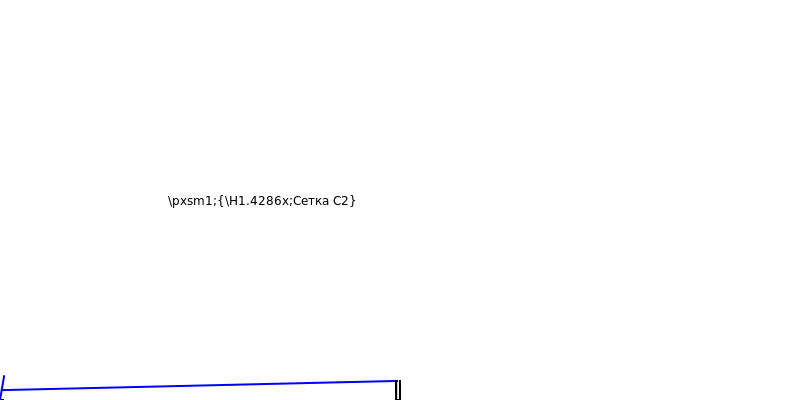

id: 4e4db2eb-df60-45b7-9a0c-fbd9024e5b29 entities: 676


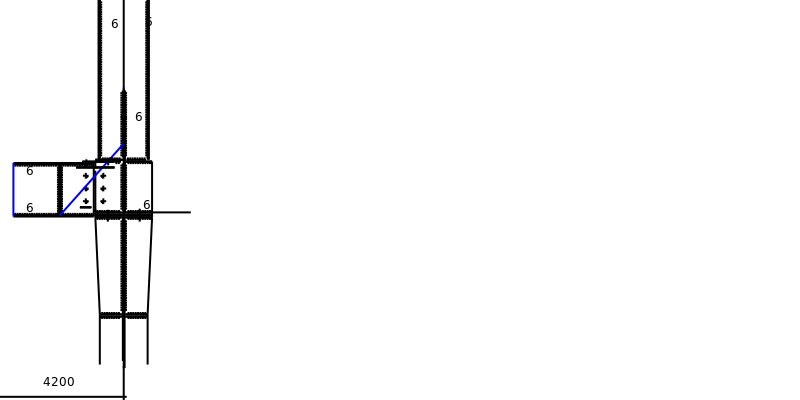

None

id: 4f633ed5-caeb-4df4-a742-37a8c0871baf entities: 82


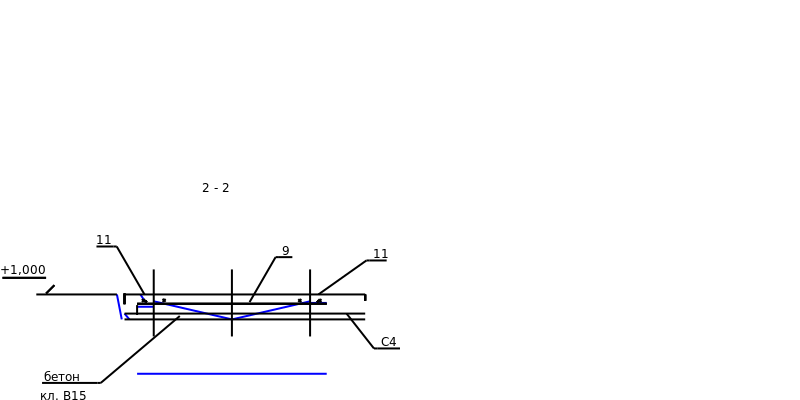

id: 4fc6a364-1698-4815-a7f8-3f247ad247aa entities: 248


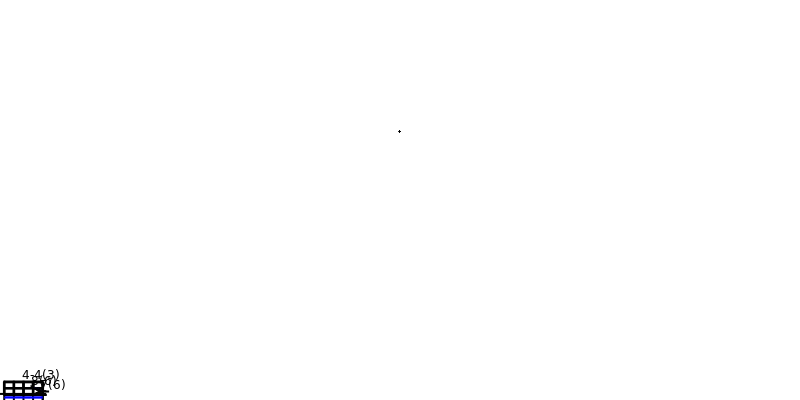

None

id: 50c7592a-e80c-4fca-9ade-c7939d9650c1 entities: 104


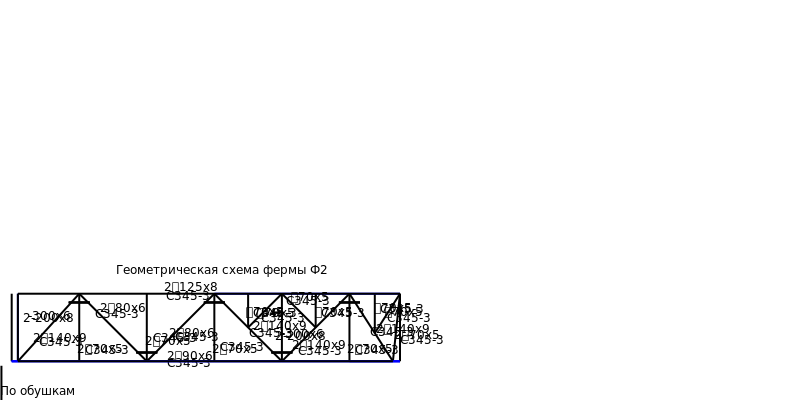

id: 515699da-5960-4e78-a8e5-3860b5b1cc21 entities: 22


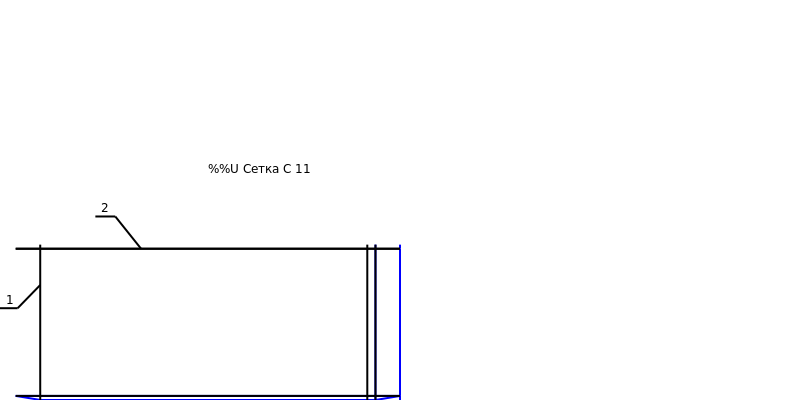

id: 52380490-0c5d-43da-b2df-eeb3bf953099 entities: 82


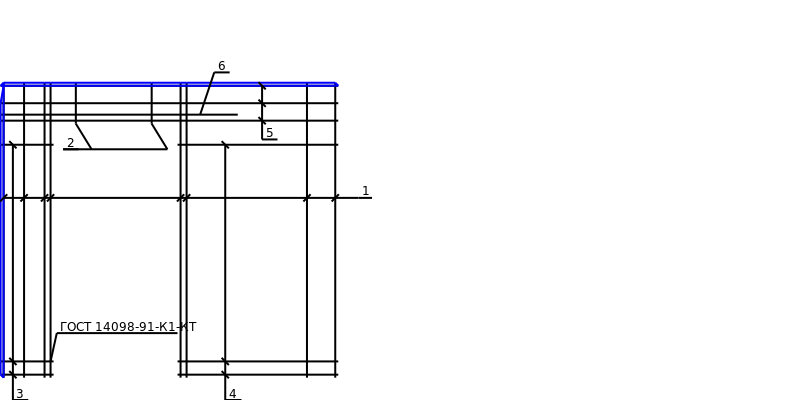

id: 52bc02b7-0a23-4a3b-90d3-55b0ad713ba3 entities: 229


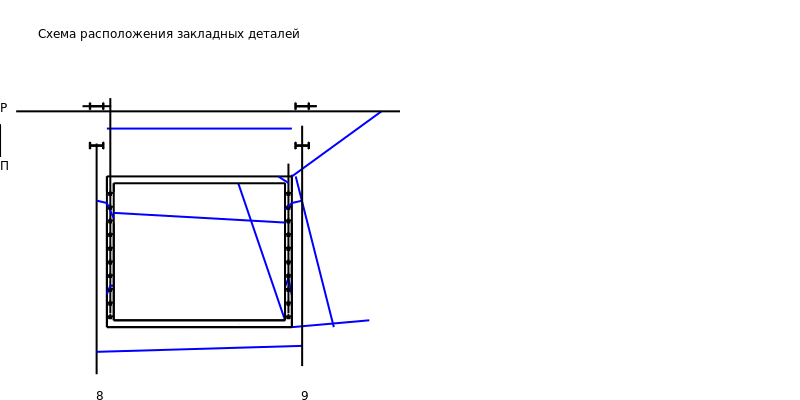

id: 53280fe3-8122-403b-af91-e4a05955f635 entities: 196


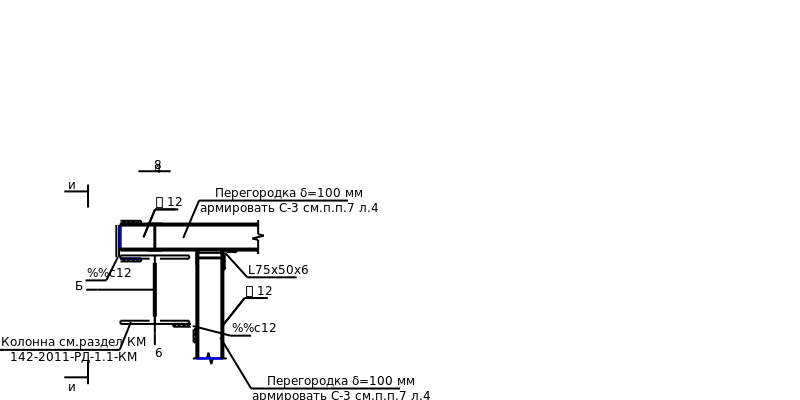

id: 536bcf7e-5e37-454b-9d1d-9b34369b811a entities: 103


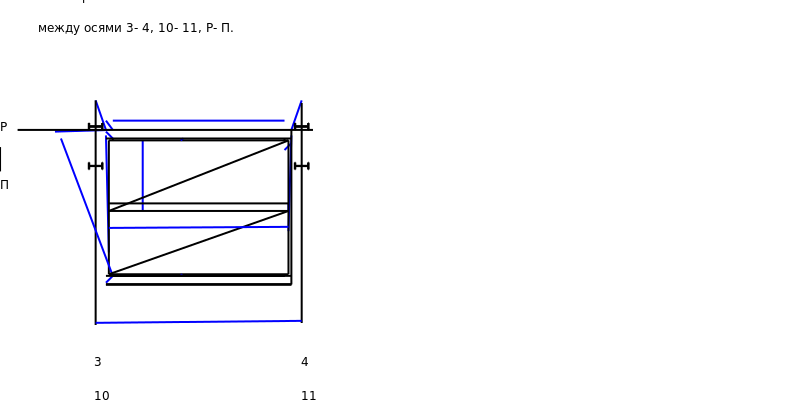

id: 549b5c5d-7242-4910-964e-450642f243b6 entities: 203


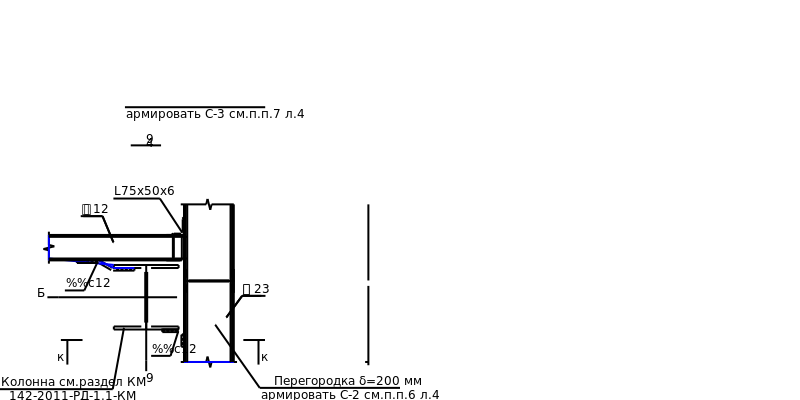

id: 550eb49f-a913-4e34-a1f6-829d049d45ff entities: 107


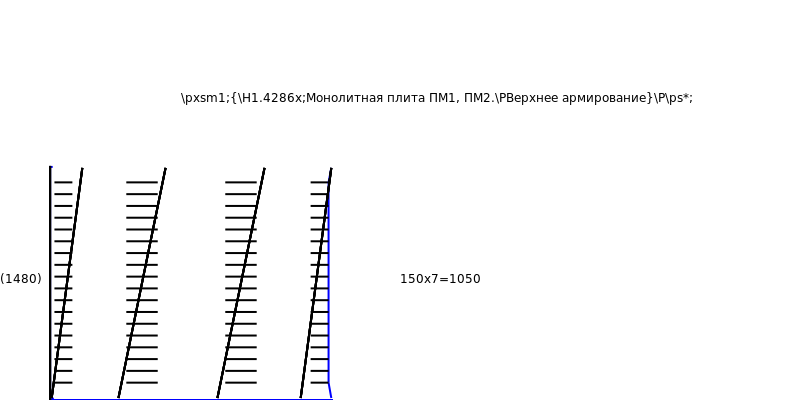

id: 5651e9a3-3930-4f45-8d65-b7b55b122909 entities: 602


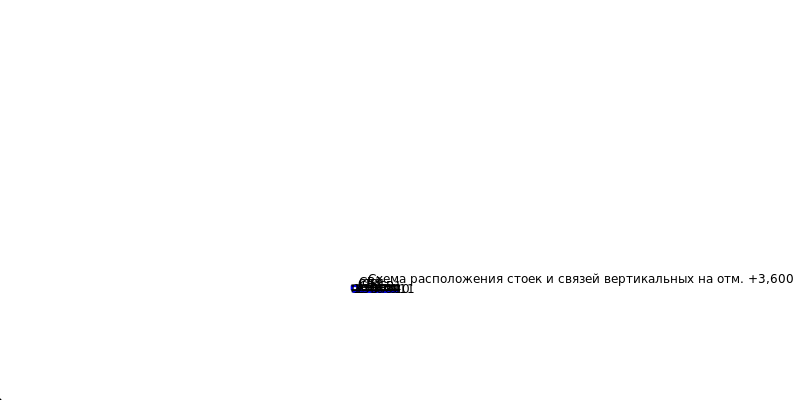

id: 57b3a40a-f516-4f9e-ad81-3ce8284b05b3 entities: 33


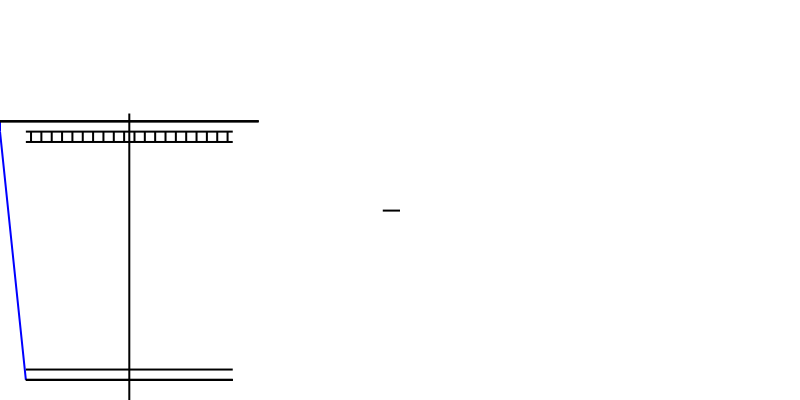

id: 58005eca-927b-45fe-a90f-db38d0842387 entities: 48


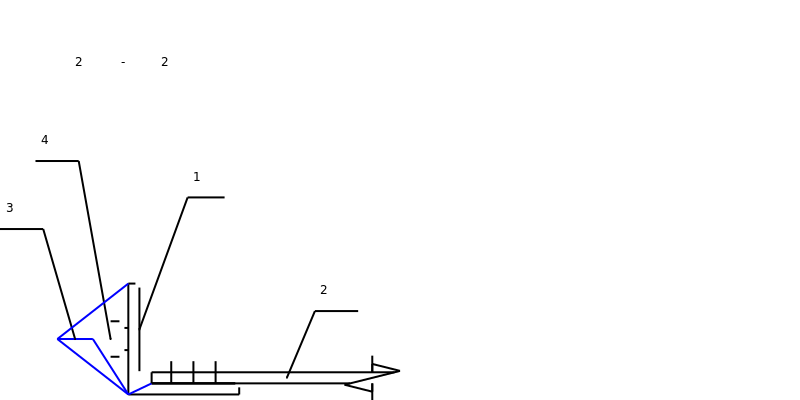

id: 585c9e5f-027a-4bb4-844d-57b997275ecb entities: 31


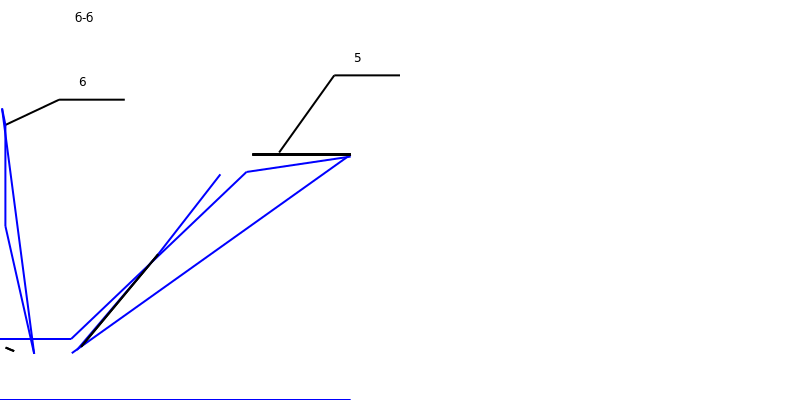

id: 58fd4f75-82ac-439f-8c35-dbcce316e5e7 entities: 45


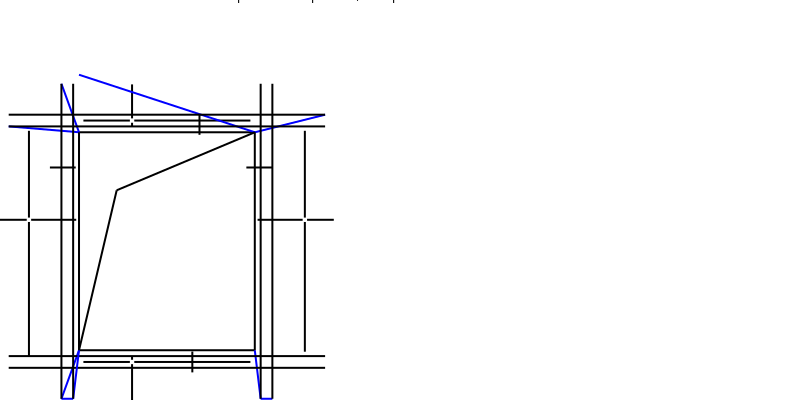

id: 596dfecc-3249-4fc0-ac51-7585182c9245 entities: 112


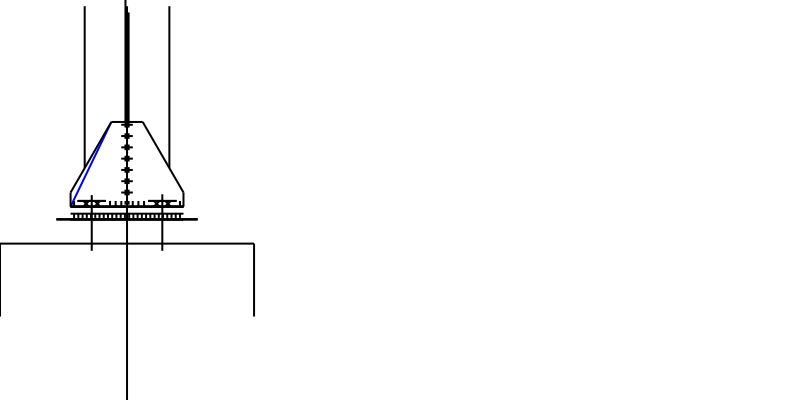

None

id: 59843296-aa7d-4576-9964-0130f2e6a0f2 entities: 263


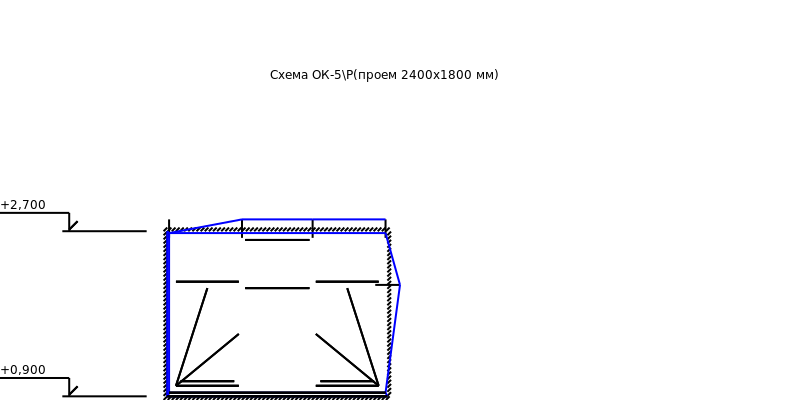

id: 5b16f7f3-e9b5-4757-9478-10bce7179b03 entities: 99


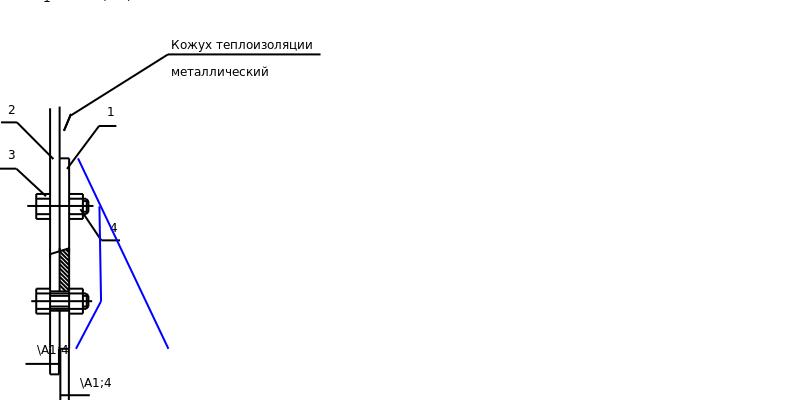

id: 5b38e637-a985-46cd-95f6-241b94dcac1d entities: 253


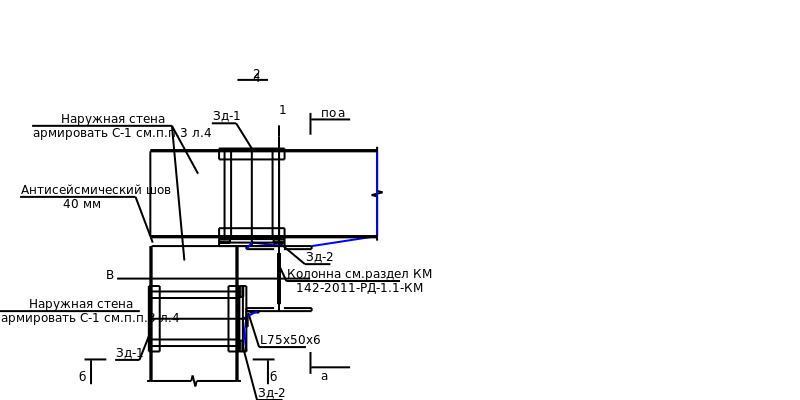

id: 5b64d83a-590b-43c4-ae40-d83c4d93e4a7 entities: 23


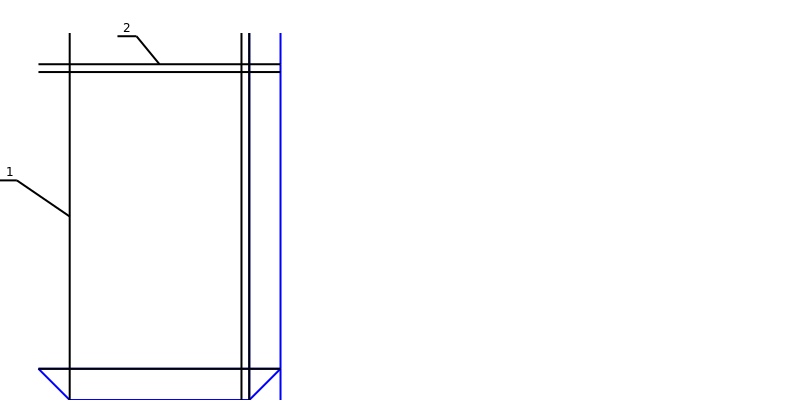

id: 5bbfa402-3609-49e7-b409-d8a4bc548940 entities: 400


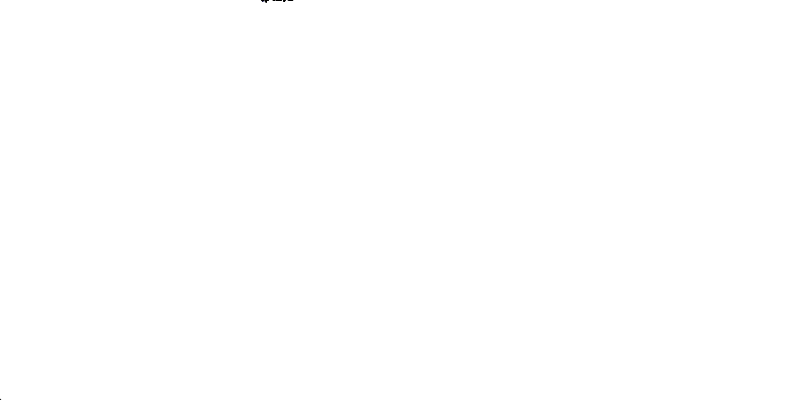

id: 5bd280b4-b926-4c45-b138-027c884ca5c8 entities: 101


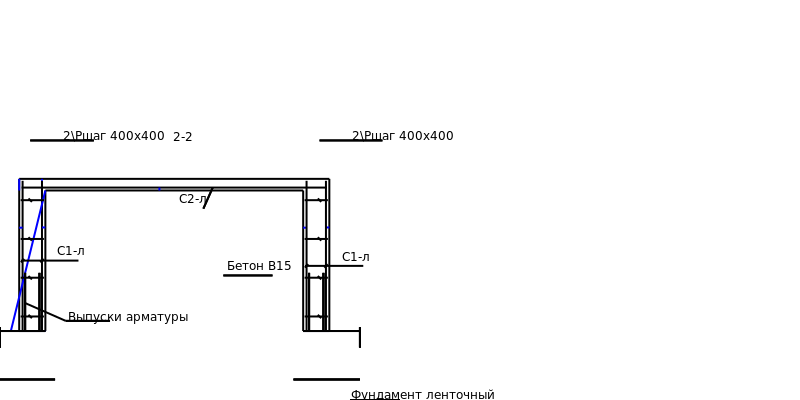

id: 5d31cd47-e53f-48f9-b672-97db98157c67 entities: 149


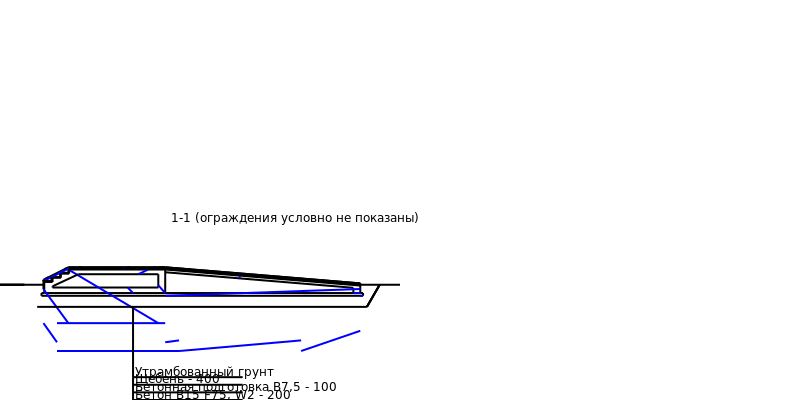

id: 5d78abff-2a8a-4422-b74a-73a0a949be04 entities: 104


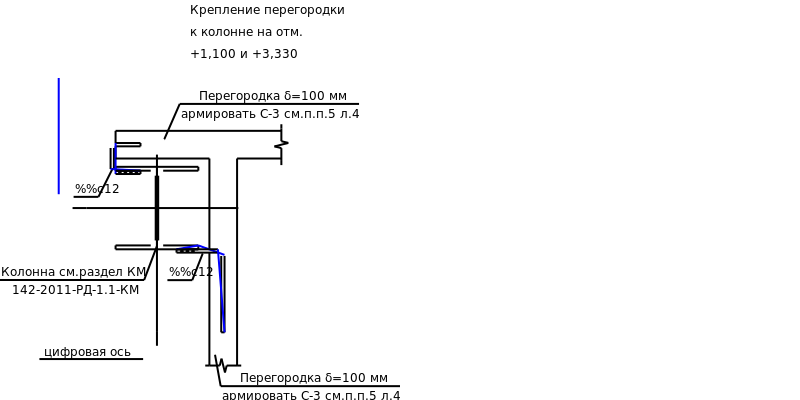

id: 5de1bdf4-c679-4820-8331-5b6ab94018e4 entities: 81


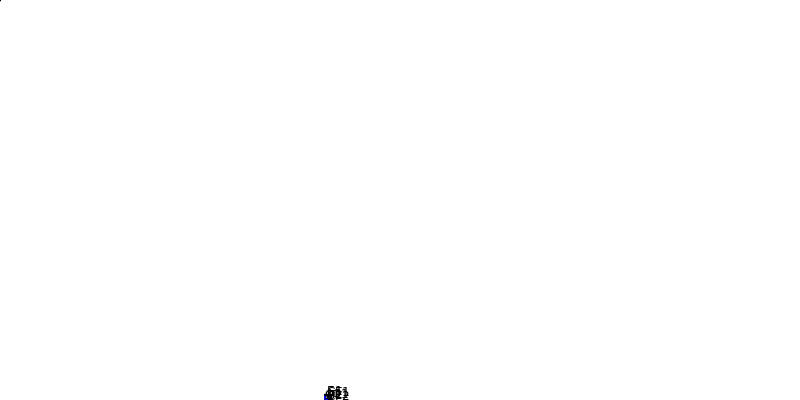

id: 5e6f166e-ee4d-4fd1-bbea-487614c32267 entities: 47


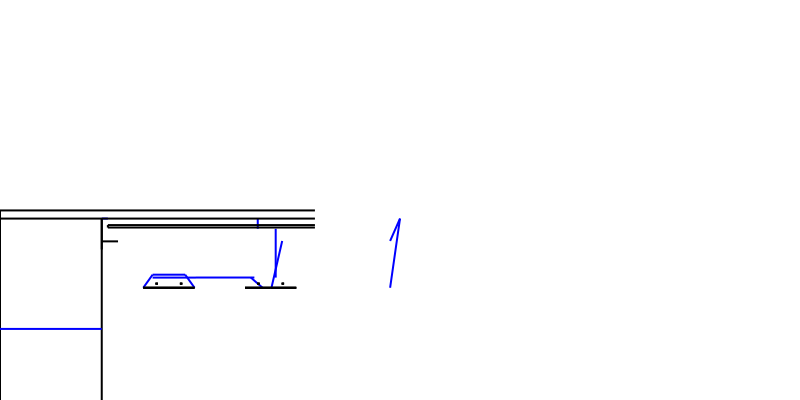

id: 5f4f4997-e30b-48ec-8390-da53c67f1613 entities: 408


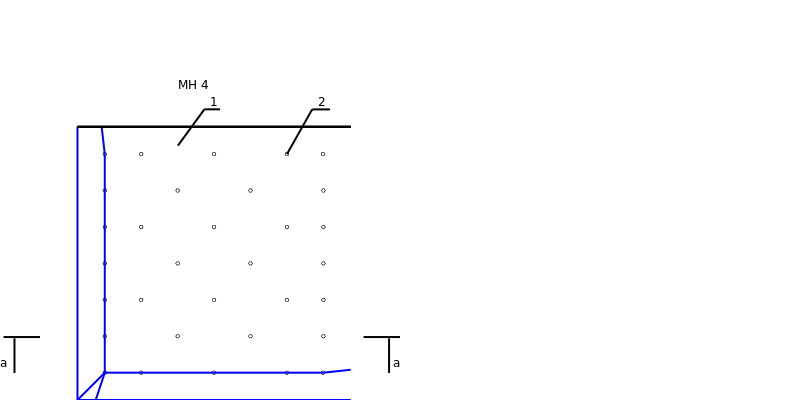

id: 60b4a8ca-62d5-4df7-8a95-6ad13500b371 entities: 355


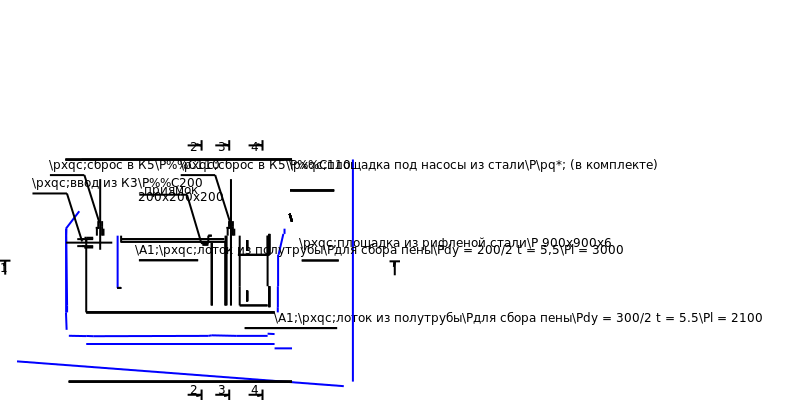

id: 60da3e62-798d-45e0-99b9-51a53038f3f7 entities: 137


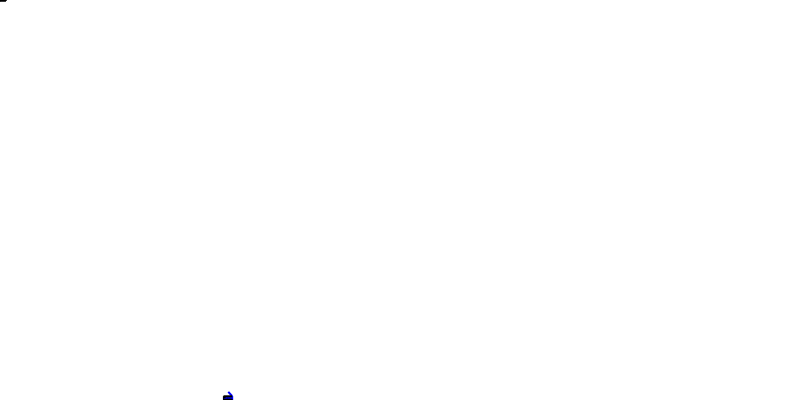

id: 60e1f77d-4243-429d-bd8e-130b4a356233 entities: 133


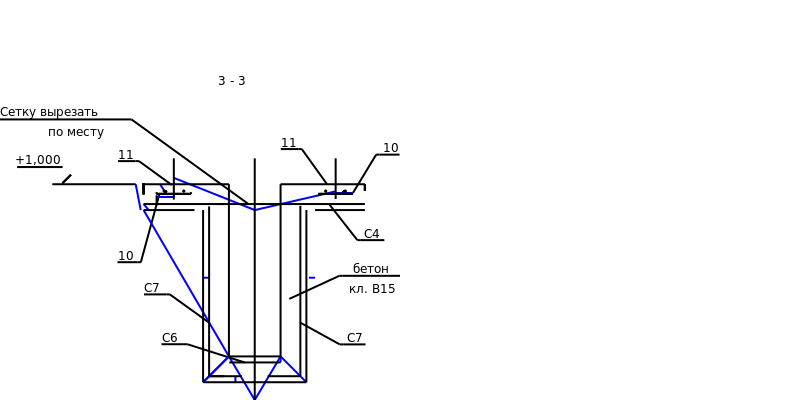

id: 61433bc0-6f61-413a-a30c-d952fe37eb8a entities: 172


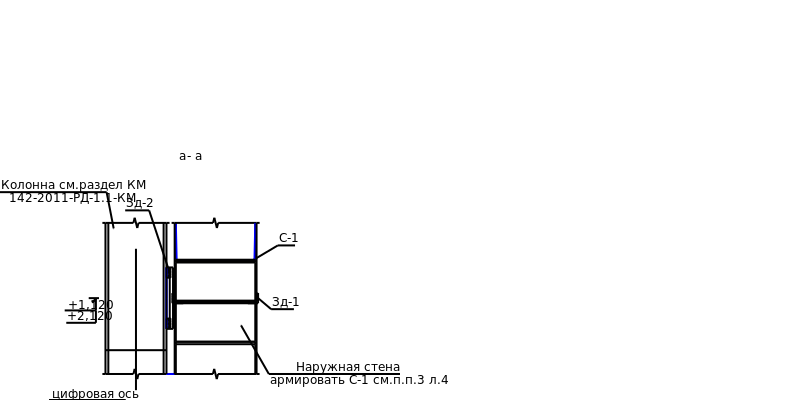

id: 614b7230-e435-4088-98e0-54b04136b055 entities: 193


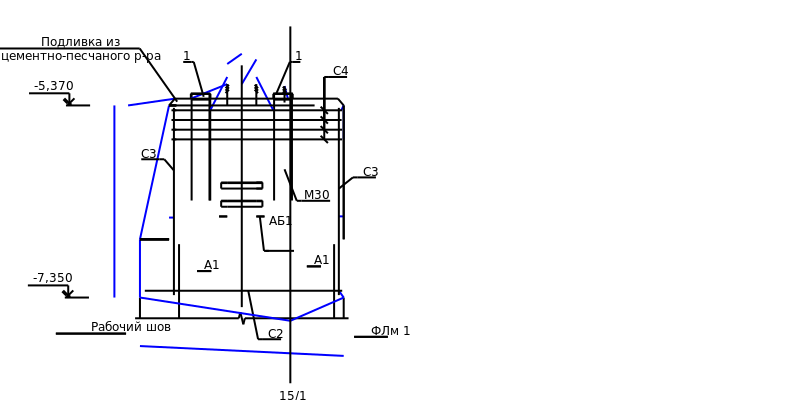

id: 61c83dcd-f21f-4fd9-b478-49bb046f8459 entities: 28


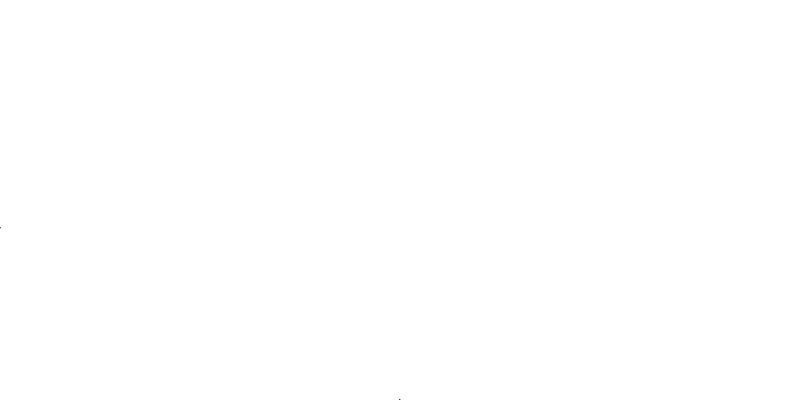

id: 65141ff8-02b7-4f73-963f-0af9747de915 entities: 427


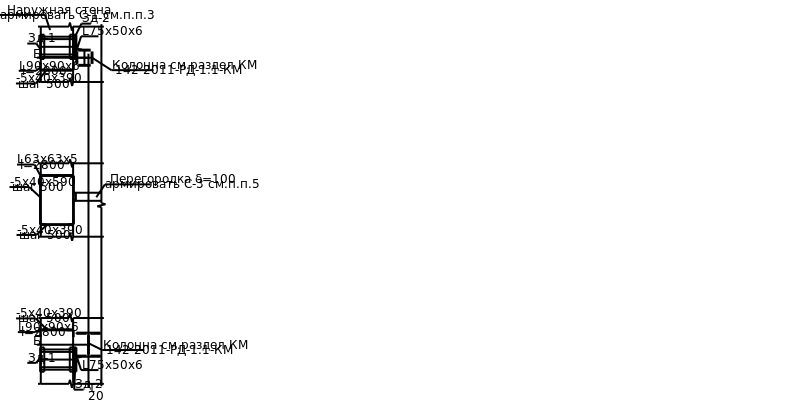

id: 655aa7df-8231-4d29-b790-384e3b14996e entities: 86


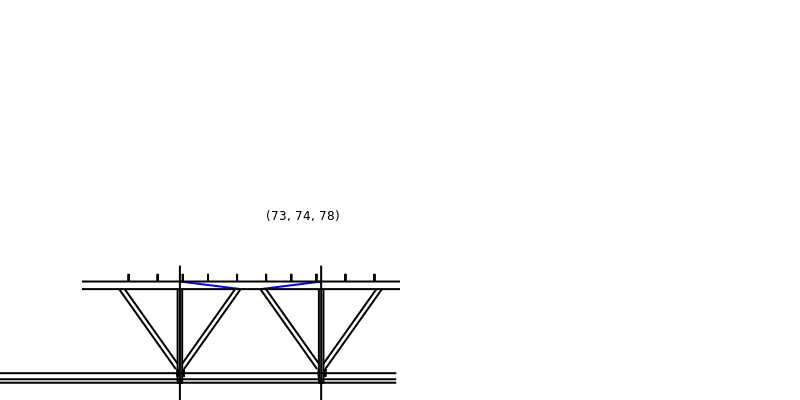

id: 657338c4-b692-4aec-a91b-6bb0381dd310 entities: 20


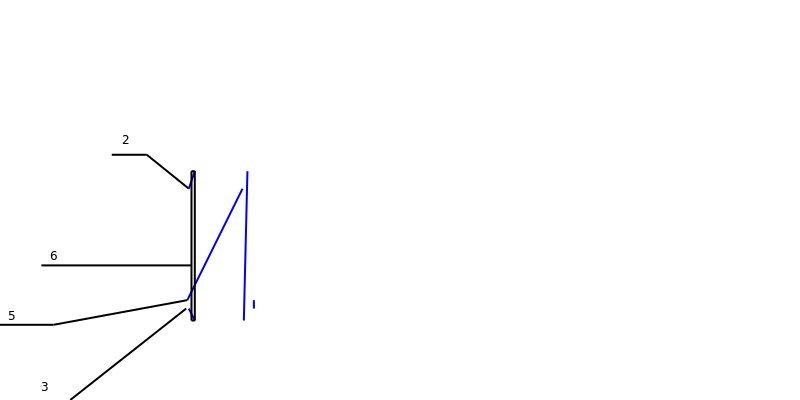

id: 65cbb3b3-0834-465c-90de-d3993d9d22ac entities: 260


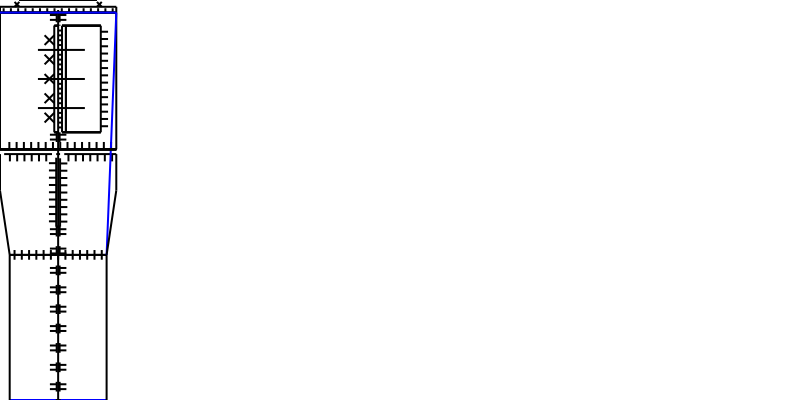

id: 6604b34f-f54d-43a8-bda4-f23658e8b5e8 entities: 130


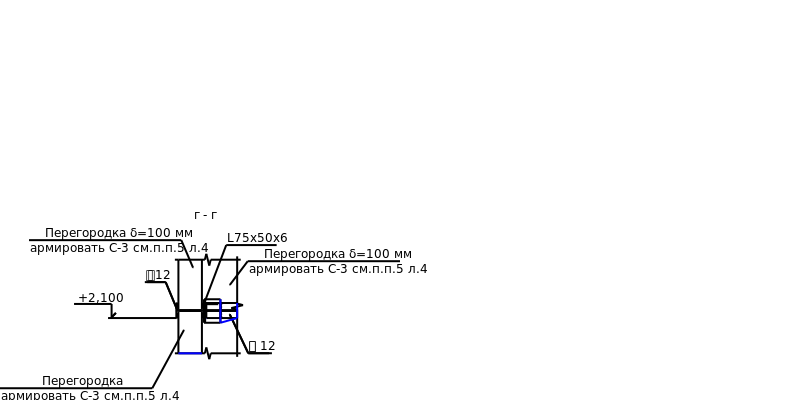

id: 660f1640-a0d5-4a7a-9802-7bd2725d7321 entities: 314


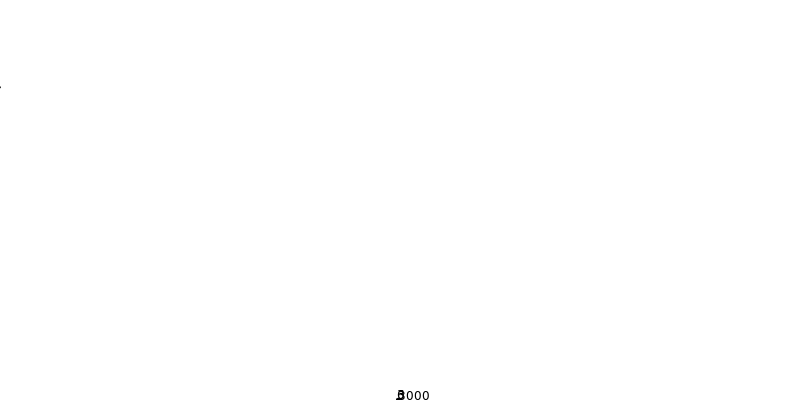

id: 668df9e2-0fc4-49f1-875e-cddc24fa6adf entities: 115


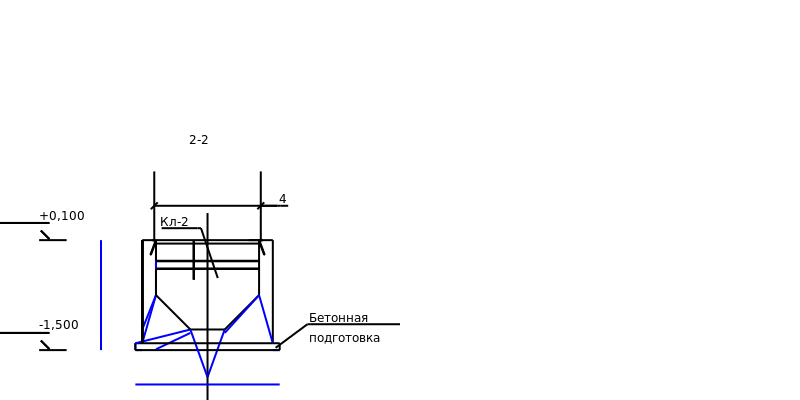

id: 66ead3d0-1281-4e4c-ab87-50be1c3849d9 entities: 53


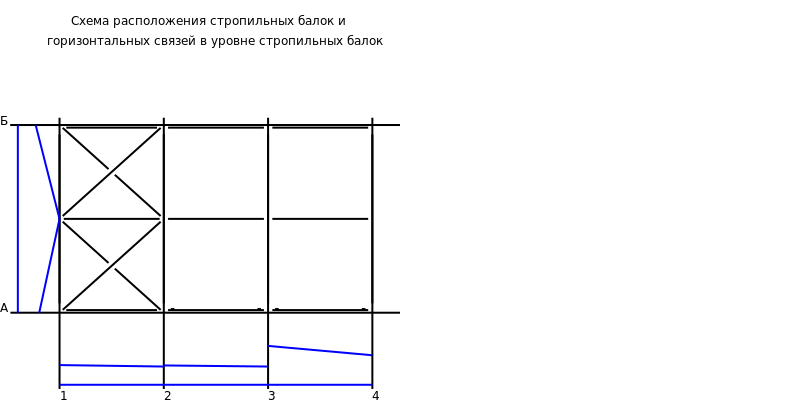

id: 66fa2d6d-599e-44a7-8771-cb0bb5490d0a entities: 315


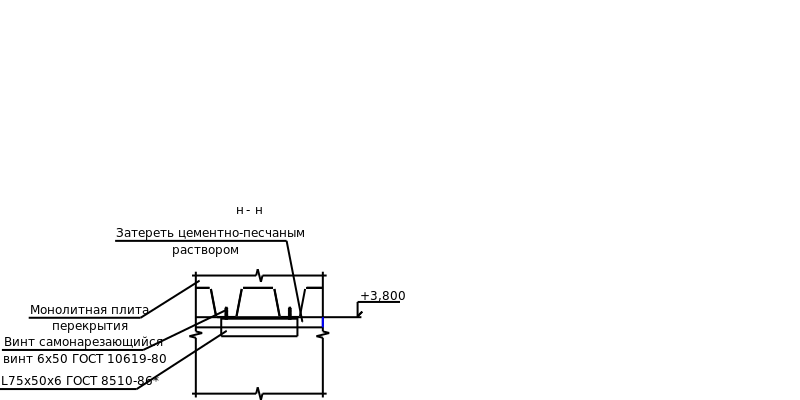

id: 6721d23a-0146-4de1-becf-8a2f241885d8 entities: 67


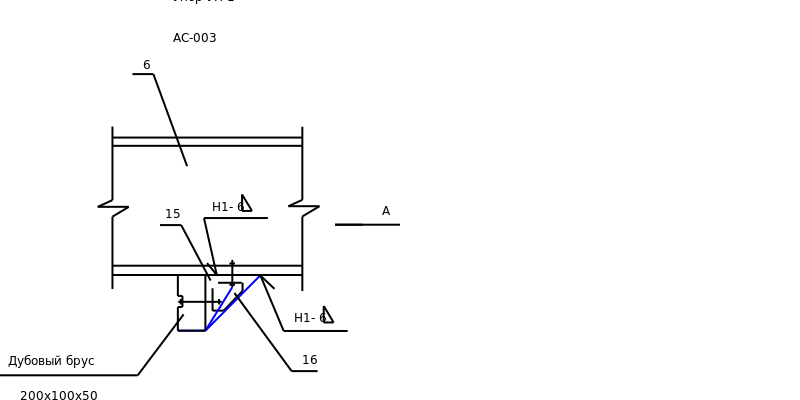

id: 68b2f393-d0f7-49f2-a89b-19e61d2b873f entities: 127


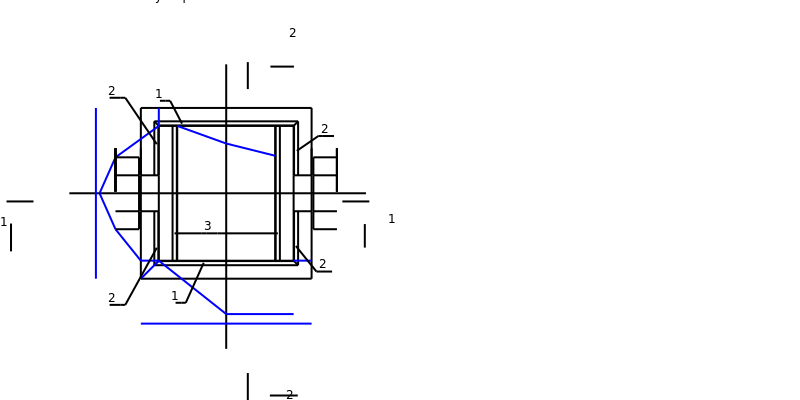

id: 6a61d6ea-c0ff-4d26-b60a-62bcc4ac30ed entities: 599


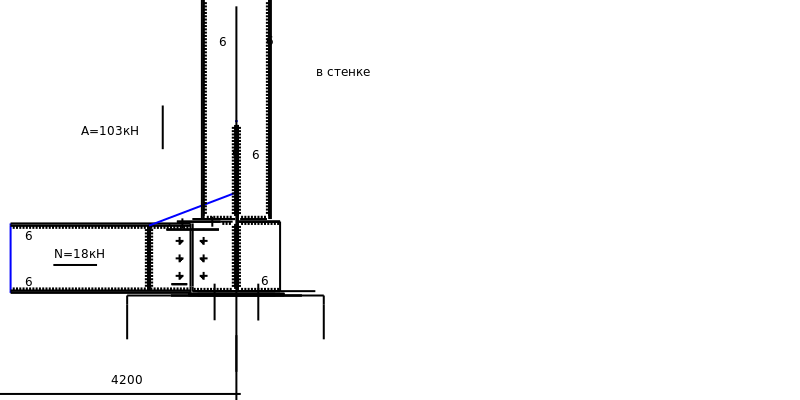

id: 6b11759e-552e-48c6-a776-6d4dea142494 entities: 23


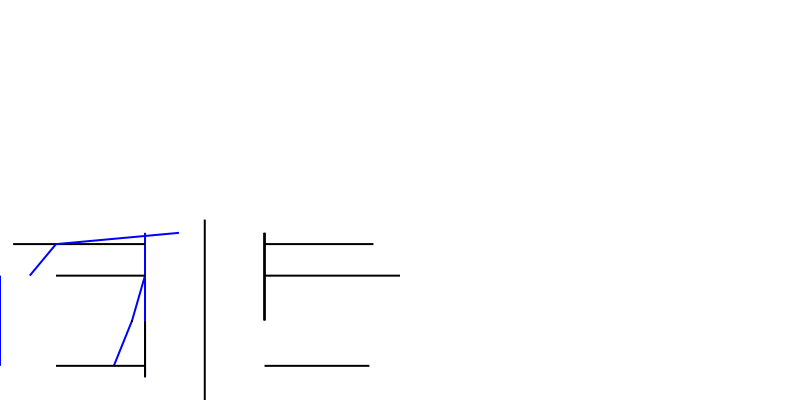

id: 6b9caab5-137d-4874-bfc3-66ef04f275ce entities: 251


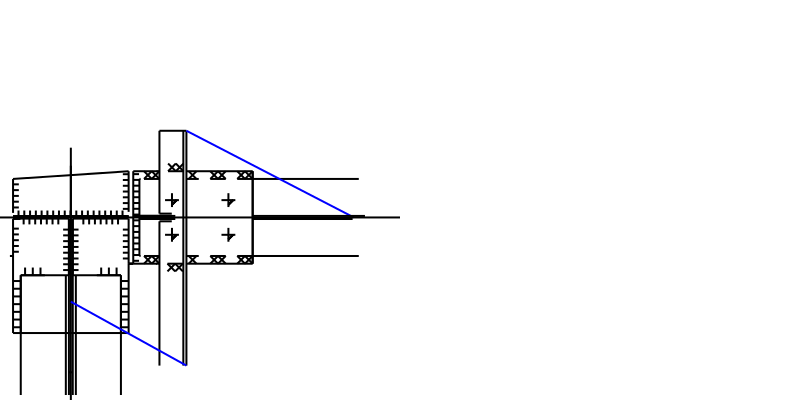

id: 6bc4e55c-7362-43a0-a97e-b45d2a1ec37f entities: 30


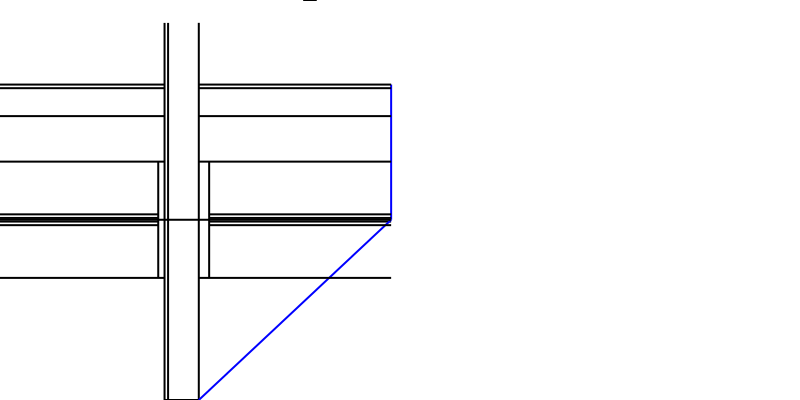

id: 6caf730f-1c26-400a-b4c1-f328d4f9175f entities: 78


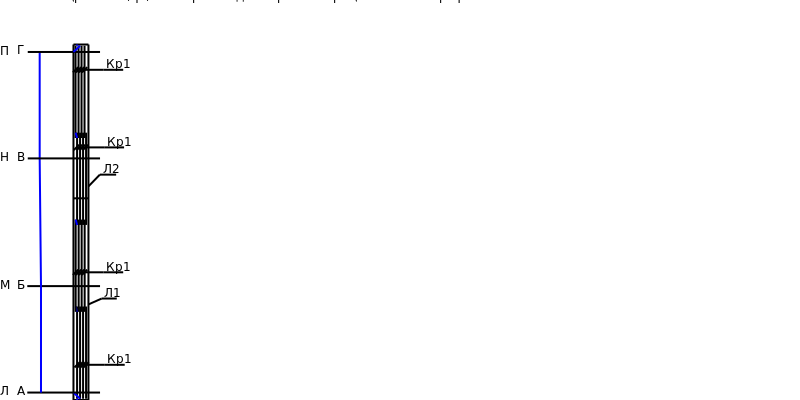

id: 6cf17a32-f1d8-4276-8d87-3a636a18e111 entities: 364


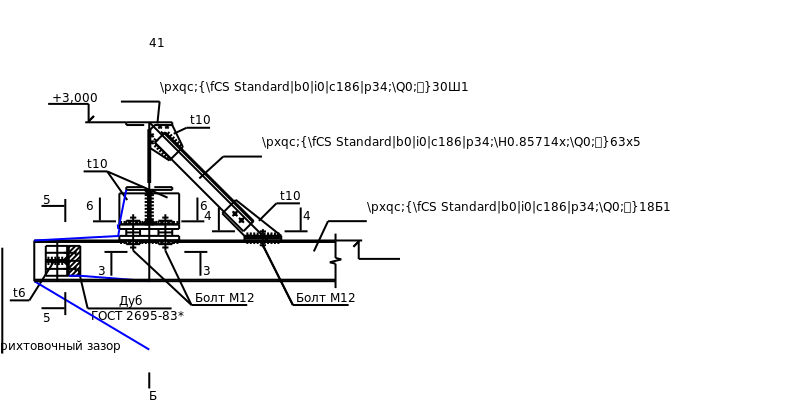

id: 6d4072b1-95cc-443b-8f4b-ee37c1a12995 entities: 138


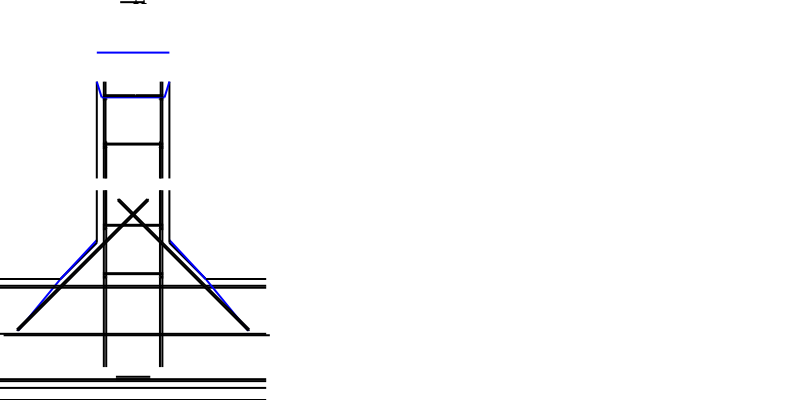

id: 6d816f98-a9a9-4f2b-a961-9db5292cc2ec entities: 154


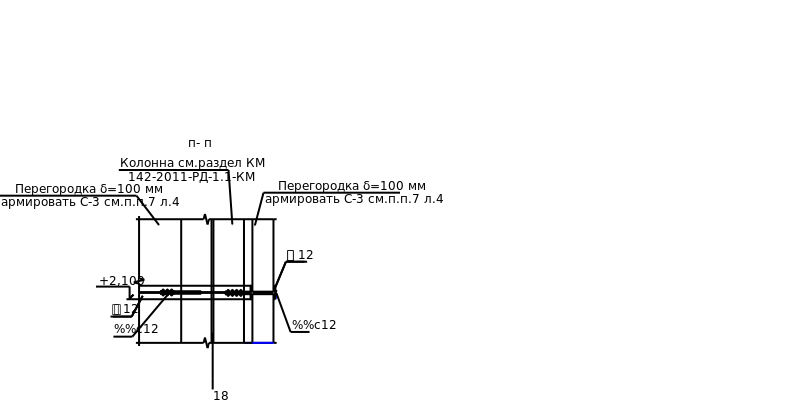

id: 6d999fa8-31cf-4a7d-95ed-9f939d00a148 entities: 26


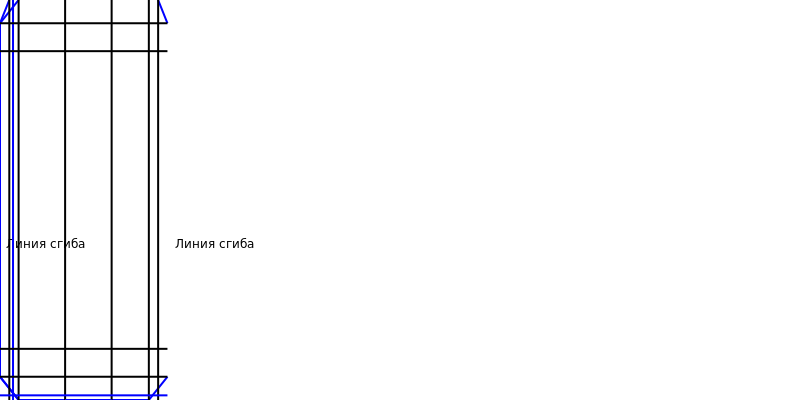

id: 6e454c08-dff3-4347-956d-ddbc24540f3d entities: 514


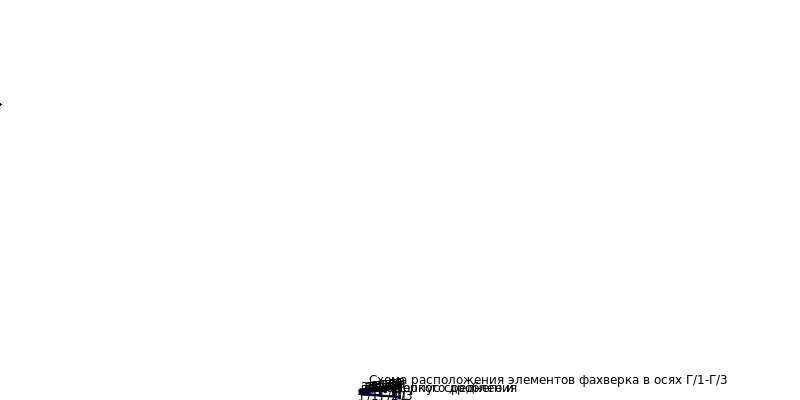

id: 6ebefb3c-f825-4e38-af33-f964dd359bd0 entities: 106


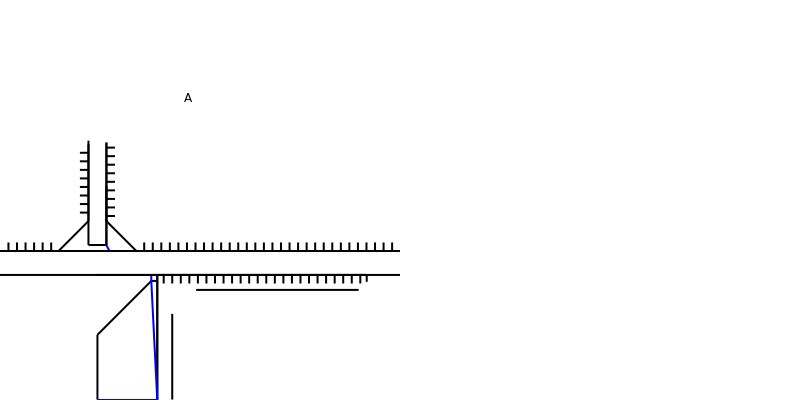

id: 6f76f175-0c71-4de5-8b1f-045230fb3d73 entities: 98


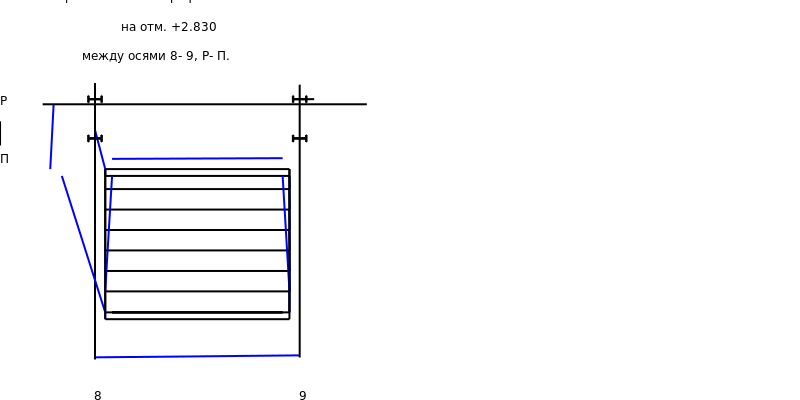

id: 6ffe84a9-884f-4551-8d7b-abc08e0dcbf5 entities: 220


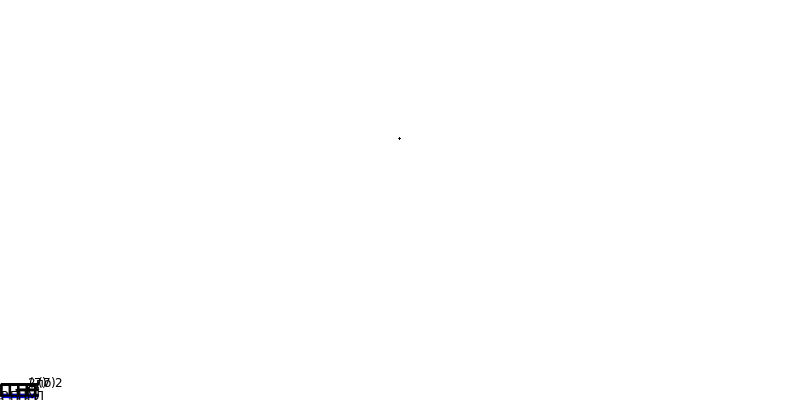

KeyboardInterrupt: 

In [10]:
from plot_graphics import generate_image_by_id
for f_id in fileidsWithDims:
    filename, d = generate_image_by_id(objects, f_id)
    display(d)